## Blockbusters en Pantalla Grande: Un Análisis Exploratorio de Datos de Películas Potenciado por GPT

### **Resumen Ejecutivo**

Este proyecto se ha enfocado en un análisis detallado de la industria cinematográfica, abarcando la limpieza, exploración y visualización de datos para revelar patrones y tendencias significativas. A continuación, se resume cada sección:

**Limpieza y Exploración de Datos:** La etapa inicial de limpieza y exploración de datos aseguró la integridad de la información analizada. Se realizaron análisis de correlación y gráficos de dispersión para identificar relaciones entre variables numéricas, estableciendo una base sólida para los análisis posteriores.

**Análisis de Géneros Cinematográficos:** Se investigaron los géneros cinematográficos más populares y rentables, identificando las preferencias del público y su influencia en el éxito financiero.

**Indicadores Financieros:** El análisis de indicadores financieros reveló cómo el presupuesto y el ingreso bruto afectan la rentabilidad de las películas, proporcionando información valiosa para la toma de decisiones financieras.

**Compañías Productoras:** Se analizó la relación entre las compañías productoras y los géneros cinematográficos, destacando las empresas líderes en términos de ingresos y su enfoque en ciertos géneros.

**Directores y Actores Principales:** El impacto de directores y actores en el éxito de una película fue examinado, resaltando directores rentables, índices de retorno de inversión y valoraciones promedio de actores y directores.


Este proyecto presenta un análisis profundo y objetivo de la industria cinematográfica, proporcionando una exploración detallada de cómo diversos factores se entrelazan para influir en el éxito financiero y la percepción del público en esta industria. Los hallazgos presentados son fundamentales para comprender la interacción entre variables y patrones que determinan el rendimiento financiero y la recepción del público en el sector del cine.

Por otra parte, este análisis brinda una sólida base para la toma de decisiones informadas y futuras investigaciones en el ámbito del análisis de datos aplicado a la industria cinematográfica. Además, este proyecto demuestra habilidades sólidas en el análisis exploratorio de datos, proporcionando un valioso componente para el desarrollo y la práctica de habilidades y competencias demandadas en la disciplina del Data Analysis.


### Cargar datos y limpieza

En esta sección, nos adentramos en el proceso esencial de carga y limpieza de datos. Empezamos por explorar el DataFrame de películas, examinando las variables disponibles y su naturaleza, ya sean numéricas o categóricas. Es fundamental comprender los tipos de datos presentes en el conjunto y verificar que el DataFrame esté listo para el análisis subsiguiente. Este paso crítico establece las bases sólidas para un análisis de datos coherente y significativo.

In [2]:
#importar librerias y cargar los datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,5)

In [3]:
df= pd.read_csv(r"C:\Users\SANTIAGO FAJARDO\Documents\material de estudio DA-DS\proyectos\Movies\moviesds.csv")
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

Contianuamos con una revisión detallada utilizando el método `df.info()`, el cual nos brinda una descripción general de la estructura del DataFrame, incluyendo los tipos de datos de las variables y la cantidad de valores no nulos. Posteriormente, empleamos `df.isnull().sum()` para identificar la cantidad de valores faltantes en cada columna.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Una vez identificados los valores faltantes en nuestro DataFrame, el siguiente paso es garantizar la calidad de nuestros datos al eliminar las filas que contienen valores nulos. Esta decisión se basa en la premisa de que trabajaremos con datos completos para evitar posibles distorsiones en nuestros análisis y conclusiones. Mediante el uso de `df.dropna()`, eliminamos estas filas y aseguramos que el conjunto de datos resultante sea más robusto y confiable para nuestras investigaciones posteriores.

In [6]:
#dropear los null values

df= df.dropna()

In [7]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country       budget        gross  \
0     United Kingdom   19000000.0   46998772.0   
1      United States    4500000.0   58853106.0   
2      United States   18000000.0  538375067.0   
3      United States    3500000.0   83453539.0   
4      United States    6000000.0   39846344.0   
...              ...          ...          ...   
7648   United States   90000000.0  426505244.0   
7649   United States   85000000.0  319715683.0   
7650   United States  175000000.0  245487753.0   
7651          Canada  135000000.0  111105497.0   
7652           China   80000000.0  461421559.0   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

También es importante abordar la presencia de duplicados en el conjunto. 

In [8]:
# Identificamos duplicados en el conjunto de datos
num_duplicados= df.duplicated().sum()
print("La cantidad de duplicados es:", num_duplicados)

La cantidad de duplicados es: 0


In [9]:
# Confirmamos la integridad de los datos mediante un resumen de información
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


Hemos identificado que no existen registros duplicados en nuestro DataFrame, lo que es un buen indicio de que nuestra información es consistente en este aspecto. Además, al reiterar el uso de `df.info()`, podemos corroborar que no hay valores nulos presentes después de realizar la  eliminación de duplicados.

Posteriormente, focalizamos nuestra atención en las variables categóricas y numéricas. Observamos que algunas columnas, como "name" y "genre", presentan datos categóricos, o de tipo "object". Mientras que otras, como "gross" y "budget", están en formato decimal (float). Para optimizar nuestro análisis, es beneficioso cambiar el tipo de datos de las columnas "gross" y "budget" a enteros, lo que simplificará las operaciones y cálculos que realizaremos. A continuación, realizamos esta conversión y actualizamos el DataFrame para que las columnas tengan el tipo de datos deseado.

In [10]:
#cambiamos el data type de gross y budget a enteros
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
# Visualizamos el DataFrame actualizado
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

Tras completar una serie de pasos para preparar nuestros datos, podemos afirmar que hemos abordado la limpieza y organización necesarias. Hemos eliminado los valores nulos, confirmado la ausencia de duplicados y ajustado el formato de las columnas relevantes a enteros. Estas acciones nos han permitido transformar el conjunto de datos original en un DataFrame sólido y listo para nuestro análisis subsiguiente.

### 1 .Estudiar Correlación entre las variables

En esta etapa, comenzamos a explorar las relaciones entre nuestras variables. La matriz de correlación es nuestra herramienta inicial, revelando conexiones entre los datos que a simple vista podrían pasar desapercibidas. Aumentamos la claridad visual al emplear un mapa de calor que asigna una escala de colores a los valores numéricos.

Dando un paso más allá, usamos gráficos de dispersión con líneas de regresión para investigar cómo las variables se influyen mutuamente. Este capítulo marca un punto importante en nuestro análisis al ilustrar interconexiones entre variables.

In [11]:
#creamos una matriz de correlación para las columnas numéricas
df.corr(numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

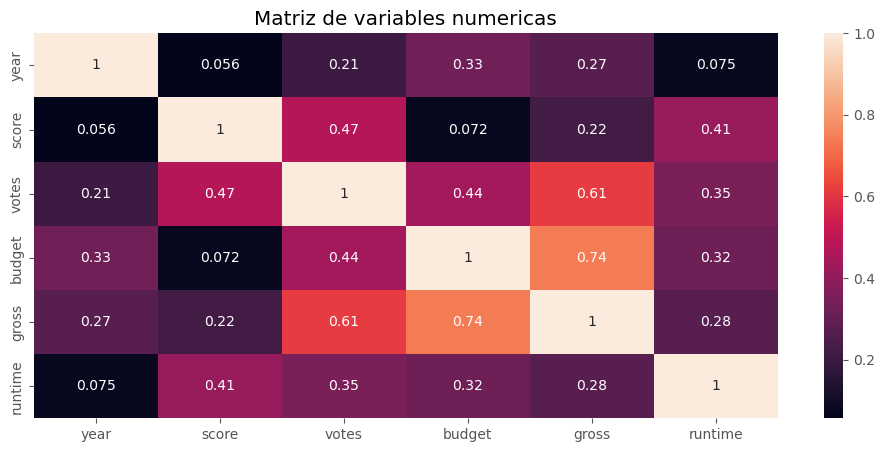

In [12]:
#creamos un heatmap para la matriz de correlación para entender mejor estas relaciones con un apoyo de colores
matriz_corr= df.corr(numeric_only=True)
sns.heatmap(matriz_corr, annot=True)
plt.title("Matriz de variables numericas")
plt.show

La columna "budget" tiene una correlación fuerte con "gross" (0.740247). Esto sugiere que hay una relación positiva significativa entre el presupuesto de una película y sus ingresos en taquilla.

La columna "year" tiene una correlación positiva moderada con "budget" (0.327722) y "gross" (0.274321). Esto sugiere que a medida que el año aumenta, es más probable que las películas tengan un mayor presupuesto y recauden más en taquilla.

La columna "score" tiene una correlación positiva moderada con "votes" (0.474256) y "runtime" (0.414068). Esto indica que las películas con una puntuación más alta tienden a tener más votos y una duración más larga.


### 1.2 Budget vs Gross vs Year

En esta sección, nuestro enfoque se centra en las variables que exhiben una correlación significativa, nos adentramos en la interacción de aquellas que son clave: Presupuesto (Budget), Ingreso Bruto (Gross) y Año (Year).

Comenzamos evaluando la distribución de estas variables y detectando posibles valores atípicos. Para ello, empleamos gráficos de caja (boxplots). 

<Axes: >

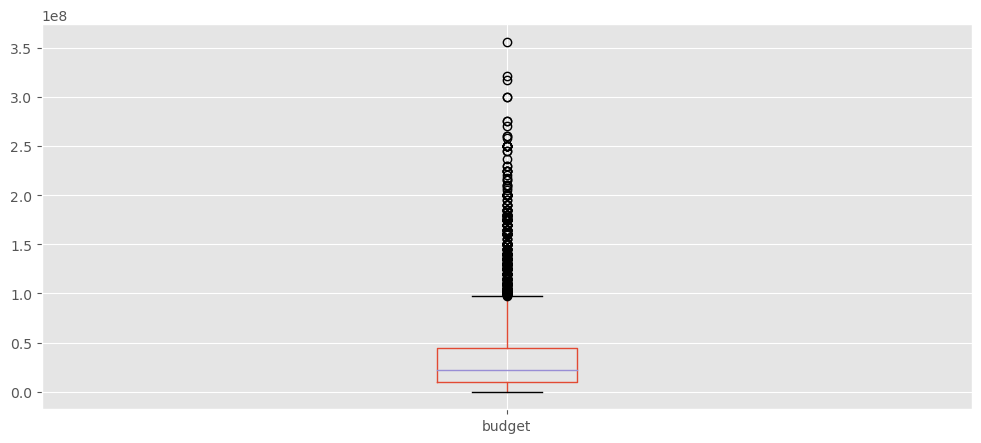

In [13]:
# revisión de outliers para el presupuesto
df.boxplot(column=['budget'])

<Axes: >

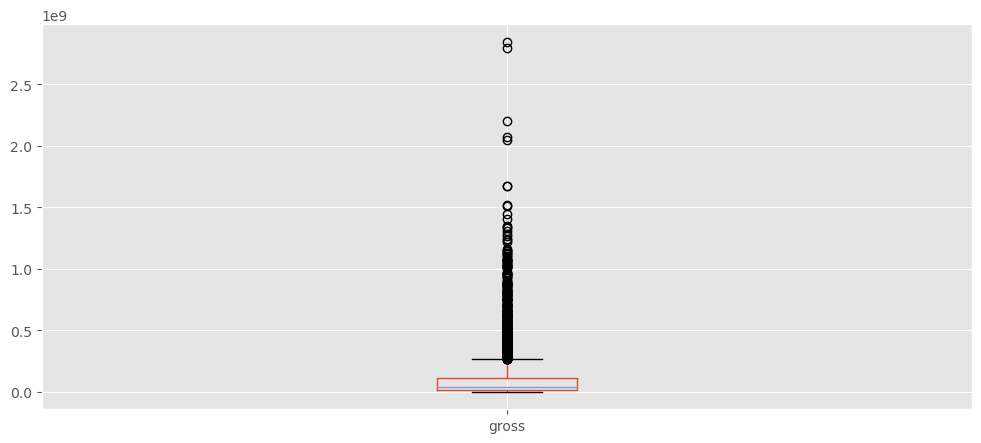

In [14]:
#revisión de outliers para el ingreso bruto
df.boxplot(column=['gross'])

Observamos que tanto el Ingreso Bruto como el Presupuesto presentan una notable presencia de valores atípicos, lo que sugiere la existencia de casos excepcionales en la industria cinematográfica. Estos puntos fuera de lo común podrían ser de particular interés para nuestro análisis, ya que podrían representar éxitos inesperados  en la taquilla.

### 1.2.1 gráficos de dispersión Budget vs Gross vs Year

Ahora, vamos a estudiar visualmente las correlaciones entre las variables numéricas clave. En primer lugar, creamos gráficos de dispersión que exploran la interacción entre el Presupuesto (Budget), el Ingreso Bruto (Gross) y el Año (Year).


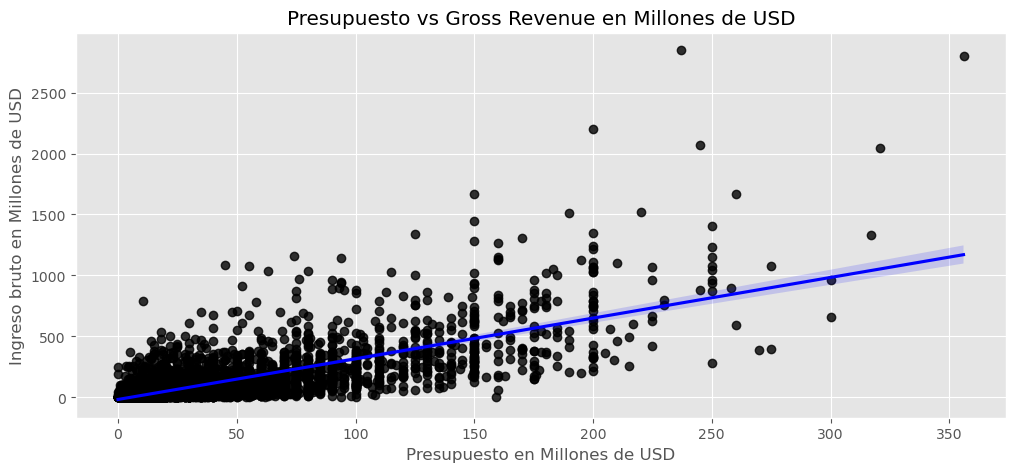

In [15]:
# crear un grafico scatter para Budget y gross, y le vamos a agregar una linea de regresion ajustada

sns.regplot(x="budget", y="gross", data= df, scatter_kws={"color":"black"}, line_kws={"color":"blue"})
plt.xlabel("Presupuesto en Millones de USD")
plt.ylabel("Ingreso bruto en Millones de USD")
plt.title("Presupuesto vs Gross Revenue en Millones de USD")

# Formatear los ejes en millones de dólares
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}")  # Función para dividir por 1e6 y mostrar sin decimales
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

Con el gráfico de dispersión de Budget vs Gross, al agregar una línea de regresión ajustada, podemos claramente identificar la tendencia positiva en la que un mayor presupuesto generalmente se traduce en mayores ingresos en taquilla. Hemos formateado los ejes en millones de dólares para una mejor legibilidad y comprensión.

<function matplotlib.pyplot.show(close=None, block=None)>

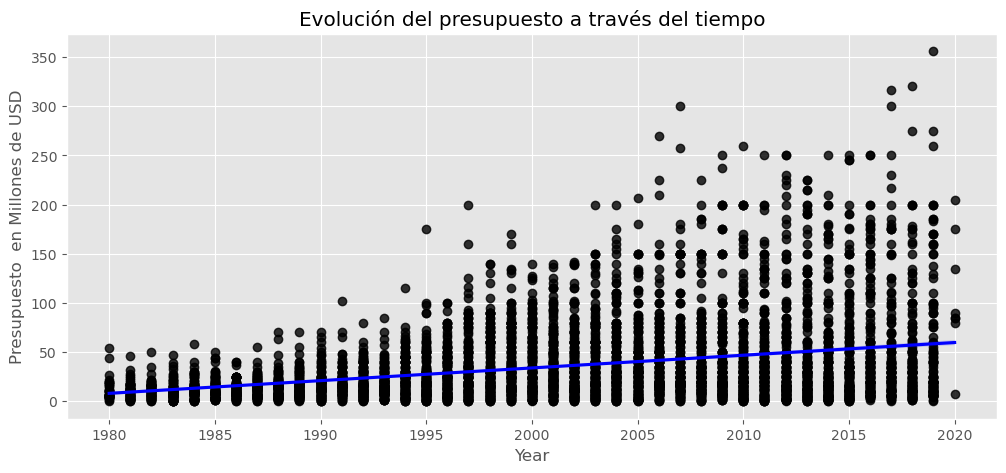

In [16]:
#Budget vs year

sns.regplot(x="year", y="budget", data= df, scatter_kws={"color":"black"}, line_kws={"color":"blue"})
plt.xlabel("Year")
plt.ylabel("Presupuesto  en Millones de USD")
plt.title("Evolución del presupuesto a través del tiempo")
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 

plt.gca().yaxis.set_major_formatter(formatter)

plt.show

A continuación, exploramos la relación **Budget vs Year**. Nuevamente, empleamos una línea de regresión ajustada para visualizar la evolución del presupuesto a lo largo de los años. Observamos un aumento gradual en el presupuesto a medida que avanzan los años.

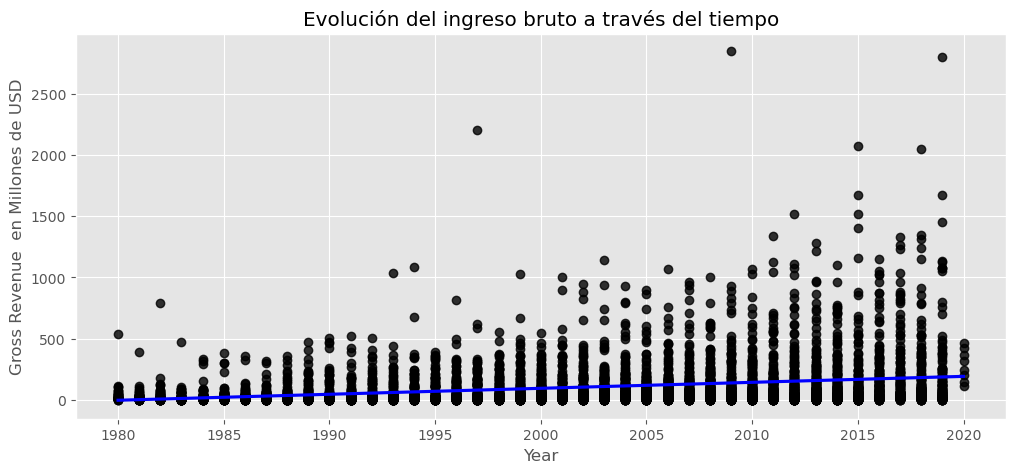

In [84]:
#Gross vs Year

sns.regplot(x="year", y="gross", data= df, scatter_kws={"color":"black"}, line_kws={"color":"blue"})
plt.xlabel("Year")
plt.ylabel("Gross Revenue  en Millones de USD")
plt.title("Evolución del ingreso bruto a través del tiempo")
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Finalmente, examinamos **Gross vs Year**, utilizando una línea de regresión para destacar cómo el ingreso bruto también ha ido creciendo con el tiempo.

Estos gráficos de dispersión refuerzan la idea de que existe una correlación entre la inversión financiera en una película (presupuesto) y sus ganancias en taquilla (ingreso bruto). Además, sugieren que a lo largo de los años, tanto el presupuesto como el ingreso bruto han experimentado un aumento constante.

### 1.3  Gross vs Votes vs runtime

En la siguiente sección, nos centramos en la relación entre el Ingreso Bruto (Gross), la cantidad de votos recibidos (Votes) y la duración de las películas (Runtime). Estas variables presentan interesantes conexiones, como se refleja en el gráfico de heatmap de correlaciones.


<Axes: >

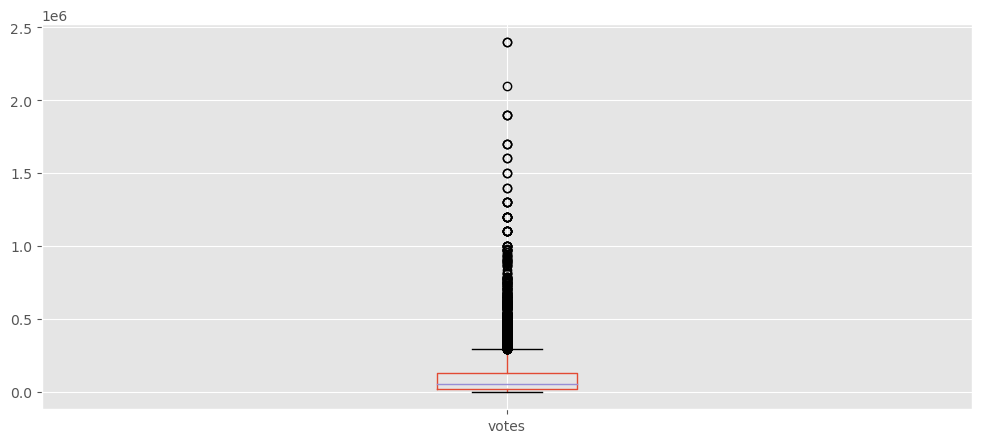

In [18]:
# primero revisemos si hay valores atípicos para los votos

df.boxplot(column=['votes'])

El gráfico de caja (boxplot) para la variable "votes" revela la existencia de casos excepcionales donde algunas películas acumulan un número significativamente mayor de votos en comparación con la mayoría. Esto sugiere que ciertas películas generan una mayor interacción y atención por parte del público.

<Axes: >

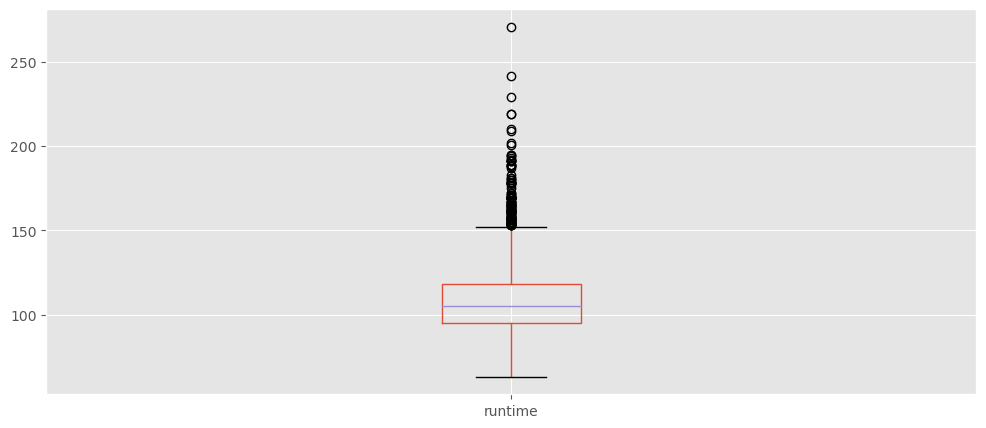

In [19]:
#revisión de outliers para la duración de las películas
df.boxplot(column=['runtime'])

Posteriormente, procedemos a investigar los posibles valores atípicos en la duración de las películas ("runtime"). Nuevamente, observamos la presencia de películas que se destacan por su duración inusualmente larga en relación con el resto.

Estos hallazgos preliminares nos preparan para explorar visualmente las relaciones entre estas variables a través de gráficos de dispersión y otras representaciones gráficas.

Gráficos de dispersión para Gross vs Votes y Gross vs Runtime.

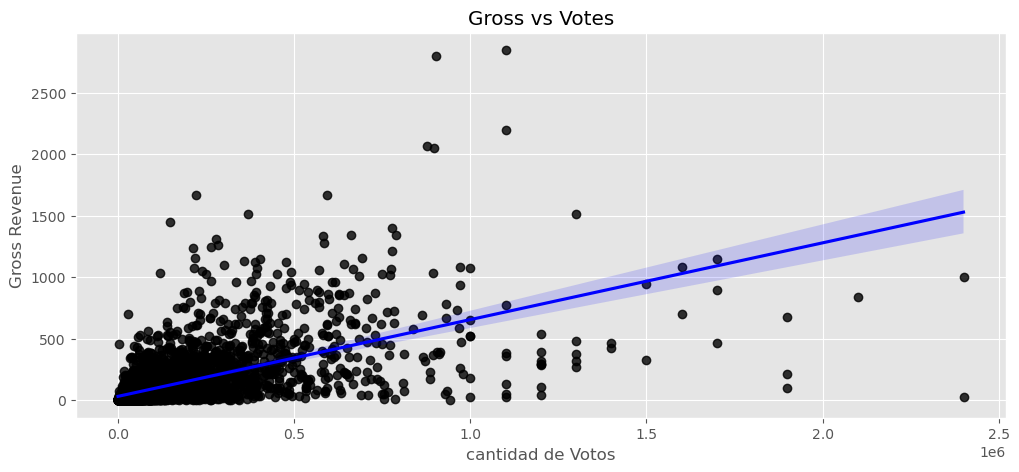

In [20]:
# Gross vs Votes

sns.regplot(x="votes", y="gross", data= df, scatter_kws={"color":"black"}, line_kws={"color":"blue"})
plt.xlabel("cantidad de Votos")
plt.ylabel("Gross Revenue")
plt.title("Gross vs Votes")
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 

plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


En el primer gráfico, "Gross vs Votes", observamos una tendencia creciente que sugiere que a medida que aumenta el número de votos que recibe una película, también tiende a aumentar su ingreso bruto en taquilla. Esto indica que una mayor interacción del público, medida por la cantidad de votos, se relaciona con un mayor éxito financiero (en términos de ingreso bruto).

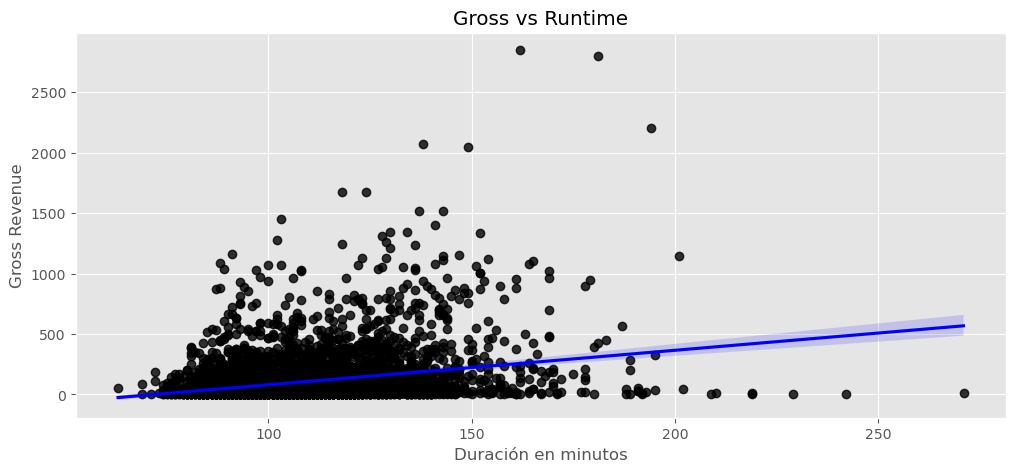

In [21]:
# Gross vs runtime

sns.regplot(x="runtime", y="gross", data= df, scatter_kws={"color":"black"}, line_kws={"color":"blue"})
plt.xlabel("Duración en minutos")
plt.ylabel("Gross Revenue")
plt.title("Gross vs Runtime")
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 

plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

En el segundo gráfico, "Gross vs Runtime", se refleja una relación similar. A medida que la duración de las películas aumenta, también lo hace el ingreso bruto. Esta correlación positiva sugiere que el público muestra disposición a invertir más tiempo en películas con una duración más larga, lo que a su vez se traduce en mayores ingresos.

Estos gráficos de dispersión respaldan nuestras observaciones previas sobre las correlaciones entre estas variables. En resumen, podemos concluir que tanto la cantidad de votos como la duración de las películas influyen de manera significativa en el ingreso bruto en taquilla. Esta información puede ser valiosa para tomar decisiones estratégicas en la industria cinematográfica y comprender mejor los factores que impulsan el éxito financiero de una película.

### 1.4 Evolucion promedio de Gross y budget a través del tiempo

En la sección 1.4, nos sumergimos en el análisis de la evolución a lo largo del tiempo en relación al ingreso bruto (Gross) y al presupuesto (Budget) promedio de las películas. Para ello, hemos creado gráficos de líneas que nos permiten visualizar cómo han variado estas métricas a lo largo de los años.

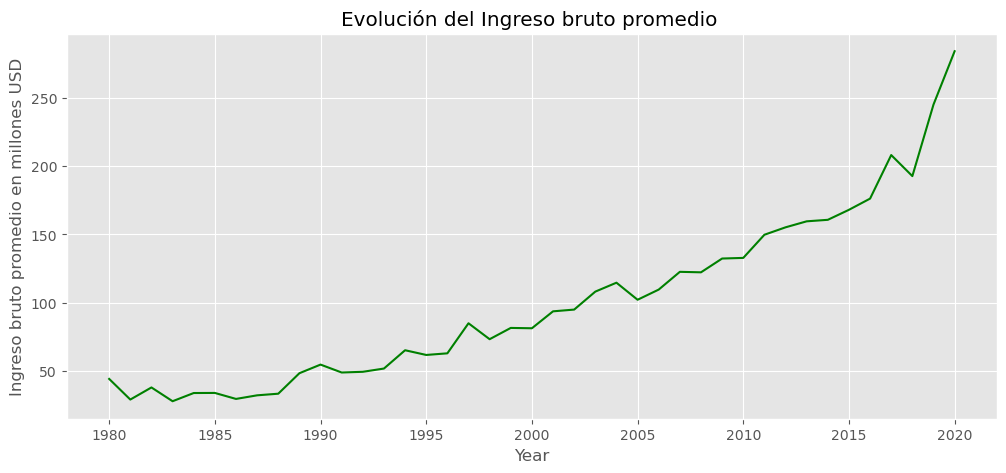

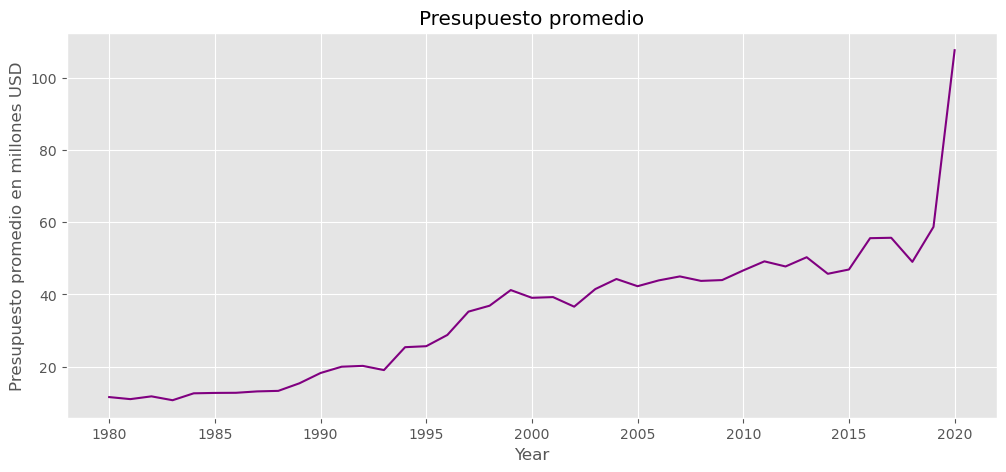

In [22]:
# agrupamos y luego creamos un grafico de lineas
#gross

gross_mean_by_year= df.groupby('year')['gross'].mean().reset_index()
sns.lineplot(x="year",y="gross", data= gross_mean_by_year, color="green")

plt.xlabel("Year")
plt.ylabel("Ingreso bruto promedio en millones USD")
plt.title("Evolución del Ingreso bruto promedio ")
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


# Budget a través del tiempo


budget_mean_by_year= df.groupby('year')['budget'].mean().reset_index()
sns.lineplot(x="year",y="budget", data= budget_mean_by_year, color="purple")

plt.xlabel("Year")
plt.ylabel("Presupuesto promedio en millones USD")
plt.title("Presupuesto promedio")
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()





El primer gráfico muestra la evolución promedio del ingreso bruto. Observamos un aumento gradual a través de los años, lo que sugiere un crecimiento constante en la industria cinematográfica en términos de recaudación en taquilla. Esto puede indicar una mayor audiencia y una mayor inversión en la producción de películas a lo largo del tiempo.

En el segundo gráfico, exploramos la evolución promedio del presupuesto. También podemos apreciar un aumento a lo largo de los años. Esto puede interpretarse como un aumento en la inversión financiera en la creación y producción de películas, lo que podría relacionarse con la búsqueda de mayores estándares de calidad y experiencias más inmersivas para el público.

Estos gráficos nos brindan una perspectiva clara de cómo ha evolucionado la industria cinematográfica en términos de ingresos y gastos a lo largo de las décadas. En resumen, podemos afirmar que la industria del cine sigue en crecimiento, demostrando atractivos ingresos promedio. Además, es evidente que con el tiempo se han destinado mayores cantidades de capital para la creación y producción de películas, lo que refleja un compromiso constante con la innovación y la excelencia en la industria.

### 1.5 Score vs Votes vs Runtime vs Year

Continuamos nuestra inmersión en el análisis exploratorio centrándonos en la relación entre el puntaje (Score), los votos, la duración (Runtime) y el año de lanzamiento. La matriz de correlación revela que el puntaje también está vinculado a estas variables, lo que nos lleva a investigar más a fondo.

Realizamos una revisión de valores atípicos para el puntaje utilizando un gráfico de caja.

<Axes: >

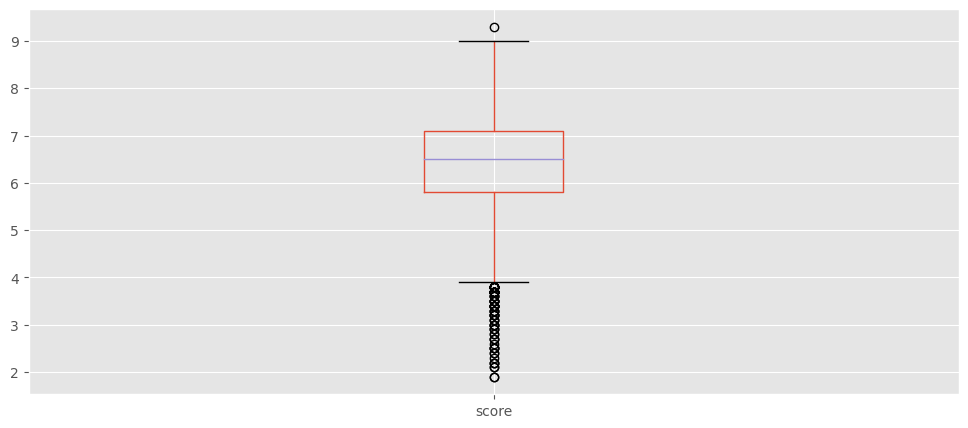

In [23]:
# revisión de outliers para Score
df.boxplot(column=['score'])

Identificamos películas con calificaciones excepcionalmente bajas en comparación con las demás, lo que podría sugerir la presencia de producciones que no fueron bien recibidas por la audiencia.

##### 1.6 Score vs Votes

continuamos explorando la relación entre el puntaje y los votos a través de gráficos de dispersión

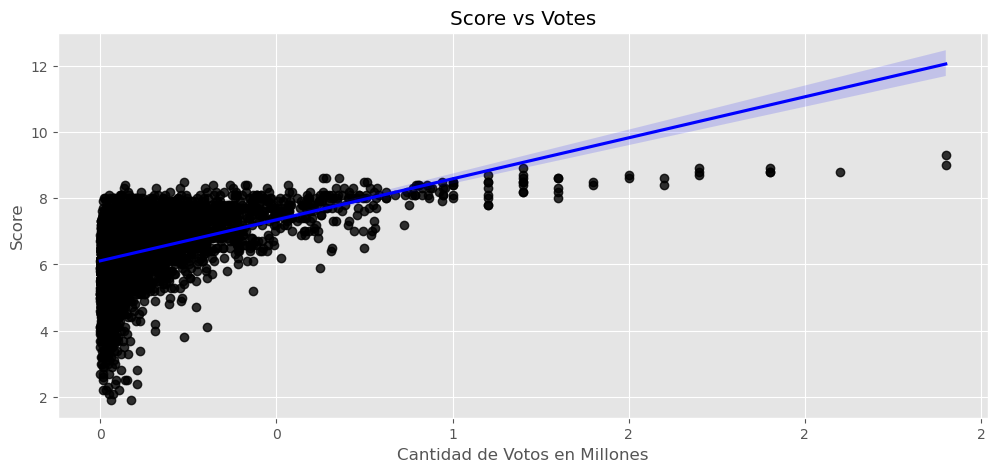

In [24]:
# crear un grafico scatter para Score y Votes, y le vamos a agregar una linea de regresion ajustada
sns.regplot(x="votes", y="score", data= df, scatter_kws={"color":"black"}, line_kws={"color":"blue"})
plt.xlabel("Cantidad de Votos en Millones")
plt.ylabel("Score")
plt.title("Score vs Votes")

# Formatear los ejes en millones de dólares
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}")  # Función para dividir por 1e6 y mostrar sin decimales
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

En el mundo del cine, vemos que más votos suelen traducirse en puntajes más altos. Aunque destacan casos únicos: películas con pocos votos y calificaciones sobresalientes, quizás porque cautivan a un público selecto. Así, aunque la conexión sea positiva, cada película tiene su historia más allá de los números.

##### 1.7 Score vs Runtime

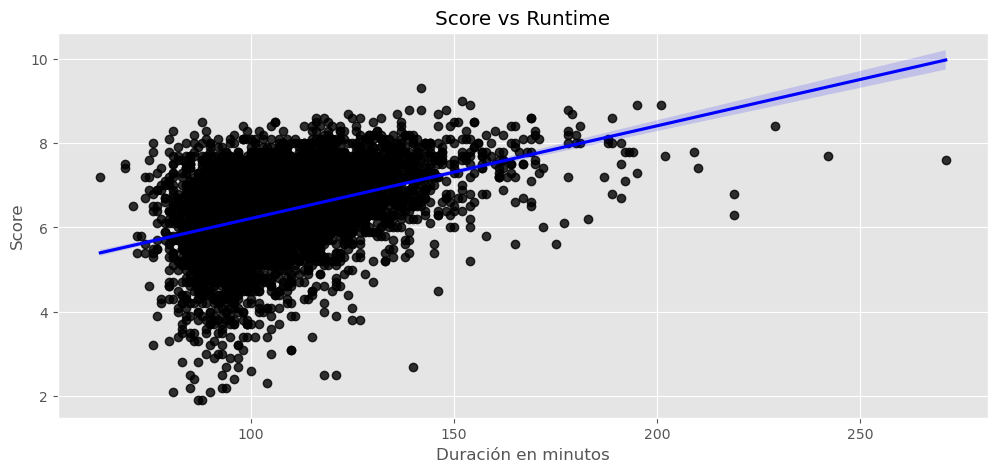

In [25]:
# crear un grafico scatter para Score y runtime, y le vamos a agregar una linea de regresion ajustada
sns.regplot(x="runtime", y="score", data= df, scatter_kws={"color":"black"}, line_kws={"color":"blue"})
plt.xlabel("Duración en minutos")
plt.ylabel("Score")
plt.title("Score vs Runtime")

plt.show()

En el tapiz cinematográfico, se revela que con frecuencia las películas más extensas logran puntajes más elevados. No obstante, es esencial no pasar por alto las joyas de duración media que conquistan calificaciones impactantes. Cada película imprime su ritmo único, desafiando las expectativas numéricas y subrayando que en la narrativa de grandeza en el séptimo arte, cada minuto aporta su peso

##### Comentarios:
Imaginemos cada película como un lienzo en blanco, donde las variables 'Score', 'Votes', 'Run time' y 'Gross' se entrelazan en una narrativa intrigante. Dentro de esta trama, emerge una conexión interesante: las películas con altas puntuaciones a menudo atraen una audiencia más amplia y tienden a tener una duración más extensa para explorar su historia en detalle. Curiosamente, esta sinfonía de factores también repercute en el aspecto financiero. A medida que los votos aumentan y el tiempo en pantalla se extiende, surge un efecto modesto pero apreciable en los ingresos de taquilla. Cada película, como un personaje en la historia, aporta su propia perspectiva a este relato cinematográfico.

##### 1.8 Score medio vs year

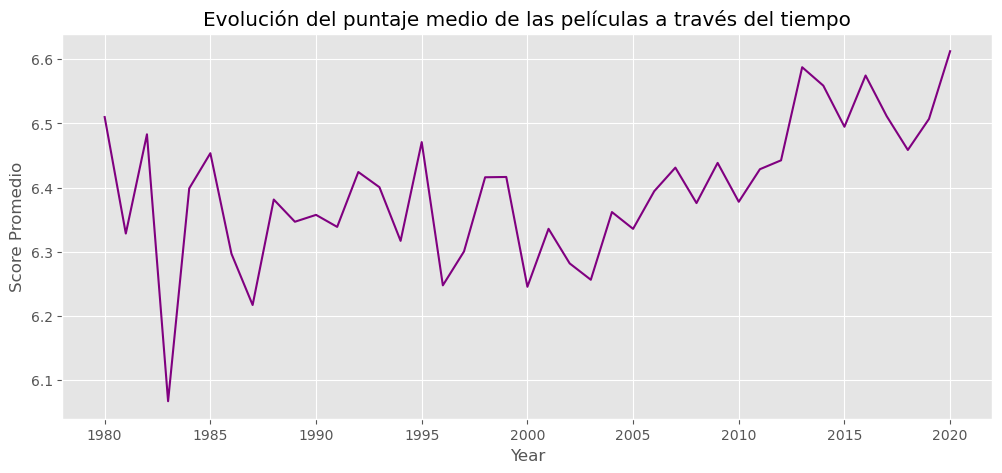

In [26]:
score_mean_by_year= df.groupby('year')['score'].mean().reset_index()
sns.lineplot(x="year",y="score", data= score_mean_by_year, color="purple")

plt.xlabel("Year")
plt.ylabel("Score Promedio")
plt.title("Evolución del puntaje medio de las películas a través del tiempo")


plt.show()

La línea del 'Puntaje medio' es un reflejo de la incansable búsqueda de la excelencia a lo largo de las décadas. Las puntuaciones fluctúan, narrando una travesía de altibajos y el constante afán por la calidad. A medida que avanzamos en el tiempo, esta métrica se convierte en un testigo de la evolución de la industria.


##### 1.9 Votos, runtime, Score vs Year - linear

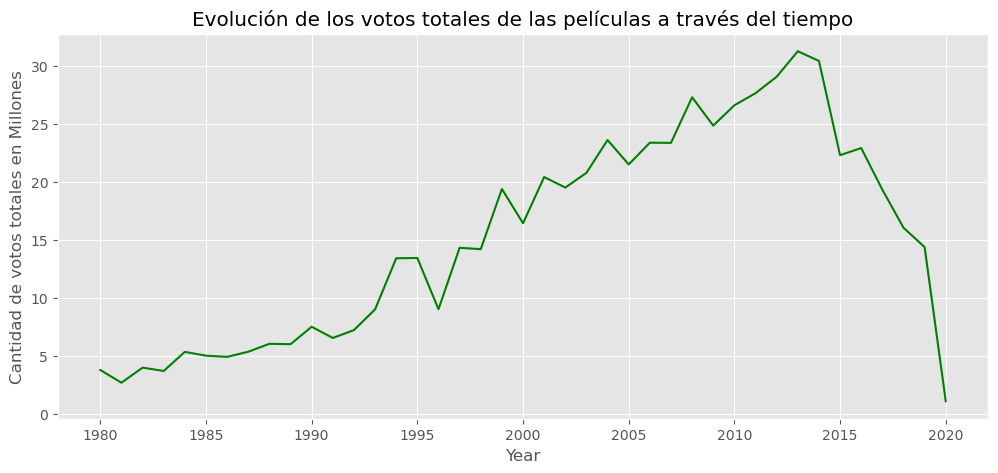

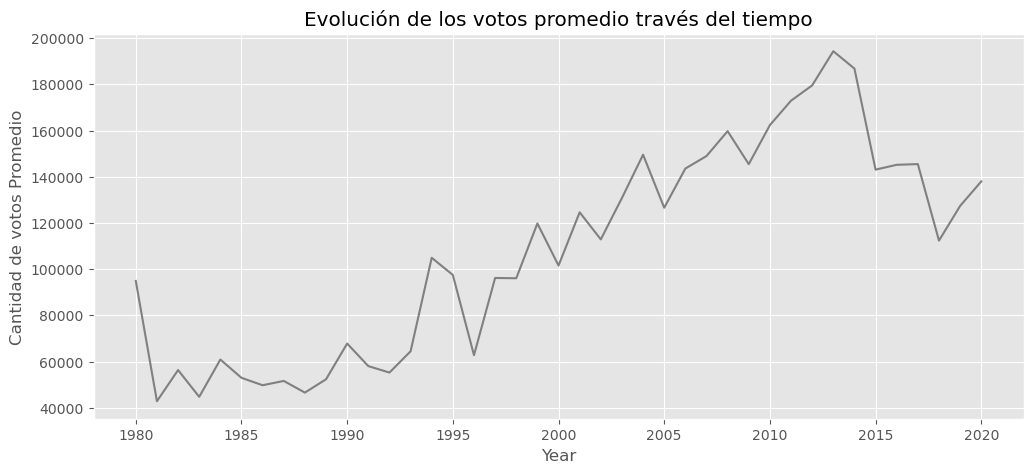

In [27]:
total_votes_by_year= df.groupby('year')['votes'].sum().reset_index()
sns.lineplot(x="year",y="votes", data= total_votes_by_year, color="green")

plt.xlabel("Year")
plt.ylabel("Cantidad de votos totales en Millones")
plt.title("Evolución de los votos totales de las películas a través del tiempo")
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}")  # Función para dividir por 1e6 y mostrar sin decimales
plt.gca().yaxis.set_major_formatter(formatter)


plt.show()

# Votes mean vs year

votes_mean_by_year= df.groupby('year')['votes'].mean().reset_index()
sns.lineplot(x="year",y="votes", data= votes_mean_by_year, color="gray")

plt.xlabel("Year")
plt.ylabel("Cantidad de votos Promedio")
plt.title("Evolución de los votos promedio través del tiempo")
plt.show()






Los 'Votos Totales por Año' nos sumergen en la participación activa del público. Si bien los números totales han experimentado una reducción en los últimos años, el fervor de los votantes se mantiene, con el 'Promedio de Votos por Año' mostrando una respuesta constante y reflexiva de la audiencia.


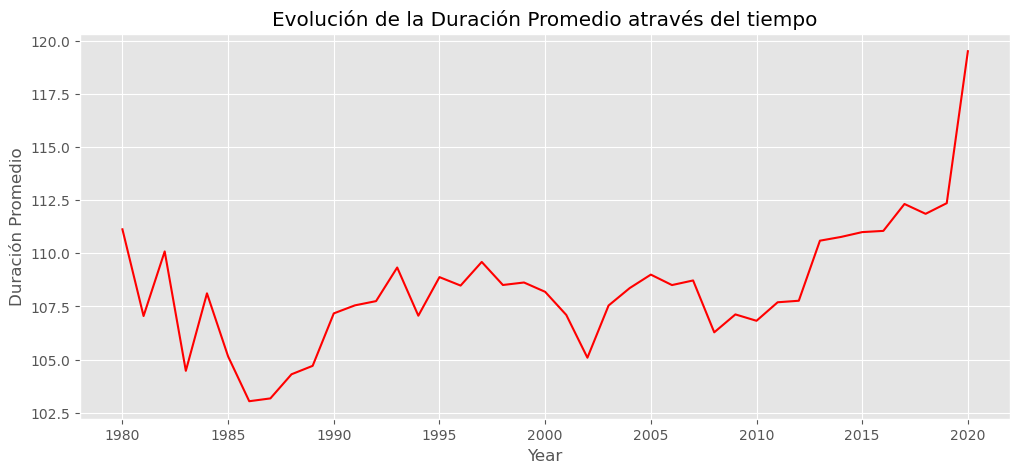

In [28]:
# runtime vs year

runtime_mean_by_year= df.groupby('year')['runtime'].mean().reset_index()
sns.lineplot(x="year",y="runtime", data= runtime_mean_by_year, color="red")

plt.xlabel("Year")
plt.ylabel("Duración Promedio")
plt.title("Evolución de la Duración Promedio através del tiempo")
plt.show()

Finalmente, el 'Tiempo de Duración Promedio' añade una dimensión adicional. Desde los años 80 hasta la actualidad, las películas han mantenido una duración promedio constante, alrededor de 108-110 minutos. 

Sin embargo, en los años recientes se ha experimentado un aumento significativo. A medida que la narración se ha expandido y las historias se han vuelto más intrincadas, la duración promedio se ha incrementado,esto refleja una evolución en las preferencias de la audiencia, una disposición a comprometer más tiempo con historias más profundas y elaboradas.

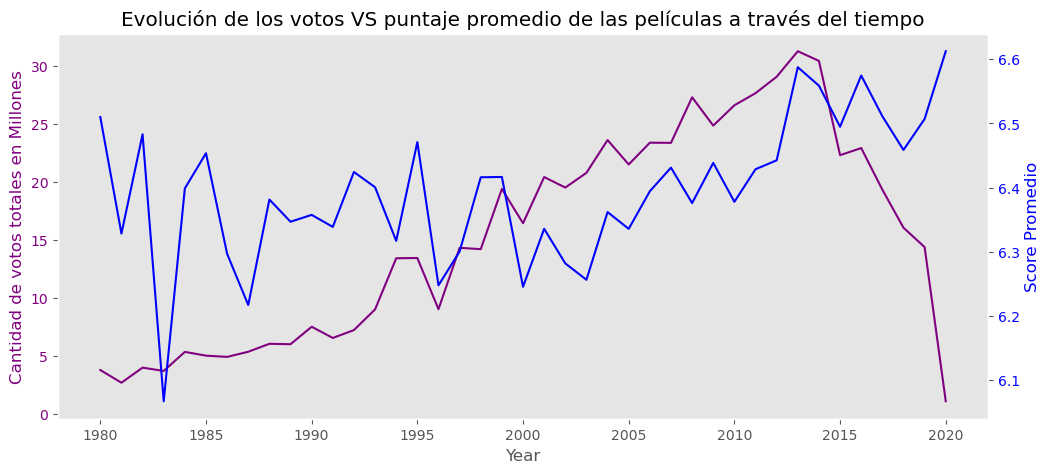

In [29]:
#grafico combinado


# Gráfico de votos totales
total_votes_by_year = df.groupby('year')['votes'].sum().reset_index()
fig, ax1 = plt.subplots()
color = 'purple'
ax1.set_xlabel("Year")
ax1.set_ylabel("Cantidad de votos totales en Millones", color=color)
ax1.set_title("Evolución de los votos VS puntaje promedio de las películas a través del tiempo")

formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}")
ax1.yaxis.set_major_formatter(formatter)
sns.lineplot(x="year", y="votes", data=total_votes_by_year, color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # Desactivar cuadrícula en el primer eje

# Gráfico de puntaje promedio
ax2 = ax1.twinx()
color = 'blue'
score_mean_by_year = df.groupby('year')['score'].mean().reset_index()
ax2.set_ylabel("Score Promedio", color=color)
sns.lineplot(x="year", y="score", data=score_mean_by_year, color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # Desactivar cuadrícula en el segundo eje

plt.show()


Este gráfico combina el 'Total de Votos ' con el 'Score Promedio', destacando una disminución reciente en los votos totales mientras el puntaje promedio se mantiene estable. Esta divergencia sugiere un cambio en la interacción de la audiencia con las películas. A pesar de la menor participación, la consistencia en las puntuaciones podría indicar que la calidad cinematográfica sigue siendo constante y relevante para quienes votan, revelando una relación compleja entre la cantidad de votos y la percepción de calidad en la industria del cine.

### 2. Análisis de Categorías
Genero

En esta siguiente sección, nos sumergimos en el análisis de géneros cinematográficos. Exploraremos los géneros líderes en ingresos brutos y presupuestos, así como los más frecuentes, votados y valorados. También realizaremos un análisis de Pareto para identificar las áreas principales de impacto en ingresos brutos, netos y presupuestos. Este análisis nos proporcionará una visión completa de cómo los géneros influyen en la rentabilidad y el éxito en la industria cinematográfica.

##### 2.1  Ingreso entre los generos

En esta sección, exploraremos el panorama financiero. A medida que nuestras visualizaciones revelan detalles, descubrimos las historias financieras detrás de cada género, dando rumbo a la narrativa financiera cinematográfica.

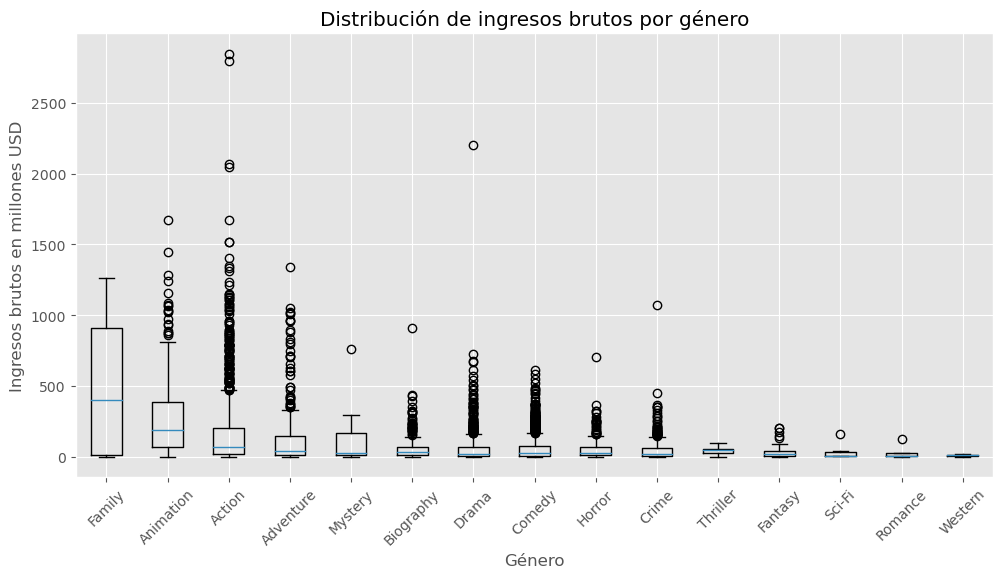

In [30]:
#boxplot entre ingreso y generos, distribución del ingreso entre los generos

# Crear una lista ordenada de géneros según elingreso promedio
ordered_genres = df.groupby('genre')['gross'].mean().sort_values(ascending=False).index

# Crear el gráfico de boxplot con los géneros ordenados
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['genre'] == genre]['gross'] for genre in ordered_genres])
plt.xticks(range(1, len(ordered_genres) + 1), ordered_genres, rotation=90)
plt.xlabel('Género')
plt.ylabel('Ingresos brutos en millones USD')
plt.title('Distribución de ingresos brutos por género')
plt.tight_layout()
plt.xticks(rotation=45)

# Formatear el eje y para mostrar millones de USD
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

# Mostrar el gráfico
plt.show()



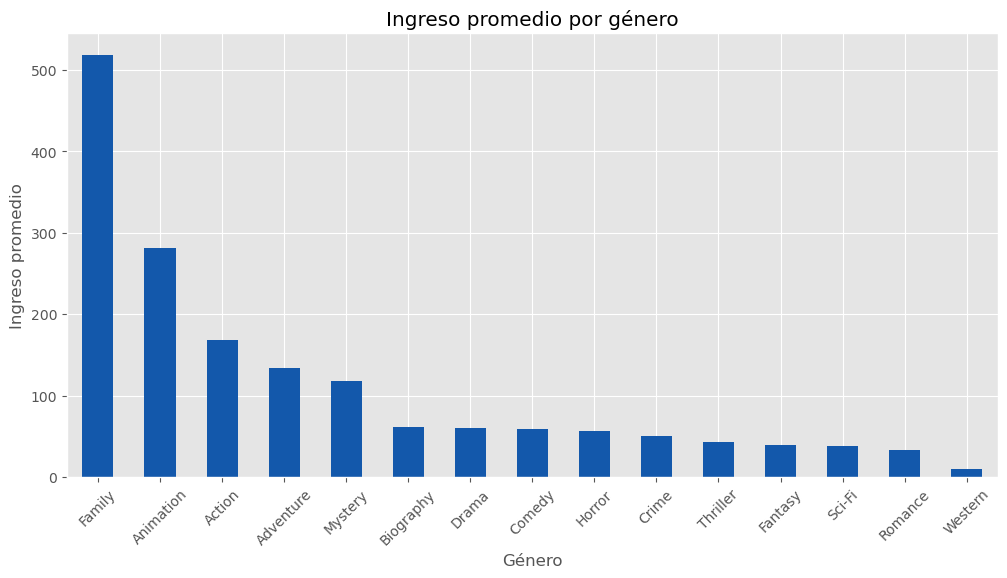

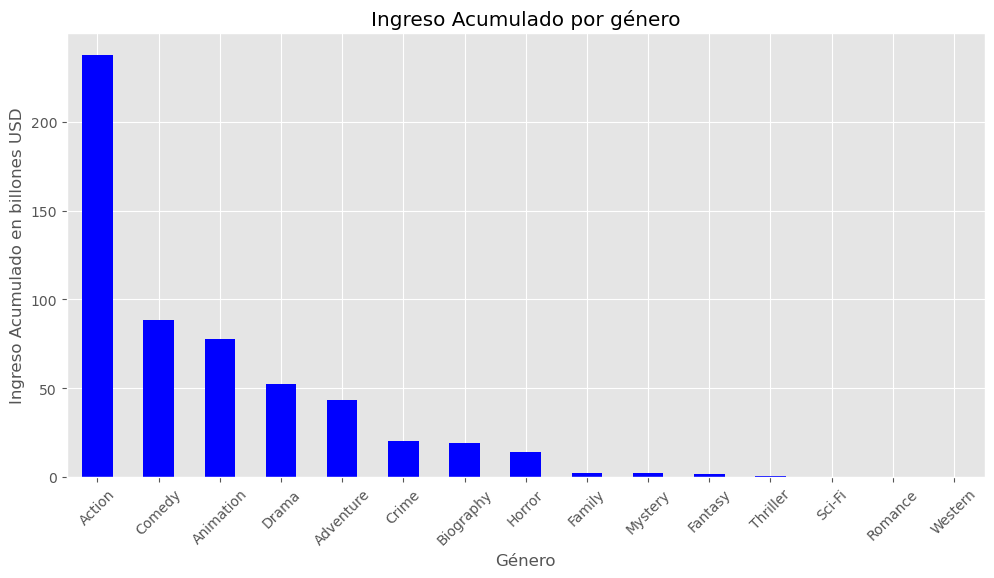

In [31]:
# ingreso promedio entre los generos

average_gross_by_genre = df.groupby('genre')['gross'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
average_gross_by_genre.plot(kind='bar', color="#1358ab")
plt.xlabel('Género')
plt.ylabel('Ingreso promedio')
plt.title('Ingreso promedio por género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(rotation=45)

formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 
plt.gca().yaxis.set_major_formatter(formatter)
# Mostrar el gráfico
plt.show()

# comparar contra el ingreso acumulado

acum_gross_by_genre = df.groupby('genre')['gross'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
acum_gross_by_genre.plot(kind='bar', color="blue")
plt.xlabel('Género')
plt.ylabel('Ingreso Acumulado en billones USD')
plt.title('Ingreso Acumulado por género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(rotation=45)

formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e9:.0f}") 
plt.gca().yaxis.set_major_formatter(formatter)
# Mostrar el gráfico
plt.show()

Los géneros 'Family' y 'Animation' destacan, demostrando que las películas aptas para todas las edades y las animaciones son amadas por el público en todo el mundo, con ingresos brutos promedio que superan los 200 millones de dólares. 

Por otro lado,'Action' y 'Comedy' también brillan, con ingresos acumulados que superan los (200 y 80 respectivamente)billones de dólares. Sin embargo, no podemos pasar por alto el poder del 'Drama'y 'Adventure'.

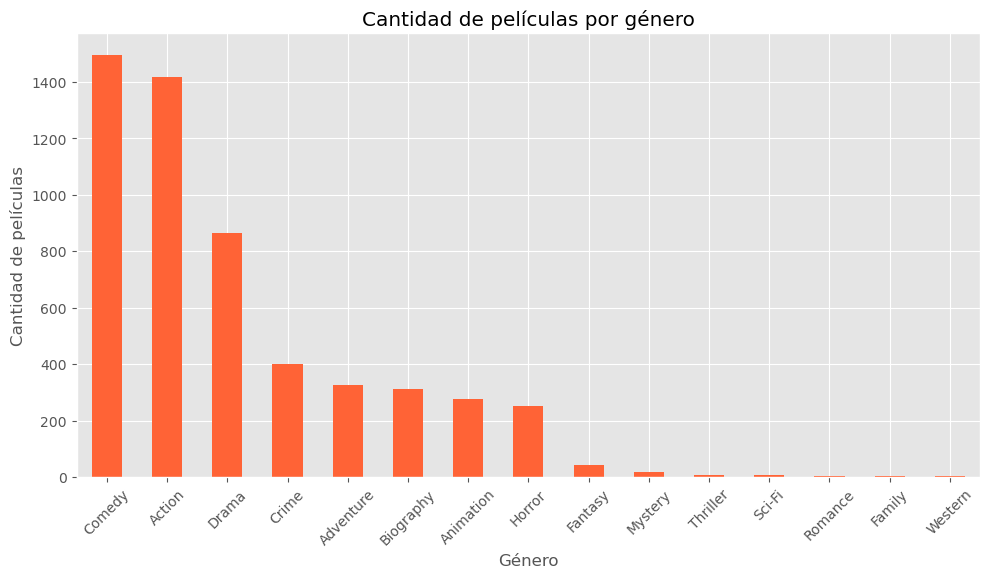

In [32]:
# cantidad de peliculas por genero determinado
# Contar la cantidad de películas por género
movie_count_by_genre = df['genre'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
movie_count_by_genre.plot(kind='bar', color="#ff6336")
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas por género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



In [33]:
movie_count_by_genre

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

'Comedy' y 'Action' lideran con una frecuencia significativa. Estos géneros no solo son abundantes en número, sino que también se alinean con nuestra exploración de ingresos, donde 'Comedy' y 'Action' han demostrado ser poderosos contribuyentes al atractivo financiero de la industria. Este gráfico agrega otra dimensión a nuestra comprensión, destacando cómo ciertos géneros no solo son populares, sino también potentes pilares en el escenario cinematográfico.

Por otra parte, tenemos a 'Thriller', 'Sci-Fi ', 'Romance ', 'Family' y'Western', que no superan mas de 8 producciones ene ste dataset. Es importante tener en cuenta estos géneros con pocas películas ya que puede incidir en la interpretación de otros gráifcos y análisis.


##### 2.2 Budget entre los generos

Siguiendo la línea de nuestra exploración anterior, presentaremos gráficos de barras que muestran tanto el presupuesto promedio como el acumulado por género. Esto también nos faiclita comprender las inversiones económicas detrás de cada historia que llega a la gran pantalla.

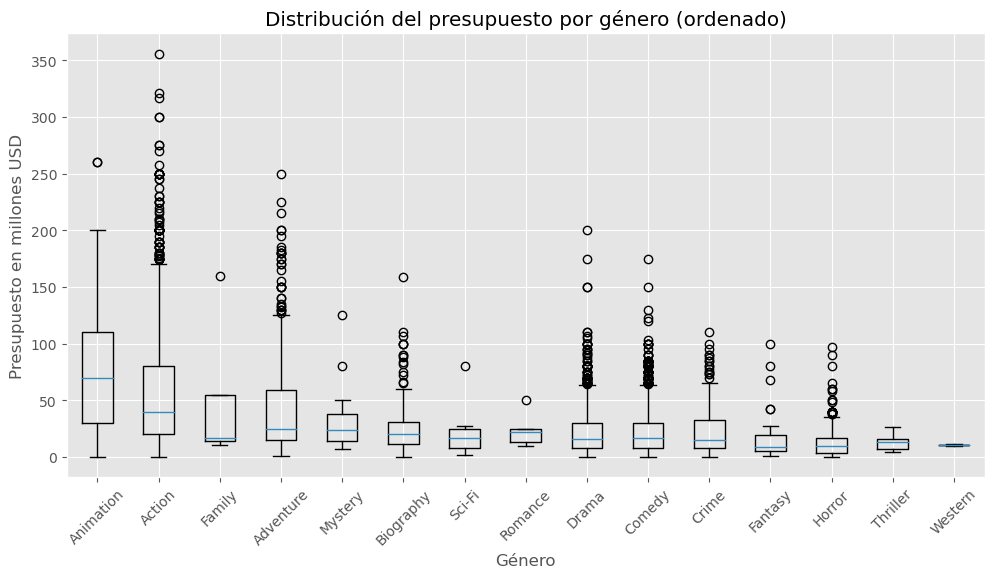

In [34]:
# boxplot budget- genre
# Calcular el presupuesto promedio por género
average_budget_by_genre = df.groupby('genre')['budget'].mean()

# Ordenar los géneros por presupuesto promedio de mayor a menor
sorted_genres = average_budget_by_genre.sort_values(ascending=False).index

# Crear el gráfico de boxplot con el orden de los géneros
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['genre'] == genre]['budget'] for genre in sorted_genres])
plt.xticks(range(1, len(sorted_genres) + 1), sorted_genres, rotation=90)
plt.xlabel('Género')
plt.ylabel('Presupuesto en millones USD')
plt.title('Distribución del presupuesto por género (ordenado)')
plt.tight_layout()
plt.xticks(rotation=45)
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()





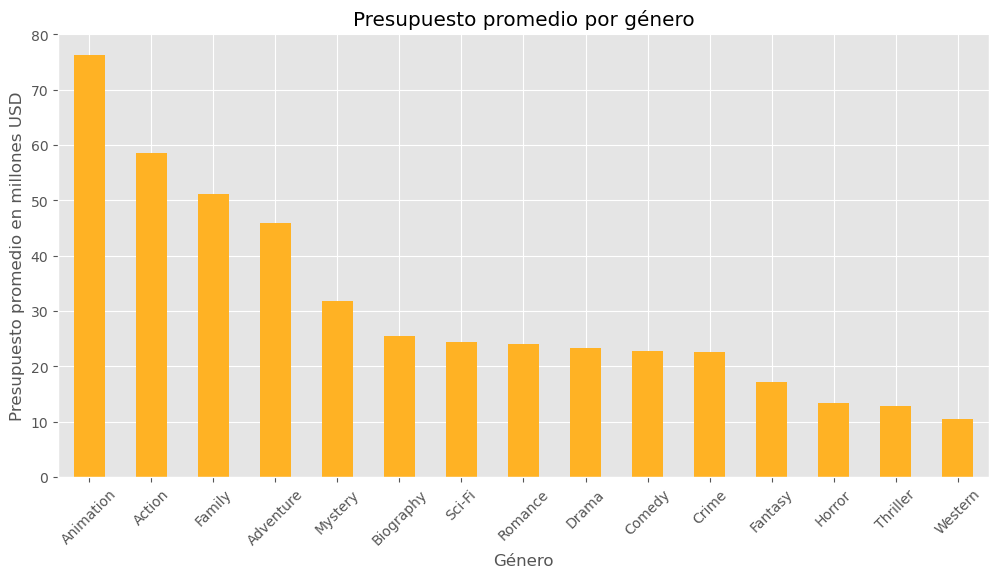

In [35]:
#presupuesto promedio por genero
# Calcular el presupuesto promedio por género
average_budget_by_genre = df.groupby('genre')['budget'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
average_budget_by_genre.plot(kind='bar', color="#ffb224")
plt.xlabel('Género')
plt.ylabel('Presupuesto promedio en millones USD')
plt.title('Presupuesto promedio por género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(rotation=45)
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 
plt.gca().yaxis.set_major_formatter(formatter)

# Mostrar el gráfico
plt.show()




'Animation', 'Action' y 'Family' encabezan la inversión financiera. Estos géneros, no solo amados por el público, también capturan la atención de los productores y estudios dispuestos a invertir en narrativas visualmente ricas y llenas de acción.

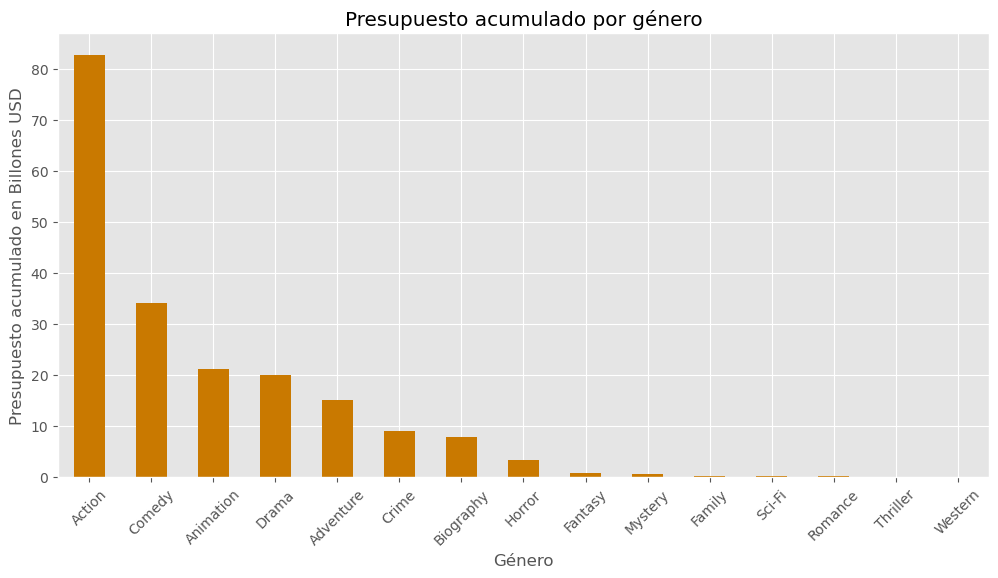

In [36]:
#presupuesto aucmulado por genero

# Calcular el presupuesto acumulado por género
acum_budget_by_genre = df.groupby('genre')['budget'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
acum_budget_by_genre.plot(kind='bar',color="#c97900")
plt.xlabel('Género')
plt.ylabel('Presupuesto acumulado en Billones USD')
plt.title('Presupuesto acumulado por género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(rotation=45)
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e9:.0f}") 
plt.gca().yaxis.set_major_formatter(formatter)

# Mostrar el gráfico
plt.show()


Vemos cómo 'Action', 'Comedy' y 'Animation' se distinguen como protagonistas en términos de inversión acumulada.

#### 2.3 Análisis de Pareto 
##### 2.3.1 Ingreso acumulado, Genre

Ahora, vamos más allá de los gráficos y exploramos el concepto de Pareto, examinando cómo se distribuye el 80% de ingresos brutos, presupuestos e ingresos netos en relación con el 20% de los géneros más destacados. A medida que revelamos cómo esta regla fundamental se manifiesta en los datos, descubrimos los géneros que lideran en cada aspecto financiero, brindándonos una visión profunda de las fuentes primarias de éxito y ganancias en la industria del cine.

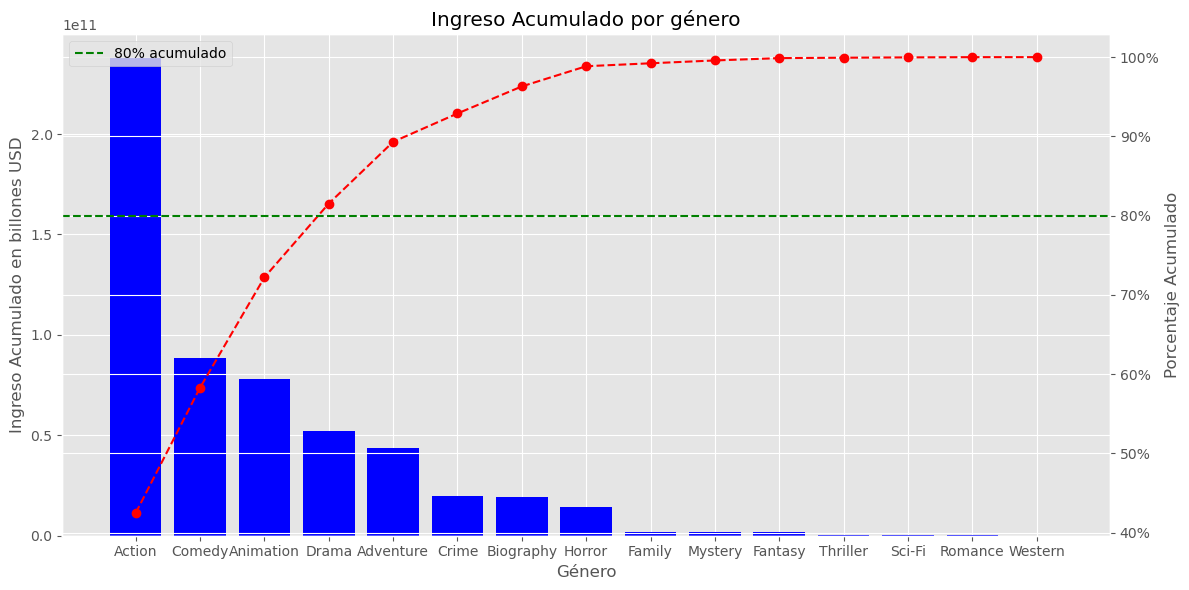

In [37]:
# digrama de pareto para revisar el la mayor concentraicon del ingreso entre los generos mas rentables



# Calcular el ingreso acumulado por género
acum_gross_by_genre = df.groupby('genre')['gross'].sum().sort_values(ascending=False)

# Calcular el porcentaje acumulado
percentage = (acum_gross_by_genre / acum_gross_by_genre.sum()).cumsum()

# Crear el gráfico de barras y línea
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(acum_gross_by_genre.index, acum_gross_by_genre, color="blue")
ax1.set_xlabel('Género')
ax1.set_ylabel('Ingreso Acumulado en billones USD')
ax1.set_title('Ingreso Acumulado por género')

ax2 = ax1.twinx()
ax2.plot(acum_gross_by_genre.index, percentage, color="red", marker='o', linestyle='--')
ax2.set_ylabel('Porcentaje Acumulado')
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1))

# Agregar una línea horizontal en el 80% de ingreso acumulado
ax2.axhline(y=0.8, color='green', linestyle='--', label='80% acumulado')
ax2.legend(loc='upper left')

# Ajustar las etiquetas del eje x
plt.xticks(range(len(acum_gross_by_genre.index)), acum_gross_by_genre.index, rotation=45, ha='right')

plt.tight_layout()

# Mostrar el gráfico
plt.show()




Para el análisis de Pareto en ingreso bruto acumulado entre los géneros, el gráfico revela que la frecuencia acumulada del 80% se concentra en los géneros principales de "Action", "Comedy", "Animation" y "Drama", en orden descendente.

#####  2.3.2 Presupuesto Acumulado

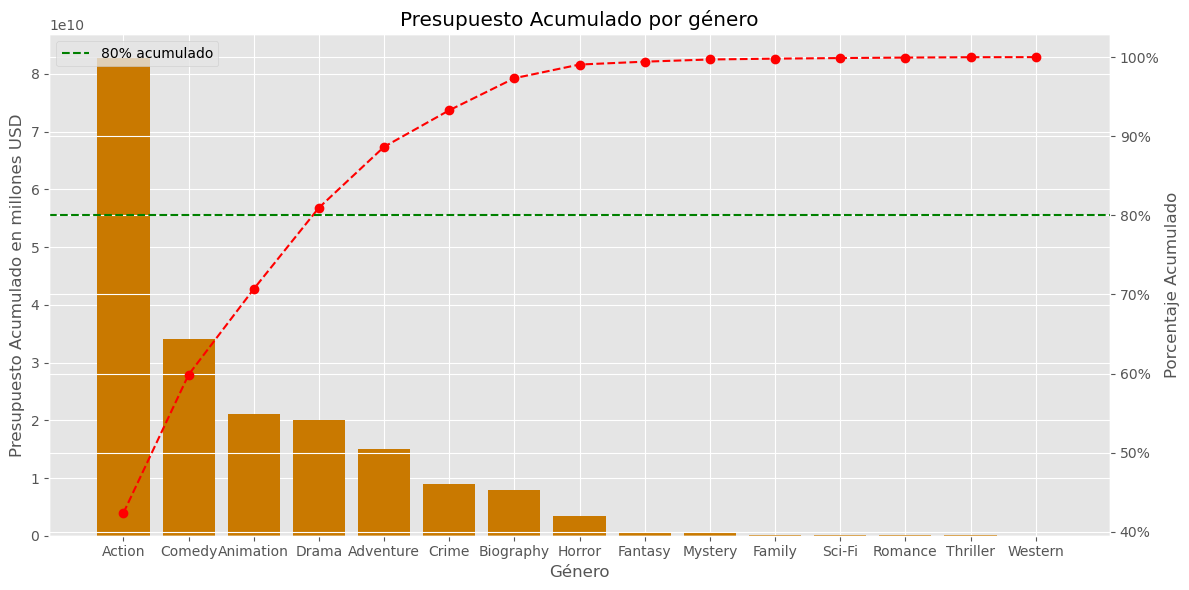

In [38]:
# Calcular el presupuesto acumulado por género
acum_budget_by_genre = df.groupby('genre')['budget'].sum().sort_values(ascending=False)

# Calcular el porcentaje acumulado de presupuesto
percentage_budget = (acum_budget_by_genre / acum_budget_by_genre.sum()).cumsum()

# Crear el gráfico de barras y línea para el presupuesto
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(acum_budget_by_genre.index, acum_budget_by_genre, color="#c97900")
ax1.set_xlabel('Género')
ax1.set_ylabel('Presupuesto Acumulado en millones USD')
ax1.set_title('Presupuesto Acumulado por género')

ax2 = ax1.twinx()
ax2.plot(acum_budget_by_genre.index, percentage_budget, color="red", marker='o', linestyle='--')
ax2.set_ylabel('Porcentaje Acumulado')
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1))

# Agregar una línea horizontal en el 80% de presupuesto acumulado
ax2.axhline(y=0.8, color='green', linestyle='--', label='80% acumulado')
ax2.legend(loc='upper left')

# Ajustar las etiquetas del eje x
plt.xticks(range(len(acum_budget_by_genre.index)), acum_budget_by_genre.index, rotation=45, ha='right')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


Similarmente, en el caso del presupuesto acumulado, esta tendencia persiste, destacando una vez más los géneros de "Action", "Comedy", "Animation" y "Drama" como los principales inversores en términos de presupuesto.

##### 2.3.3 Ingreso Neto Acumulado

Antes de realizar el gráfico de Pareto para el ingreso Neto, debemos crear una nueva columna a partir de "gross" y "budget" (IN = IB - CT), asumiendo que en "budget" se concentran todos los costos.

In [39]:


# Calcular la nueva columna "ingreso_neto" (gross - budget)
df['ingreso_neto'] = df['gross'] - df['budget']



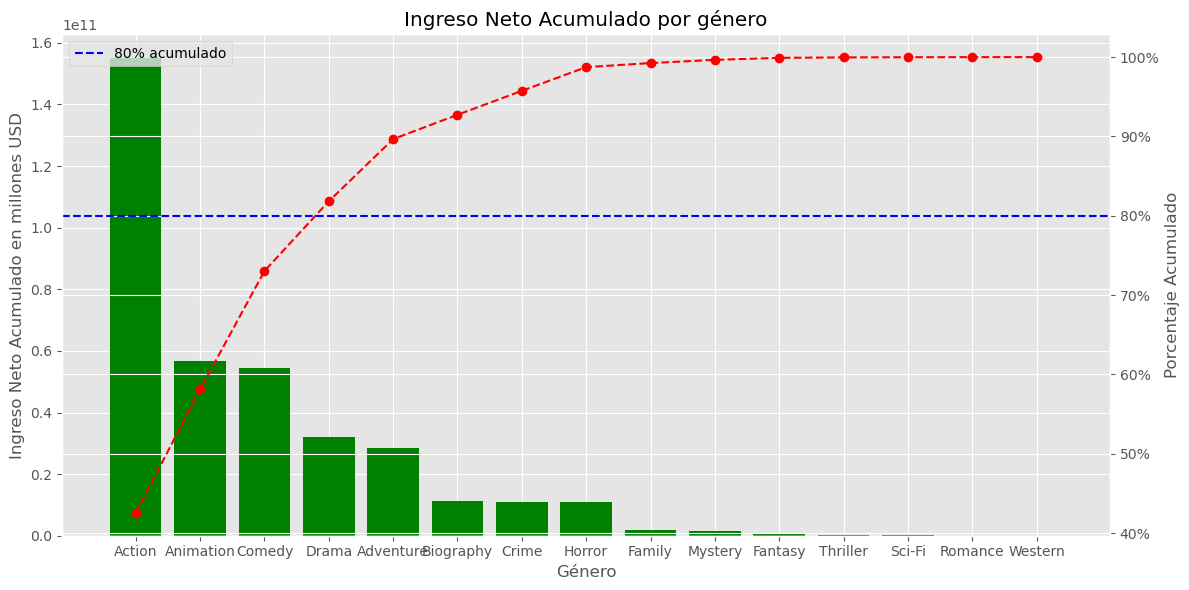

In [40]:


# Calcular el ingreso neto acumulado por género
acum_ingreso_neto_by_genre = df.groupby('genre')['ingreso_neto'].sum().sort_values(ascending=False)

# Calcular el porcentaje acumulado
percentage = (acum_ingreso_neto_by_genre / acum_ingreso_neto_by_genre.sum()).cumsum()

# Crear el gráfico de barras y línea (Pareto)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(acum_ingreso_neto_by_genre.index, acum_ingreso_neto_by_genre, color="green")
ax1.set_xlabel('Género')
ax1.set_ylabel('Ingreso Neto Acumulado en millones USD')
ax1.set_title('Ingreso Neto Acumulado por género')

ax2 = ax1.twinx()
ax2.plot(acum_ingreso_neto_by_genre.index, percentage, color="red", marker='o', linestyle='--')
ax2.set_ylabel('Porcentaje Acumulado')
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1))

# Agregar una línea horizontal en el 80% del ingreso neto acumulado
ax2.axhline(y=0.8, color='blue', linestyle='--', label='80% acumulado')
ax2.legend(loc='upper left')

# Ajustar las etiquetas del eje x
plt.xticks(range(len(acum_ingreso_neto_by_genre.index)), acum_ingreso_neto_by_genre.index, rotation=45, ha='right')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


Por último, en el análisis de ingreso neto acumulado, observamos un cambio sutil en el orden, donde "Action", "Animation", "Comedy" y "Drama" encabezan la distribución del 80%. Estos patrones subrayan la consistencia de ciertos géneros en los tres aspectos financieros, reafirmando su influencia en la rentabilidad global de la industria cinematográfica."

### 2.4 Rentabilidad

En la sección 2.4, 'Rentabilidad', seguimos profundizando en un análisis financiero. Comenzamos con un 'Word Cloud' que destaca películas rentables en términos de ingreso neto. Luego, con gráficos de ingreso neto acumulado y promedio, exploramos la evolución financiera de géneros a lo largo del tiempo. Introducimos el indicador 'ratio_gross_budget', evaluando proporciones de ingresos brutos y presupuestos. Además, abordamos el ROI a través de gráficos que ilustran el retorno de la inversión.

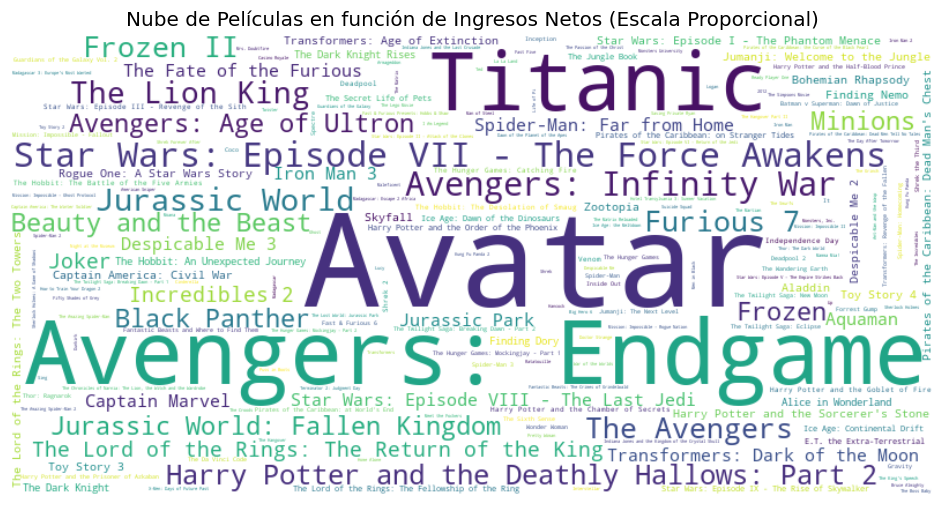

In [41]:

# Crear un diccionario con nombres de películas y sus ingresos netos
peliculas_ingresos_dict = dict(zip(df['name'], df['ingreso_neto']))

# Escalar los valores para que sean proporcionales
max_ingreso_neto = max(peliculas_ingresos_dict.values())
peliculas_ingresos_scaled = {pelicula: ingreso / max_ingreso_neto for pelicula, ingreso in peliculas_ingresos_dict.items()}

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(peliculas_ingresos_scaled)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Películas en función de Ingresos Netos (Escala Proporcional)')
plt.show()

##### 2.4.1 Ingreso Neto, entérminos acumulados y promedio

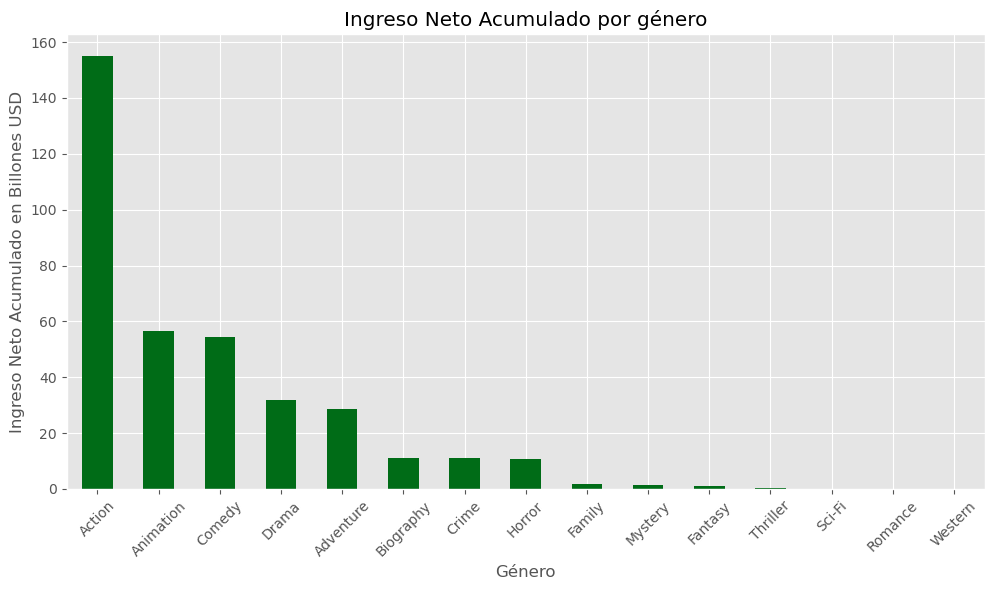

In [42]:
# Calcular el ingreso neto acumulado por género
acum_ingreso_neto_by_genre = df.groupby('genre')['ingreso_neto'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
acum_ingreso_neto_by_genre.plot(kind='bar', color="#006c17")
plt.xlabel('Género')
plt.ylabel('Ingreso Neto Acumulado en Billones USD')
plt.title('Ingreso Neto Acumulado por género')
plt.xticks(rotation=45)
plt.tight_layout()

formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e9:.0f}") 
plt.gca().yaxis.set_major_formatter(formatter)

# Mostrar el gráfico
plt.show()


Mediante el análisis de ingreso neto acumulado por género, resaltamos cómo géneros como 'Action', 'Animation', 'Comedy' y 'Drama' se destacan como los más rentables. Contrastando esta rentabilidad, también observamos géneros menos favorecidos en términos de ingreso neto acumulado, como 'Western' y 'Romance'. 

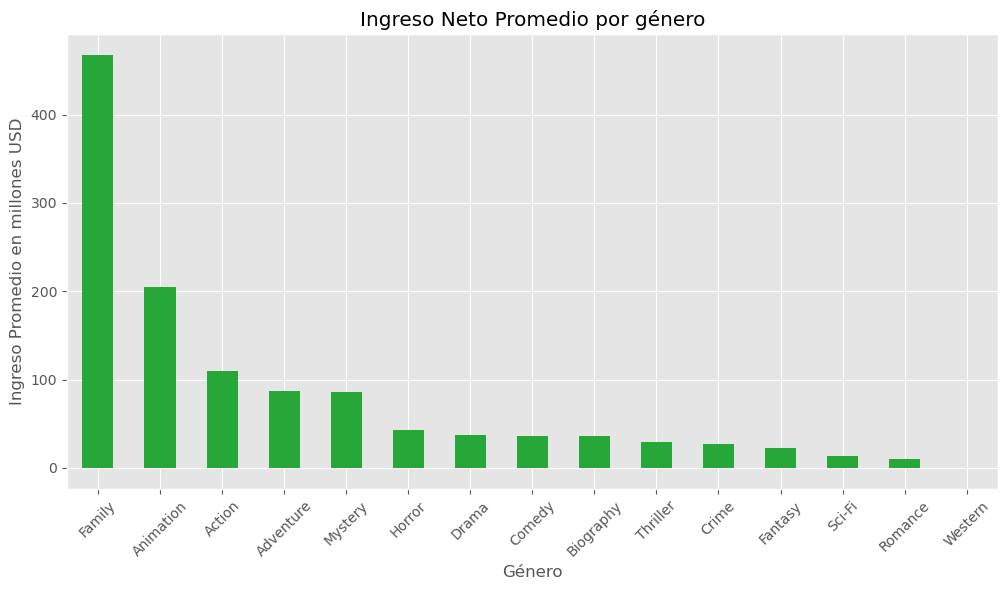

In [43]:
# ingreso neto promedio

# Calcular el ingreso neto acumulado por género
prom_ingreso_neto_by_genre = df.groupby('genre')['ingreso_neto'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
prom_ingreso_neto_by_genre.plot(kind='bar', color="#28a739")
plt.xlabel('Género')
plt.ylabel('Ingreso Promedio en millones USD')
plt.title('Ingreso Neto Promedio por género')
plt.xticks(rotation=45)
plt.tight_layout()

formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 
plt.gca().yaxis.set_major_formatter(formatter)

# Mostrar el gráfico
plt.show()


Al observar el ingreso neto promedio por género en relación con el número de películas, emergen perspectivas intrigantes. Géneros como 'Family' y 'Animation' se mantienen como líderes en ingresos netos promedio, destacando su atractivo financiero. Sin embargo, es crucial tener en cuenta que géneros con un menor número de películas, como 'Family'(4 películas), también pueden influir en estas cifras. Este matiz subraya la importancia de evaluar el equilibrio entre el número de películas y los ingresos netos para obtener una visión precisa de la rentabilidad por género en la industria cinematográfica.

##### Evolución historica del Ingreso Neto Promedio

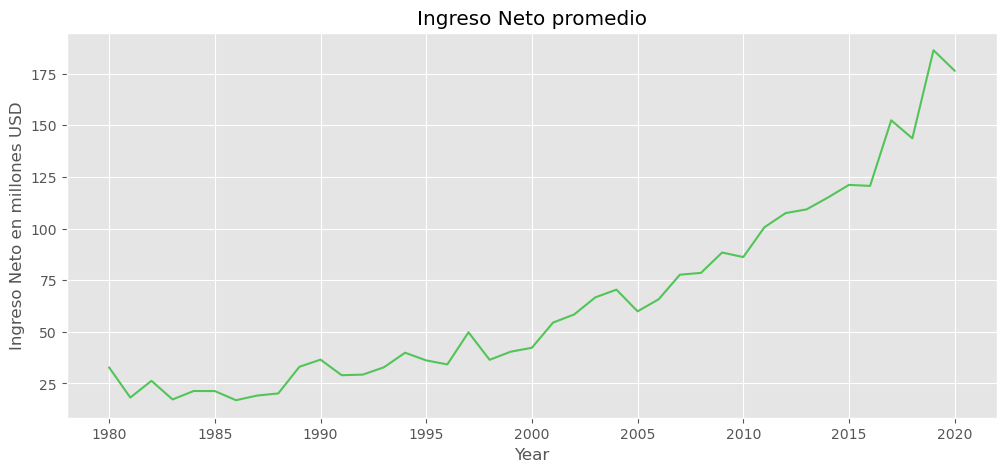

In [44]:
netin_mean_by_year= df.groupby('year')['ingreso_neto'].mean().reset_index()
sns.lineplot(x="year",y="ingreso_neto", data= netin_mean_by_year, color="#52c458")

plt.xlabel("Year")
plt.ylabel("Ingreso Neto en millones USD")
plt.title("Ingreso Neto promedio")
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

A medida que avanzan las décadas, observamos un patrón general de aumento en el ingreso neto promedio de las películas. Este hallazgo se alinea con las observaciones anteriores de crecimiento en el ingreso bruto y el presupuesto, sugiriendo una dinámica en la industria cinematográfica en la que los ingresos han experimentado un incremento sostenido. La relación entre estas variables refuerza la noción de que las películas, en promedio, han tenido un desempeño financiero más robusto con el tiempo, indicando posibles cambios en la preferencia del público, las estrategias de producción y distribución, y la evolución misma de la industria del cine.

##### 2.4.2 Ratio gross/budget

Seguidamente, vamos a crear una nueva columna para añadir más perspectivas a nuestro análisis utilizando "gross" divido entre "budget". Esto nos servirá para analizar cuánto representa el ingreso bruto con respecto al presupuesto para cada película.

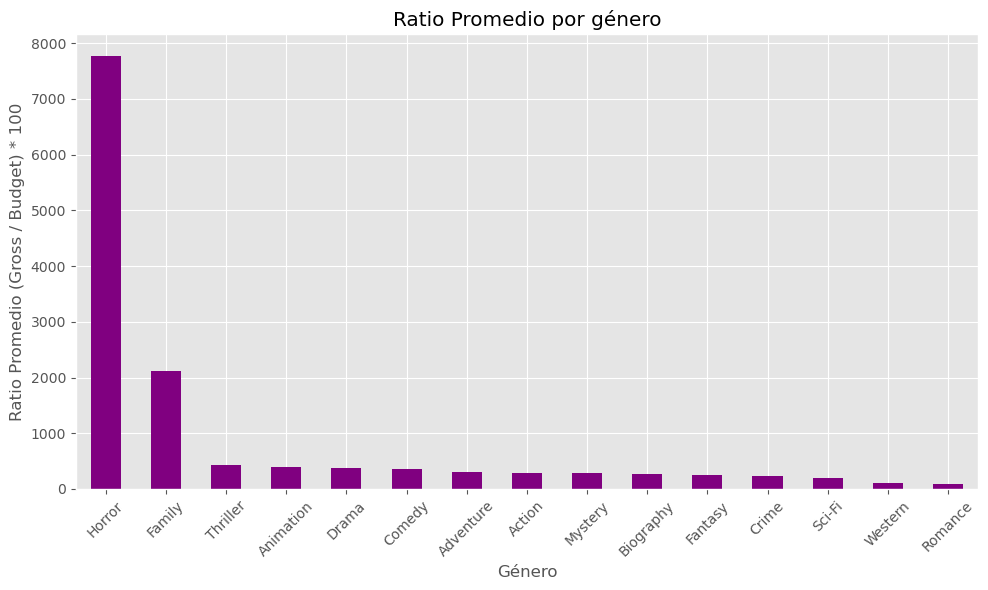

In [45]:
# Calcular la nueva columna "ratio_gross_budget" (gross/budget * 100)
df['ratio_gross_budget'] = (df['gross'] / df['budget']) * 100

# Calcular el ratio promedio por género
average_ratio_by_genre = df.groupby('genre')['ratio_gross_budget'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
average_ratio_by_genre.plot(kind='bar', color="purple")
plt.xlabel('Género')
plt.ylabel('Ratio Promedio (Gross / Budget) * 100')
plt.title('Ratio Promedio por género')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


El indicador 'gross/budget' nos indica la relación de la rentabilidad bruta con diferentes géneros. Notamos que el género 'Horror' destaca con el mayor valor en este indicador, lo que sugiere una eficacia en términos de ingresos brutos sobre el presupuesto en películas de terror. No obstante, es esencial tener en cuenta el número de películas por género para evitar conclusiones precipitadas. A pesar de que los géneros 'Horror' y 'Family' presentan unos indicadores elevados, solo se basan en 251 y 4 películas respectivamente, lo cual puede afectar su representatividad. Al igual que en otros análisis, esta observación subraya la importancia de considerar tanto los datos como el contexto para una comprensión más precisa de las tendencias financieras en la industria cinematográfica.

##### 2.4.3 ROI

De manera similar al punto anterior, crearemos otra nueva columna basándonos en el ingreso neto. En consecuencia, crearemos la columna para  el ROI, rendimiento sobre la inversión. Es importante resaltar que, para este análisis, consideramos que "budget" condensa todos los costos asociados, valor con el que calculamos el ingreso neto anteriormente.

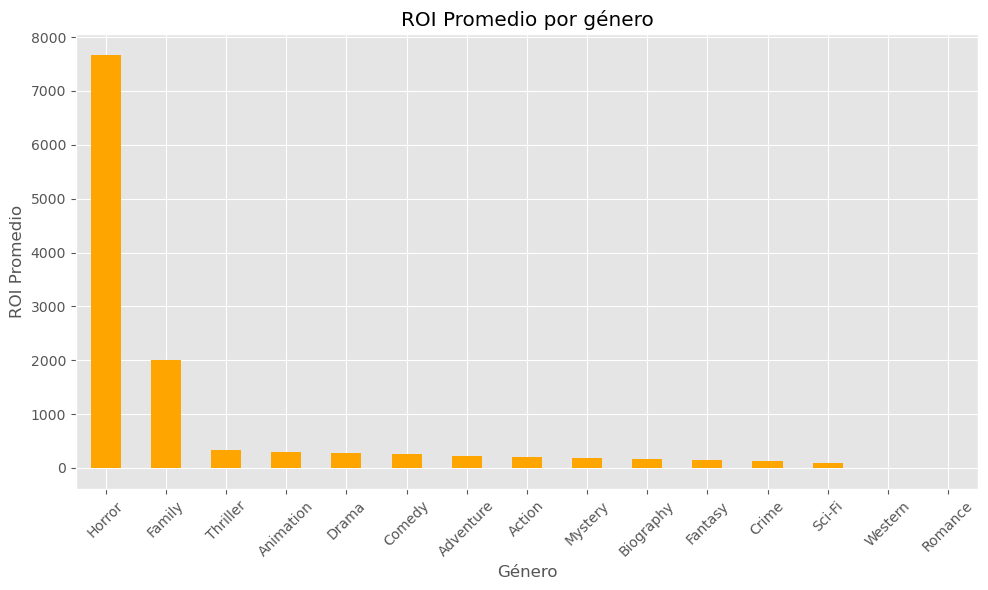

In [46]:


# Calcular la nueva columna "roi" (ingreso_neto / budget * 100)
df['roi'] = (df['ingreso_neto'] / df['budget']) * 100

# Calcular el ROI promedio por género
average_roi_by_genre = df.groupby('genre')['roi'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
average_roi_by_genre.plot(kind='bar', color="orange")
plt.xlabel('Género')
plt.ylabel('ROI Promedio')
plt.title('ROI Promedio por género')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Al igual que con el indicador anterior, el ROI (retorno de la inversión) revela que las películas de 'Horror' y 'Family' lideran en eficiencia financiera, generando ganancias notables en comparación con sus presupuestos. Por otro lado, géneros como 'Western' y 'Romance' presentan resultados desalentadores, pero debido a la escasa representación de películas en estos géneros, es crucial considerar el contexto al interpretar estos datos. Estos hallazgos resaltan la necesidad de analizar el ROI junto con el número de películas para obtener una visión completa de la rentabilidad en la industria cinematográfica.

### 3. Análisis de Categorías 2 

En la sección 3 de nuestro análisis, continuamos explorando la variable categórica 'genre' en relación con métricas clave. Examinamos cómo se relaciona el género con el score promedio, los votos promedio y acumulados y la duración promedio de las películas. Este análisis nos permitirá comprender mejor cómo diferentes géneros influyen en estas importantes medidas de éxito y recepción en la industria cinematográfica.

#### 3.1 Genre vs Score

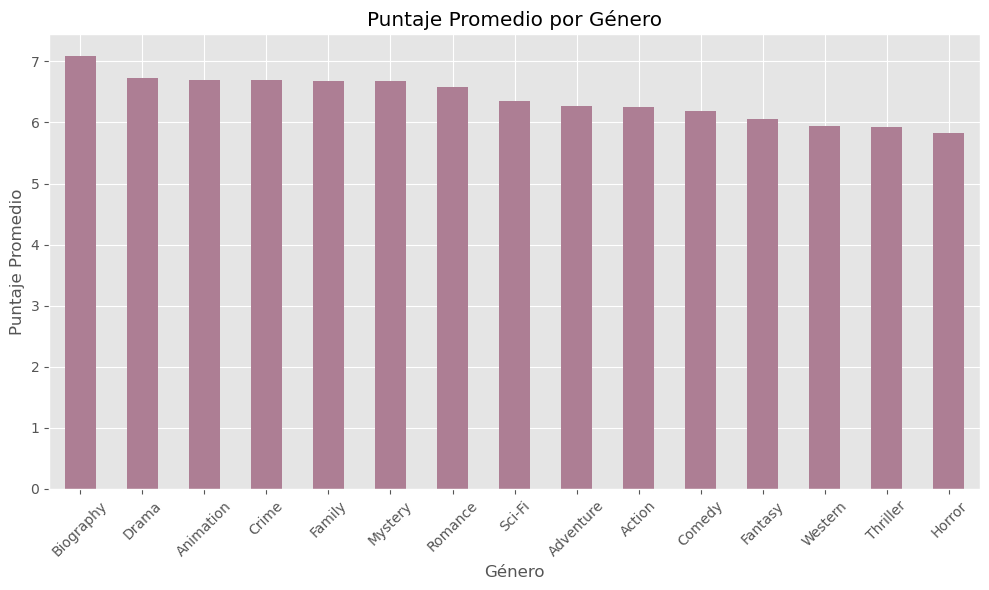

In [47]:
# Calcular el puntaje promedio por género

average_score_by_genre = df.groupby('genre')['score'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
average_score_by_genre.plot(kind='bar', color="#ad7e94")
plt.xlabel('Género')
plt.ylabel('Puntaje Promedio')
plt.title('Puntaje Promedio por Género')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Resulta notable que los géneros de 'Biography' y 'Drama' encabecen la lista con puntajes promedio más altos, posiblemente debido a su enfoque en narrativas emotivas y profundas. Por otro lado, los géneros de 'Horror' y 'Thriller' presentan puntajes ligeramente más bajos, lo que podría estar relacionado con la intensidad y la naturaleza de suspense de sus historias. Es fascinante observar cómo estas puntuaciones se alinean con la preferencia del público.

#### 3.2 Genre vs Votes

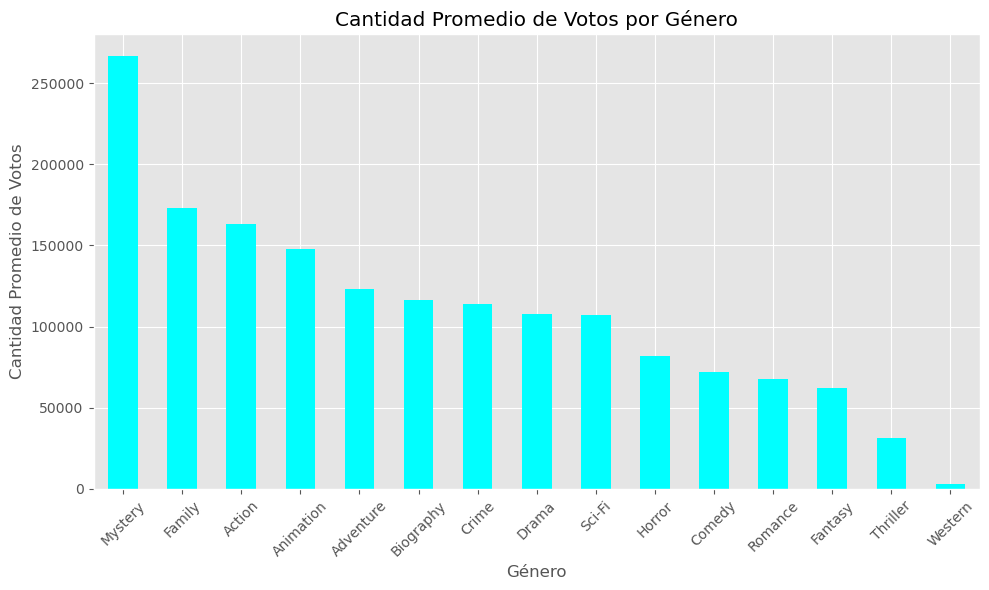

In [48]:
# Calcular la cantidad promedio de votos por género
average_votes_by_genre = df.groupby('genre')['votes'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
average_votes_by_genre.plot(kind='bar', color="cyan")
plt.xlabel('Género')
plt.ylabel('Cantidad Promedio de Votos')
plt.title('Cantidad Promedio de Votos por Género')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [49]:
average_votes_by_genre

genre
Mystery      266647.058824
Family       173225.000000
Action       163347.154770
Animation    147508.743682
Adventure    123237.440367
Biography    116086.041801
Crime        113727.568922
Drama        107510.027810
Sci-Fi       107283.333333
Horror        82038.645418
Comedy        71959.481283
Romance       67720.000000
Fantasy       61951.219512
Thriller      31500.000000
Western        2850.000000
Name: votes, dtype: float64

Es de notar que los géneros de 'Mystery', 'Family' y 'Action' lideran en términos de votos promedio, lo que podría indicar su atractivo general y la capacidad de cautivar a la audiencia. Por otro lado, los géneros de 'Thriller' y 'Western' presentan votos promedio más bajos, lo que sugiere que pueden ser nichos con una base de seguidores más pequeña o que sus historias específicas no logran resonar tan ampliamente(además estos últimos presentan muy pocas observaciones en el data set).

Esta tendencia se relaciona con las puntuaciones promedio y los ingresos brutos, lo que sugiere una correlación entre la aceptación del público y el éxito financiero de las películas. A medida que exploramos los diferentes aspectos de la relación entre género y métricas cinematográficas, nos adentramos en un fascinante análisis de cómo las preferencias del público se reflejan en la recepción y el rendimiento de las películas.



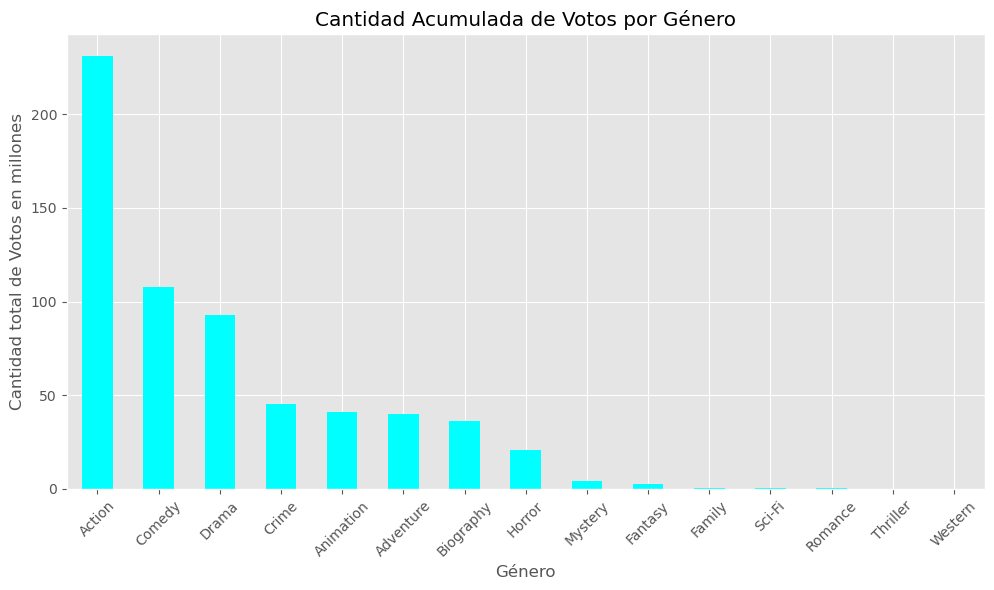

In [50]:
# cantidad  de votos acumulado

sum_votes_by_genre = df.groupby('genre')['votes'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sum_votes_by_genre.plot(kind='bar', color="cyan")
plt.xlabel('Género')
plt.ylabel('Cantidad total de Votos en millones')
plt.title('Cantidad Acumulada de Votos por Género')
plt.xticks(rotation=45)
plt.tight_layout()
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 
plt.gca().yaxis.set_major_formatter(formatter)
# Mostrar el gráfico
plt.show()


In [51]:
sum_votes_by_genre

genre
Action       231136224.0
Comedy       107651384.0
Drama         92781154.0
Crime         45377300.0
Animation     40859922.0
Adventure     40298643.0
Biography     36102759.0
Horror        20591700.0
Mystery        4533000.0
Fantasy        2540000.0
Family          692900.0
Sci-Fi          643700.0
Romance         338600.0
Thriller        220500.0
Western           5700.0
Name: votes, dtype: float64

El análisis de los votos acumulados por género revela una correlación directa con el número de películas en cada género. Géneros populares como 'Action', 'Comedy' y 'Drama' acumulan la mayoría de los votos, lo que podría indicar una mayor interacción de la audiencia con estas categorías. Sin embargo, los géneros con menos representación, como 'Western', tienen una menor acumulación de votos, posiblemente debido al número limitado de películas en ese género. Este patrón refuerza la importancia de considerar tanto la cantidad de películas como la calidad al analizar las preferencias del público en diferentes géneros cinematográficos.

#### 3.3 Genre vs Runtime

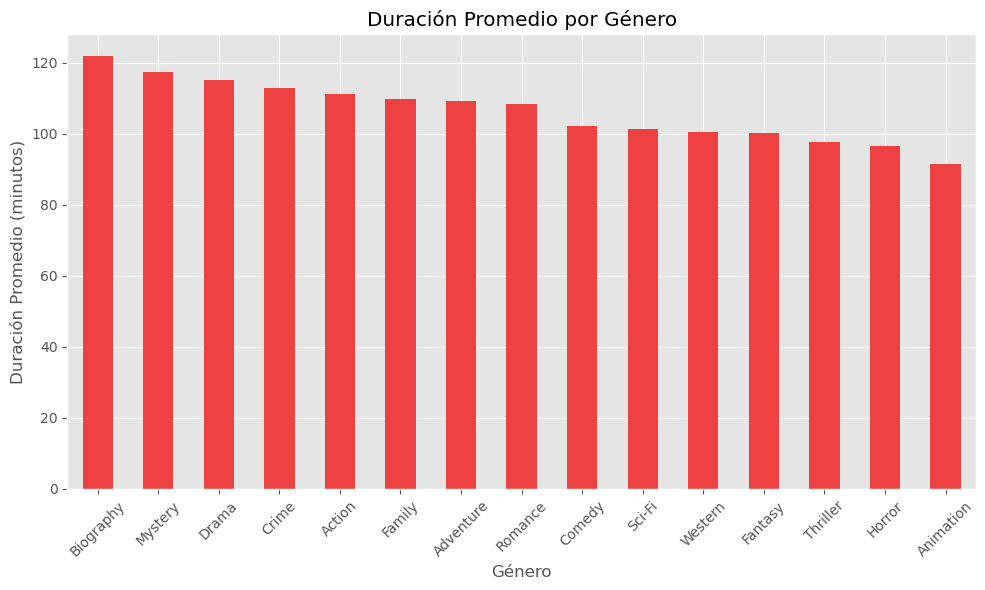

In [52]:
# Calcular el tiempo de duración promedio por género
average_runtime_by_genre = df.groupby('genre')['runtime'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
average_runtime_by_genre.plot(kind='bar', color="#ee4242")
plt.xlabel('Género')
plt.ylabel('Duración Promedio (minutos)')
plt.title('Duración Promedio por Género')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [53]:
average_runtime_by_genre

genre
Biography    121.874598
Mystery      117.235294
Drama        115.117034
Crime        112.969925
Action       111.197880
Family       109.750000
Adventure    109.107034
Romance      108.400000
Comedy       102.108957
Sci-Fi       101.333333
Western      100.500000
Fantasy      100.268293
Thriller      97.714286
Horror        96.617530
Animation     91.570397
Name: runtime, dtype: float64

El análisis de la duración promedio por género nos proporciona una visión interesante sobre las preferencias de los espectadores en relación con la longitud de las películas. Notamos que los géneros como 'Animation', 'Horror' y 'Thriller' tienden a tener duraciones más cortas en promedio, posiblemente para mantener la atención y la emoción. Por otro lado, géneros como 'Biography', 'Mystery' y 'Drama' exhiben duraciones más largas, lo que sugiere un enfoque en la narración profunda y el desarrollo de personajes. Sin embargo, es importante considerar que la duración también puede estar influenciada por la naturaleza del género y la necesidad de equilibrar la historia. Estos hallazgos enfatizan cómo la duración juega un papel significativo en la experiencia cinematográfica y cómo los cineastas adaptan sus enfoques según el género para mantener a la audiencia comprometida.

### 4. Conclusiones I

Estas conclusiones parciales abarcan hasta la sección 3.3

##### Correlaciones:
La columna "budget" tiene una correlación fuerte con "gross" (0.740247). Esto sugiere que hay una relación positiva significativa entre el presupuesto de una película y sus ingresos en taquilla.

La columna "year" tiene una correlación positiva moderada con "budget" (0.327722) y "gross" (0.274321). Esto sugiere que a medida que el año aumenta, es más probable que las películas tengan un mayor presupuesto y recauden más en taquilla.

La columna "score" tiene una correlación positiva moderada con "votes" (0.474256) y "runtime" (0.414068). Esto indica que las películas con una puntuación más alta tienden a tener más votos y una duración más larga.

Parece que la industria de Movies sigue en pie, mostrando atractivos ingresos medios. A su vez, cada día es una industria donde se invierten mayores cantidades de Capital

Podemos decir que si una pelicula tiene gran cantidad de votos, es porque debe ser buena. No necesariamente, ya que hay peliculas con pocos votos y un alto puntaje, pero no hay peliuclas con muchas votos y bajo puntaje

##### Genero, ingreso, presupuesto, ingreso neto. Pareto

Los géneros "Family" y "Animation" tienen los ingresos medios más altos, mientras que "Romance" y "Western" tienen los ingresos más bajos. Además, el género "Action" lidera en términos de ingreso acumulado, indicando su popularidad y rentabilidad en la industria.

El género "Comedy" tiene la mayor cantidad de películas, seguido de "Action" y "Drama". Esto puede indicar la preferencia del público por estos géneros y su mayor producción en la industria. Action y comedy son los que mayor cantidad de votos tienen

El género "Horror" muestra el índice de ingreso/presupuesto más alto, lo que sugiere una alta rentabilidad para las películas de este género en comparación con su presupuesto. Por otro lado, "Romance" y "Western" tienen los índices más bajos, lo que indica que pueden ser menos rentables.

Las películas del género "Biography" tienen la puntuación promedio más alta, seguidas de cerca por "Drama" y "Animation". Esto sugiere que el género "Biography" puede tener una mayor aceptación crítica y audiencia.

El género "Animation" tiene el presupuesto promedio más alto, mientras que "Western" tiene el presupuesto más bajo. Esto sugiere que las películas de animación requieren una mayor inversión para su producción, mientras que las películas del género "Western" pueden tener costos de producción más bajos.

El género "Action" lidera en ingreso neto acumulado, seguido de cerca por "Animation" y "Comedy". Esto indica que las películas de acción son las más rentables, generando mayores ingresos netos en comparación con otros géneros.

--Pareto--
Si a una productora le interesa generar una alta cantidad de retornos, debe lanzar producciones que estén del top 5 de generos de los diagramas de pareto, o al menos, una combinacion de varios géneros.


### 4.1 Conclusiones GPT

"La animación es una apuesta segura": El género de animación muestra tanto un alto ingreso medio por película como un ingreso acumulado significativo. Aunque hay menos películas de animación en comparación con otros géneros, cada película tiene un ingreso promedio sustancialmente alto.

"El crimen es rentable": Aunque el género de crimen no ocupa los primeros lugares en ingreso medio por película, su ingreso acumulado es significativo. Esto puede indicar que las películas de crimen tienen un buen rendimiento en términos de ganancias, a pesar de tener menos películas en comparación con otros géneros populares.

"Las películas de género de drama son más accesibles": A pesar de tener un ingreso medio y acumulado relativamente bajo en comparación con otros géneros, el género de drama muestra una cantidad significativa de películas y un puntaje promedio por género decente. Esto indica que el género de drama puede ser más accesible para los cineastas y tiene un público fiel.



In [54]:
#exportar df a excel como csv

#df.to_csv(r'C:\Users\SANTIAGO FAJARDO\Documents\material de estudio DA-DS\proyectos\Movies\datos_limpioscsv.csv', index=False)

In [55]:
#import pandas as pd

# Supongamos que tienes un DataFrame llamado df después de hacer la limpieza
# Y deseas exportarlo a un archivo Excel llamado "datos_limpios.xlsx"

#df.to_excel(r'C:\Users\SANTIAGO FAJARDO\Documents\material de estudio DA-DS\proyectos\Movies\datos_limpios.xlsx', index=False, engine='openpyxl')


### 5. Próximos pasos
Análisis de categorías: Company, director, star contra gross, budget e ingreso neto.

Análisis de sentimiento de las críticas de películas.

Modelos de predicción para predecir el éxito de una película en función de sus características.

### 6. Análisis de Categorías 3 : Company

En esta siguiente sección, vamos a adentrarnos en el  mundo de las compañías productoras y su relación con los géneros cinematográficos. Analizaremos detalladamente cómo las compañías influyen en los indicadores financieros que ya hemos explorado, como la rentabilidad, la cantidad de votos, la valoración promedio y la duración de las películas. A través de este análisis, buscamos responder a preguntas cruciales sobre cuáles son las compañías más rentables, qué géneros tienden a producir y cuáles son las que lideran en términos de producción y recepción. 

#### 6.1 Empresas más rentables

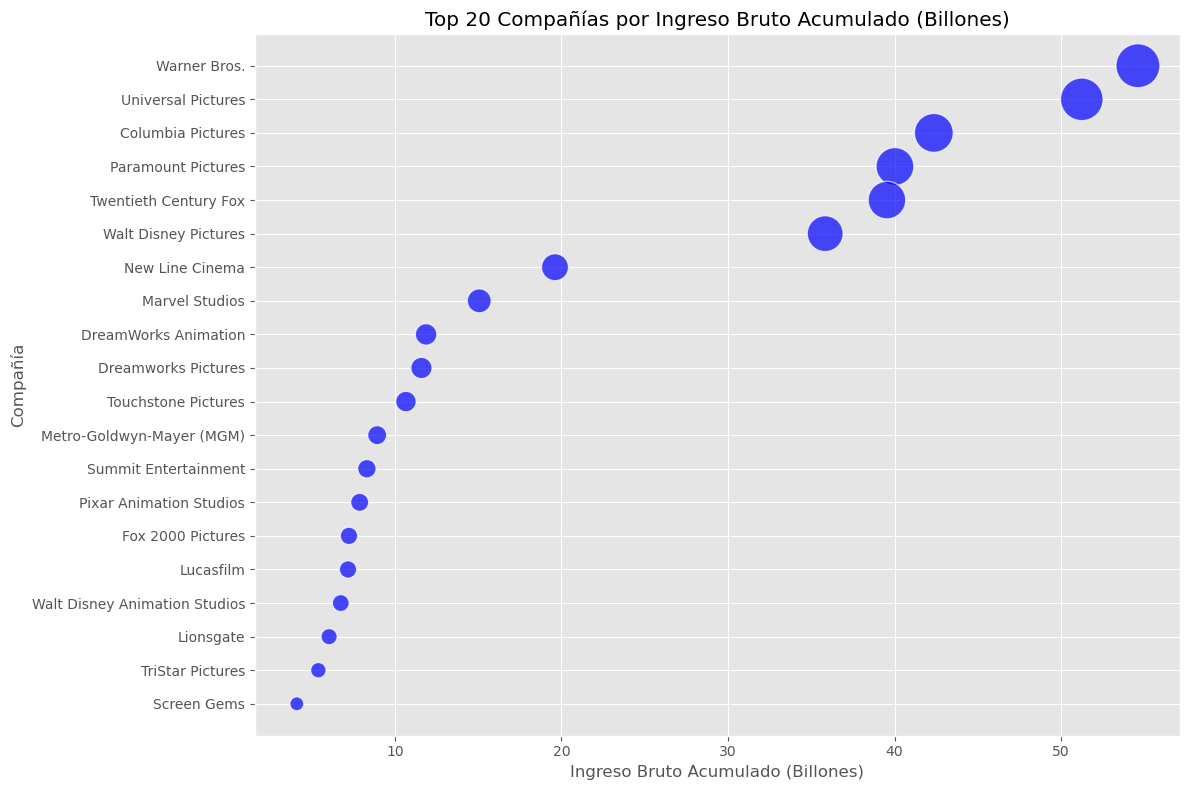

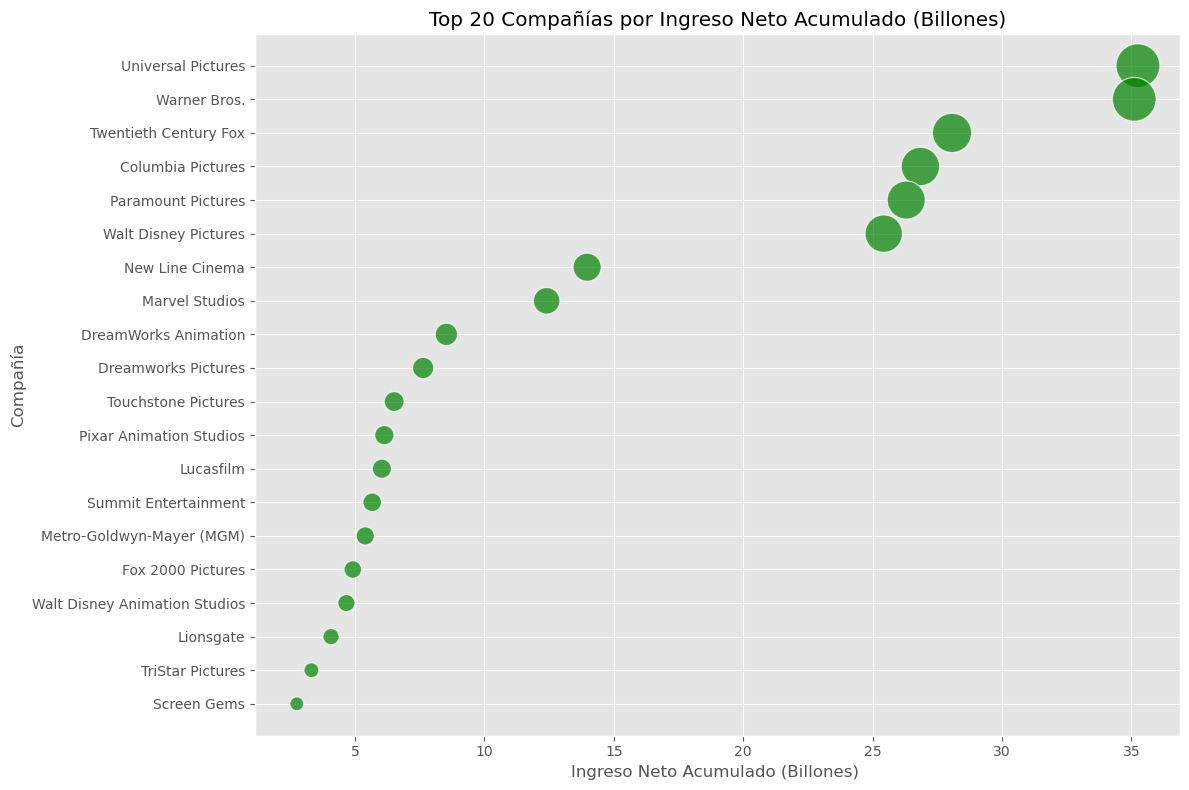

In [56]:
# Graficos de burbujas para las top 20 empresas mas rentables
# hacemos el top20 porque mostrar todas las empresas haría el ilegible el gráfico

# Crear un DataFrame con el ingreso bruto y neto acumulado por compañía
company_data = df.groupby('company')['gross', 'ingreso_neto'].sum().reset_index()

# Obtener las 20 principales compañías por ingreso bruto acumulado
top_20_gross_companies = company_data.nlargest(20, 'gross')

# Obtener las 20 principales compañías por ingreso neto acumulado
top_20_net_companies = company_data.nlargest(20, 'ingreso_neto')

# Crear el gráfico de burbujas para el ingreso bruto acumulado
plt.figure(figsize=(12, 8))
sns.scatterplot(x='gross', y='company', size='gross', data=top_20_gross_companies,
                sizes=(100, 1000), marker='o', color='Blue', alpha=0.7, legend=False)
plt.xlabel('Ingreso Bruto Acumulado (Billones)')
plt.ylabel('Compañía')
plt.title('Top 20 Compañías por Ingreso Bruto Acumulado (Billones)')
plt.tight_layout()
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e9:.0f}") 

plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

# Crear el gráfico de burbujas para el ingreso neto acumulado
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ingreso_neto', y='company', size='ingreso_neto', data=top_20_net_companies,
                sizes=(100, 1000), marker='o', color='Green', alpha=0.7, legend=False)  # Cambiar a la paleta 'Blues'
plt.xlabel('Ingreso Neto Acumulado (Billones) ')
plt.ylabel('Compañía')
plt.title('Top 20 Compañías por Ingreso Neto Acumulado (Billones)')
plt.tight_layout()
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e9:.0f}") 

plt.gca().xaxis.set_major_formatter(formatter)
plt.show()



En los gráficos de burbujas que representan el top 20 de empresas según ingreso bruto y neto, Universal Pictures y Warner Bros encabezan ambas listas, evidenciando su poderío en términos financieros. Notablemente, algunas empresas como Columbia Pictures y Twentieth Century Fox logran altos ingresos brutos, pero su ingreso neto puede variar, lo que sugiere diferencias en los costos operativos. 

Es interesante observar que empresas orientadas a la animación, como DreamWorks Animation y Pixar Animation Studios, también figuran en este top, indicando el impacto de películas animadas en la recaudación. Además, compañías como Marvel Studios y Lucasfilm destacan por un alto ingreso neto en comparación con su ingreso bruto, subrayando su eficiencia en la gestión financiera.

Estos patrones ilustran la dinámica financiera y estratégica en la industria del cine, donde factores como género, tipo de producción y administración juegan un papel clave en el éxito económico de las empresas.

#### 6.2 Los Géneros que las empresas más rentables producen

<Figure size 1200x2000 with 0 Axes>

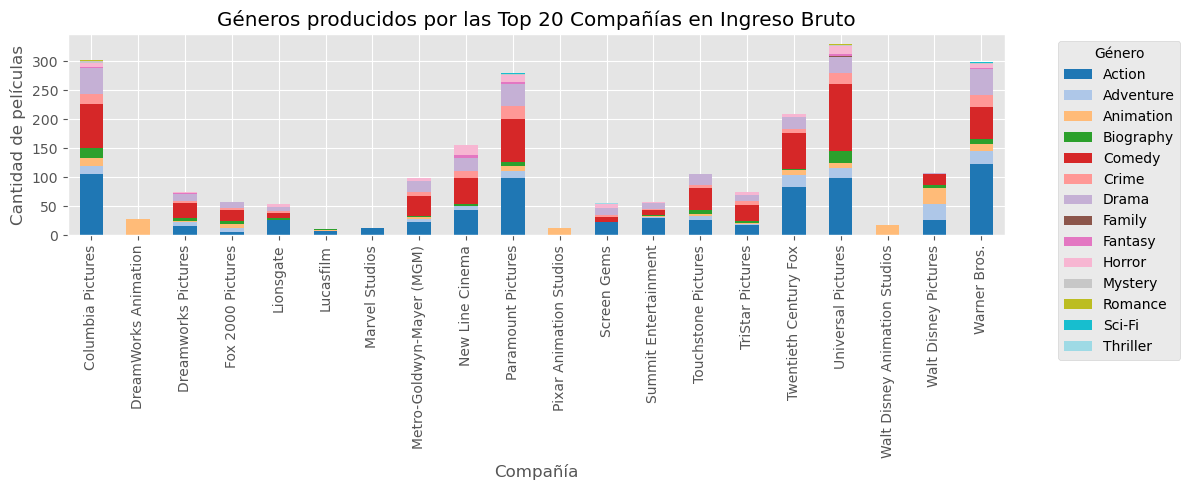

<Figure size 1200x1200 with 0 Axes>

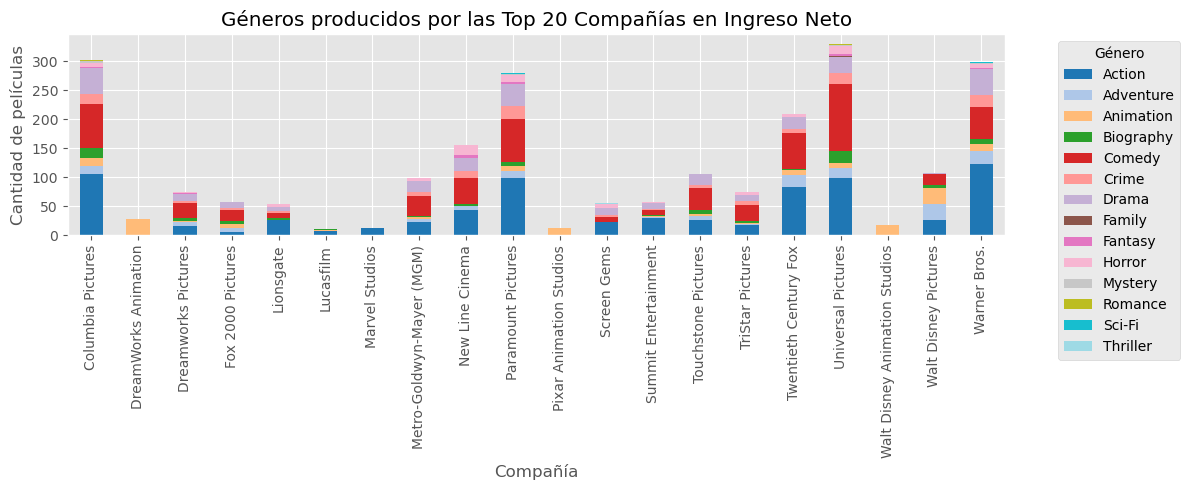

In [57]:
# Los generos que las empresas top producen

# Obtener los géneros producidos por las top 20 compañías en ingreso bruto
top_20_gross_genres = df[df['company'].isin(top_20_gross_companies['company'])].groupby(['company', 'genre']).size().unstack(fill_value=0)

# Obtener los géneros producidos por las top 20 compañías en ingreso neto
top_20_net_genres = df[df['company'].isin(top_20_net_companies['company'])].groupby(['company', 'genre']).size().unstack(fill_value=0)

# Crear el gráfico de barras apilados para las top 20 compañías en ingreso bruto
plt.figure(figsize=(12, 20))
top_20_gross_genres.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('Compañía')
plt.ylabel('Cantidad de películas')
plt.title('Géneros producidos por las Top 20 Compañías en Ingreso Bruto')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Crear el gráfico de barras apilados para las top 20 compañías en ingreso neto
plt.figure(figsize=(12, 12))
top_20_net_genres.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('Compañía')
plt.ylabel('Cantidad de películas')
plt.title('Géneros producidos por las Top 20 Compañías en Ingreso Neto')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


Estos gráficos nos facilitan descubrir cómo ciertas empresas se acogen a determinados géneros, vemos cómo la industría del cine tiene su segmentación establecida.

Paramount Pictures y Warner Bro, dos líderes en ingresos brutos y netos, adoptan enfoques diversos en cuanto a la variedad de géneros. Columbia Pictures se destaca en acción y comedia, géneros que a menudo tienen un buen desempeño en taquilla. Por otra parte, DreamWorks Animation se concentra en la animación.

Mientras tanto, compañías como Marvel Studios y Pixar Animation Studios, con altos ingresos netos, se especializan en géneros específicos. Marvel Studios se destaca en acción, mientras que Pixar Animation Studios brilla en animación. Es notable la prominencia de películas de drama entre las empresas rentables, ya que este género suele resonar con la audiencia, influyendo potencialmente en la recaudación.


In [58]:
# Rutas de destino para los archivos CSV
#ruta_csv_gross = r'C:\Users\SANTIAGO FAJARDO\Documents\material de estudio DA-DS\proyectos\Movies\asd\top_20_gross_genres.csv'
#ruta_csv_net = r'C:\Users\SANTIAGO FAJARDO\Documents\material de estudio DA-DS\proyectos\Movies\asd\ttop_20_net_genres.csv'

# Convertir los DataFrames a formato CSV y guardarlos en las rutas especificadas
#top_20_gross_genres.to_csv(ruta_csv_gross, index=True)  # El parámetro index=True guarda los índices en el archivo
#top_20_net_genres.to_csv(ruta_csv_net, index=True)

# esto solo lo hice para apreciar mejor los datos en excel

#### 6.3 Empresas con mayor cantidad de votos (Acumulados y Promedio)

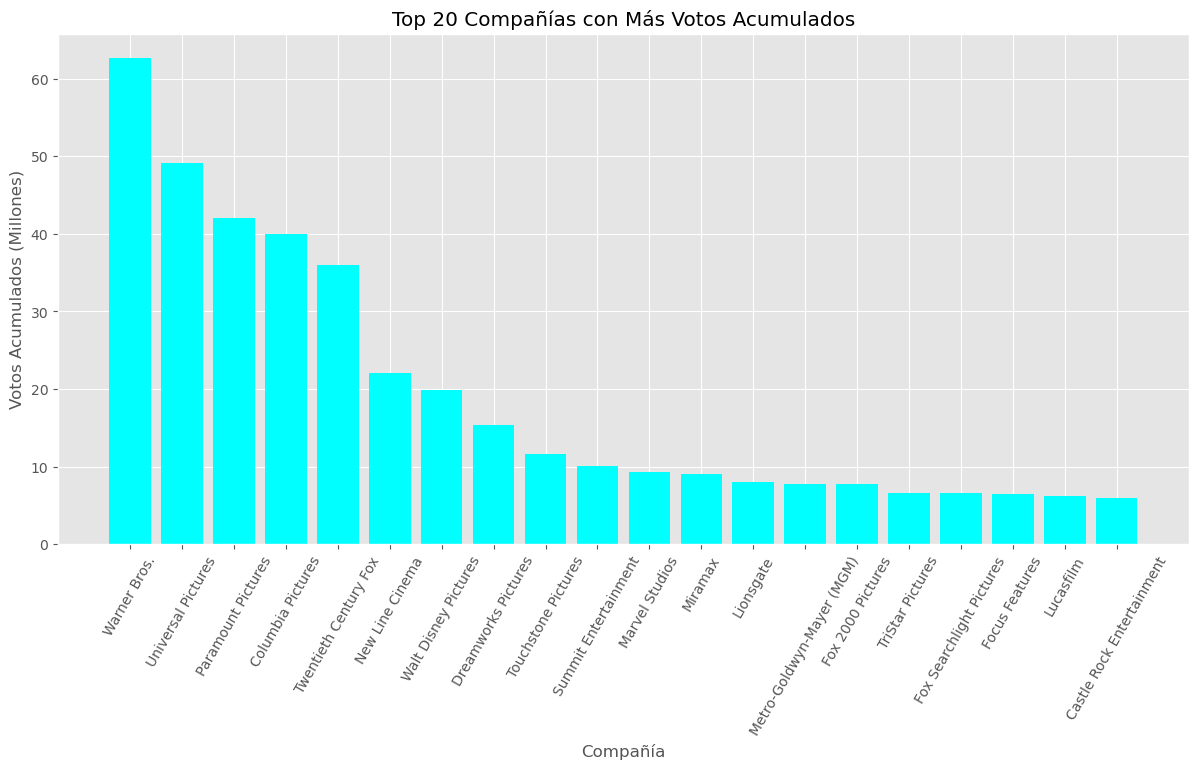

In [59]:
# top 20 Companies con mayor cantidad de votos 


# Agrupar los datos por compañía y calcula la suma de votos acumulados
company_votos_acumulados = df.groupby('company')['votes'].sum().reset_index()

# Ordenar las compañías por los votos acumulados y selecciona las 20 primeras
top_20_companies_votos = company_votos_acumulados.nlargest(20, 'votes')

# Crea el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_companies_votos['company'], top_20_companies_votos['votes'], color='cyan')
plt.xlabel('Compañía')
plt.ylabel('Votos Acumulados (Millones)')
plt.title('Top 20 Compañías con Más Votos Acumulados')
plt.xticks(rotation=90)
plt.tight_layout()
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 

plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=60)
plt.show()


Warner Bros. y Universal Pictures encabezan la lista en términos de votos acumulados, lo que sugiere una base sólida de seguidores y admiradores de sus producciones. Este éxito podría estar relacionado con su habilidad para atraer a la audiencia a través de una variedad de géneros y temas.

Paramount Pictures y Columbia Pictures, dos gigantes del entretenimiento, también presentan un impresionante acumulado de votos. Esta relación entre votos y éxito financiero refleja la importancia de construir una conexión sólida con la audiencia, lo que puede traducirse en un aumento en la participación en taquilla y en el mercado.

Es interesante notar que empresas como Dreamworks Pictures y Touchstone Pictures, con menor presencia en términos de ingresos brutos, aún logran acumular una cantidad significativa de votos. Esto podría indicar que estas empresas tienen una base de fanáticos leales y que su enfoque en ciertos géneros o temáticas resuena con la audiencia, incluso si no están generando los mayores ingresos.

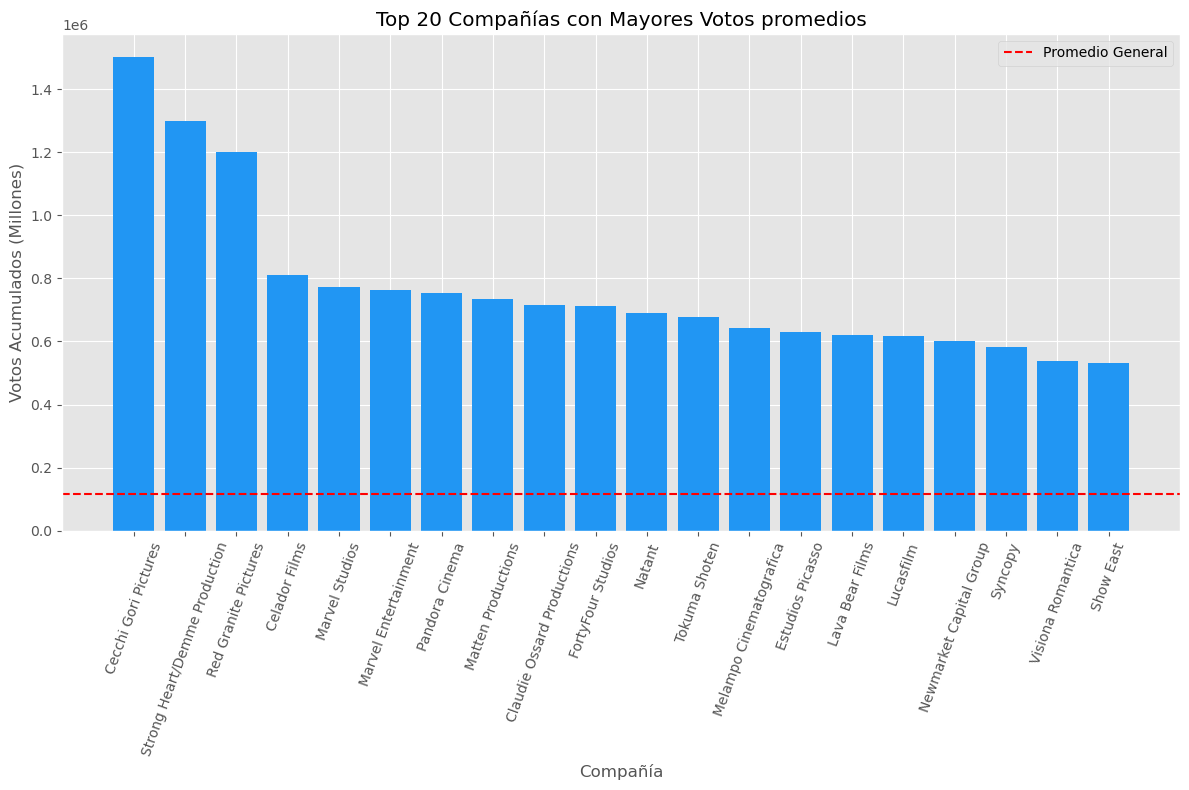

In [60]:
# ahora las companies con mayores votos promedio


# Agrupar los datos por compañía y calcula la suma de votos acumulados
company_votos_prom = df.groupby('company')['votes'].mean().reset_index()

# Ordenar las compañías por los votos acumulados y selecciona las 20 primeras
top_20_companies_votos_prom = company_votos_prom.nlargest(20, 'votes')

#promedio de votos en general
votos_prom = df['votes'].mean()


# Crea el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_companies_votos_prom['company'], top_20_companies_votos_prom['votes'], color='#2196f3')
plt.axhline(y=votos_prom, color='red', linestyle='--', label='Promedio General')
plt.xlabel('Compañía')
plt.ylabel('Votos Acumulados (Millones)')
plt.title('Top 20 Compañías con Mayores Votos promedios')
plt.xticks(rotation=70)
plt.tight_layout()

# Muestra el gráfico
plt.legend()
plt.show()







Al observar los votos promedio por empresa, notamos que algunas compañías como Cecchi Gori Pictures, Strong Heart/Demme Production y Red Granite Pictures obtienen altos votos promedio por película. Sin embargo, es importante tener en cuenta que estas posiciones pueden estar sesgadas debido a un número limitado de películas producidas por estas compañías.

Marvel Studios y Marvel Entertainment también se destacan en esta categoría, lo que sugiere que su dedicación a la creación de narrativas atractivas y personajes icónicos se refleja en una alta votación promedio por película.

Por otro lado, empresas como Lucasfilm, conocida por la franquicia de Star Wars, también muestran una sólida votación promedio por película. Esto sugiere que las películas que abarcan sagas o universos expandidos tienen la capacidad de mantener el interés y la conexión con la audiencia en el transcurso de múltiples entregas.

#### 6.4 Empresas con mejor valoración promedio (Score)

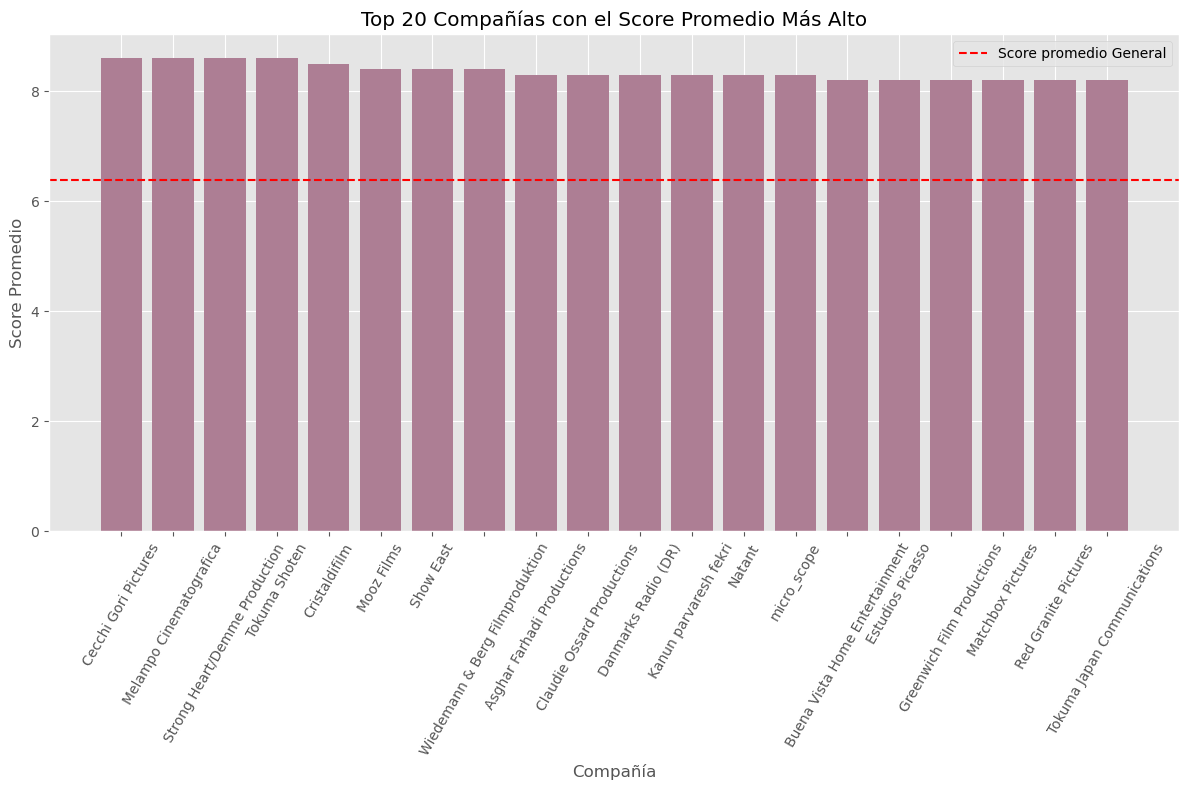

In [61]:
#20 principales compañías con el score promedio más alto

# Agrupa los datos por compañía y calcula el promedio del score
company_score_promedio = df.groupby('company')['score'].mean().reset_index()

# Ordena las compañías por el score promedio y selecciona las 20 primeras
top_20_companies_score = company_score_promedio.nlargest(20, 'score')

#score promedio
score_prom= df['score'].mean()

# Crea el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_companies_score['company'], top_20_companies_score['score'], color='#ad7e94')
plt.axhline(y=score_prom, color='red', linestyle='--', label='Score promedio General')
plt.xlabel('Compañía')
plt.ylabel('Score Promedio')
plt.title('Top 20 Compañías con el Score Promedio Más Alto')
plt.xticks(rotation=60)
plt.tight_layout()

plt.legend()
plt.show()



En el análisis de las empresas con la mejor valoración promedio (score), encontramos nombres como Cecchi Gori Pictures, Melampo Cinematografica, Strong Heart/Demme Production y Tokuma Shoten, todas con una destacada puntuación de 8.6. Sin embargo, debemos tener en cuenta que algunas de estas empresas pueden tener un número limitado de películas, lo que podría influir en su alta calificación promedio.

#### 6.5 Empresas con Producciones cinematográficas más largas (en términos promedio)

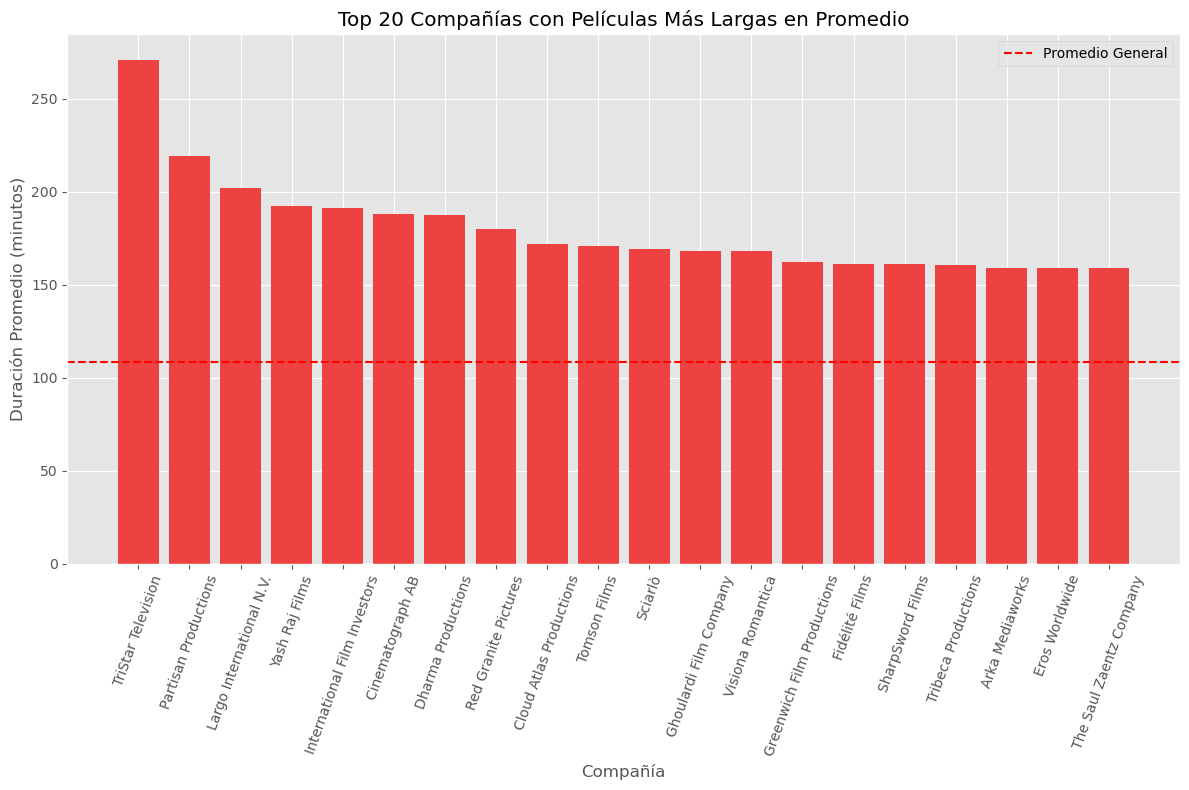

In [62]:
# hay companies que hacen peliculas mas largas en promedio?


# Agrupar los datos por compañía y calcula el promedio de la duración de las películas (runtime)
company_runtime_promedio = df.groupby('company')['runtime'].mean().reset_index()

# Ordenar las compañías por la duración promedio y selecciona las 20 primeras
top_20_companies_runtime = company_runtime_promedio.nlargest(20, 'runtime')
# promedio general:
promedio_runtime_general = df['runtime'].mean()


# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_companies_runtime['company'], top_20_companies_runtime['runtime'], color='#ee4242')
plt.axhline(y=promedio_runtime_general, color='red', linestyle='--', label='Promedio General')
plt.xlabel('Compañía')
plt.ylabel('Duración Promedio (minutos)')
plt.title('Top 20 Compañías con Películas Más Largas en Promedio')
plt.xticks(rotation=70)
plt.tight_layout()



plt.legend()

plt.show()




In [63]:
df['runtime'].mean()

108.15273934698395

Es importante destacar que el promedio general de duración de las películas en todo el dataset es de 108 minutos. En este contexto, al analizar las empresas con producciones cinematográficas más largas en términos promedio, encontramos nombres como TriStar Television, Partisan Productions y Largo International N.V. liderando la lista con duraciones notables. Este hallazgo nos permite identificar a aquellas empresas que tienden a explorar narrativas más extensas o géneros que demandan una mayor duración para su desarrollo completo. Es interesante observar que algunas compañías, como Red Granite Pictures, Dharma Productions y Yash Raj Films, también se destacan en esta categoría.

#### 6.6 Empresas con mayor cantidad de películas producidas

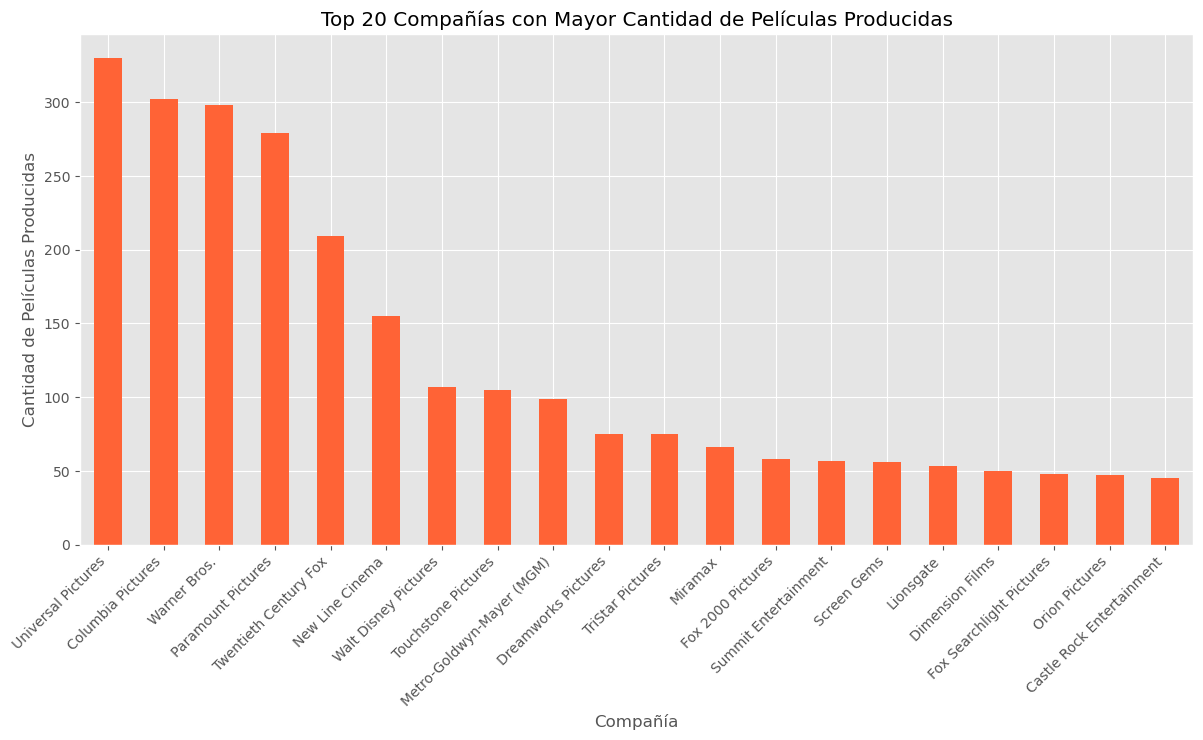

In [64]:
# graf para las top companies con mayor cantidad de producciones

# Obtener la cantidad de películas producidas por cada compañía
movies_per_company = df['company'].value_counts()

# Obtener las top 20 compañías con mayor cantidad de películas producidas
top_20_movie_companies = movies_per_company.nlargest(20)

# Crear el gráfico de barras para las top 20 compañías con mayor cantidad de películas
plt.figure(figsize=(12, 8))
top_20_movie_companies.plot(kind='bar', color='#ff6336')
plt.xlabel('Compañía')
plt.ylabel('Cantidad de Películas Producidas')
plt.title('Top 20 Compañías con Mayor Cantidad de Películas Producidas')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


Al examinar las empresas con la mayor cantidad de películas producidas, destacan nombres familiares como Universal Pictures, Columbia Pictures, Warner Bros. y Paramount Pictures. Estas compañías han demostrado su compromiso con la producción cinematográfica a gran escala. Es interesante notar que algunas de estas empresas también han aparecido en nuestras anteriores secciones, particularmente en términos de ingresos netos y valoraciones promedio. Universal Pictures y Warner Bros, por ejemplo, figuran tanto entre las compañías más prolíficas como entre las más rentables en términos de ingresos netos.

Además, al observar la cantidad de votos acumulados y las valoraciones promedio, es posible que estas compañías hayan logrado mantener un equilibrio entre la cantidad de películas producidas y su calidad, lo que podría haber contribuido a su éxito a largo plazo en la industria cinematográfica. 

### 7. Análisis de Categorías 4 : Director

Siguiendo la línea de enfoque que hemos empleado previamente, examinaremos a los directores que se destacan en diferentes aspectos clave de la industria cinematográfica. Exploraremos quiénes son los directores con los mejores indicadores financieros, aquellos con mayor cantidad de producciones, los más valorados por la audiencia y los que tienen películas más extensas en términos de duración.

####  7.1 Directores más rentables (términos acumulados y promedio)

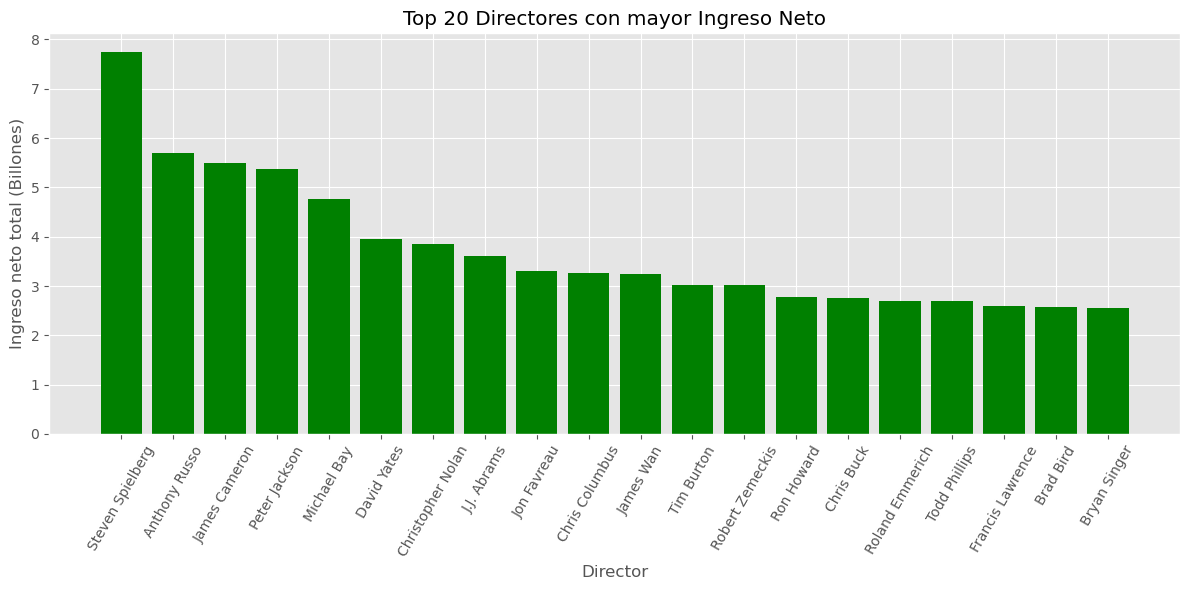

In [65]:

#  top 20 directores más rentables 

# Agrupa los datos por director y calcula la suma del ingreso neto
directores_ingreso_neto = df.groupby('director')['ingreso_neto'].sum().reset_index()

# Ordena los directores por su ingreso neto total y selecciona los 20 primeros
top_20_directores = directores_ingreso_neto.sort_values('ingreso_neto', ascending=False).head(20)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20_directores['director'], top_20_directores['ingreso_neto'], color='green')
plt.xlabel('Director')
plt.ylabel('Ingreso neto total (Billones)')
plt.title('Top 20 Directores con mayor Ingreso Neto')
plt.xticks(rotation=60)
plt.tight_layout()
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e9:.0f}") 

plt.gca().yaxis.set_major_formatter(formatter)
# Muestra el gráfico
plt.show()


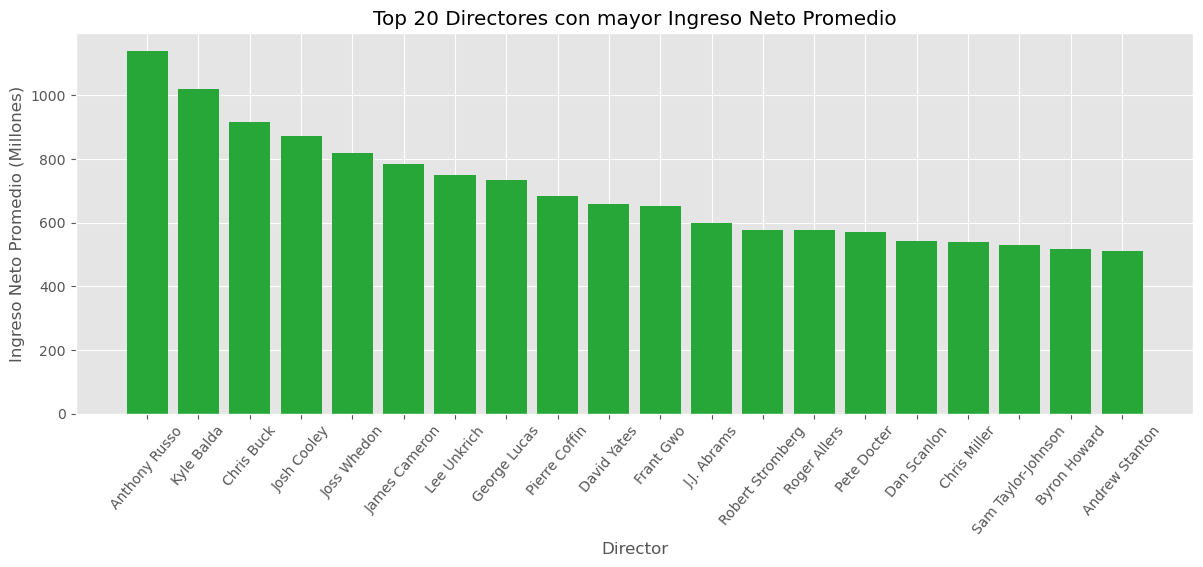

In [66]:
#top 20 directores con mayor ingreso neto Promedio

# Agrupa los datos por director y calcula la suma del ingreso neto PROMEIDO
directores_ingreso_neto_prom = df.groupby('director')['ingreso_neto'].mean().reset_index()

# Ordena los directores por su ingreso neto total y selecciona los 20 primeros
top_20_directores_prom = directores_ingreso_neto_prom.sort_values('ingreso_neto', ascending=False).head(20)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20_directores_prom['director'], top_20_directores_prom['ingreso_neto'], color='#28a739')
plt.xlabel('Director')
plt.ylabel('Ingreso Neto Promedio (Millones)')
plt.title('Top 20 Directores con mayor Ingreso Neto Promedio')
plt.xticks(rotation=90)
plt.tight_layout()
formatter = ticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}") 

plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=50)
plt.show()





En el análisis de los directores más rentables, se destacan nombres que han dejado una huella significativa en la industria cinematográfica. En términos acumulados de ingreso neto, figuras como Steven Spielberg, Anthony Russo, James Cameron y Peter Jackson lideran el camino. Estos directores han logrado consolidar un éxito financiero  a lo largo de sus carreras. 


Por otro lado, al considerar el promedio de ingreso neto, es interesante notar que directores como Anthony Russo, James Cameron y Chris Buck siguen siendo influyentes, lo que sugiere que han demostrado una consistencia en la creación de películas exitosas.

#### 7.2 Directores con mejores indices promedios de ROI

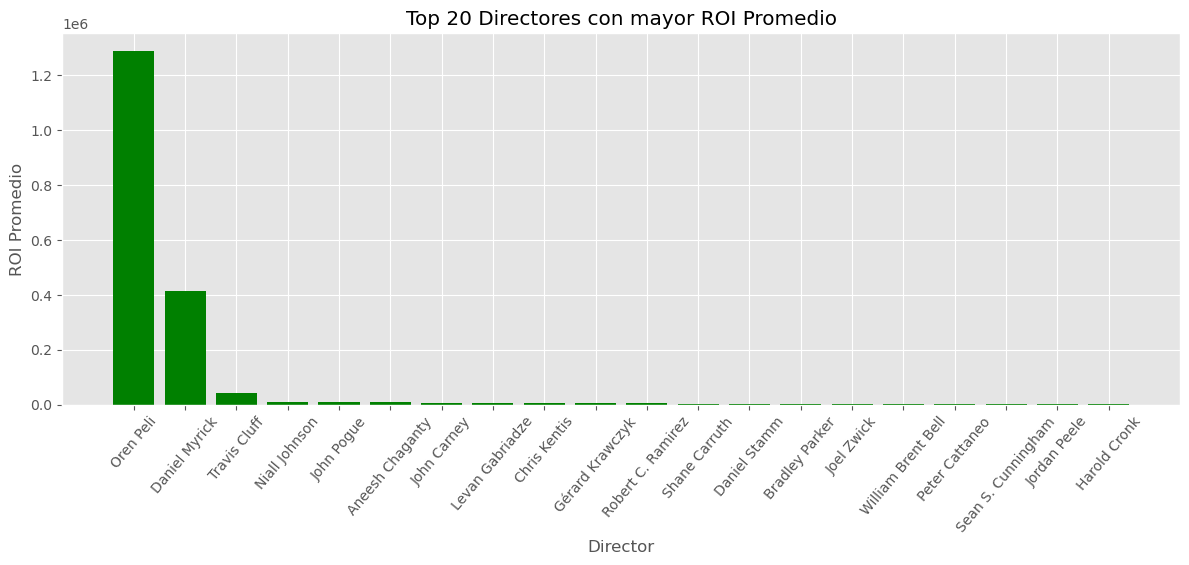

In [67]:
#  top 20 directores más rentables segun el ROI


# Agrupa los datos por director y calcula el promedio del ROI
directores_roi_promedio = df.groupby('director')['roi'].mean().reset_index()

# Ordena los directores por su ROI promedio y selecciona los 20 primeros
top_20_directores_roi = directores_roi_promedio.sort_values('roi', ascending=False).head(20)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20_directores_roi['director'], top_20_directores_roi['roi'], color='green')
plt.xlabel('Director')
plt.ylabel('ROI Promedio')
plt.title('Top 20 Directores con mayor ROI Promedio')
plt.xticks(rotation=90)
plt.tight_layout()

plt.xticks(rotation=50)
plt.show()



En el análisis de los directores con mejores índices promedios de Retorno de Inversión (ROI), se observan nombres que han logrado obtener altos rendimientos financieros en relación con los presupuestos de producción de sus películas. Destaca Oren Peli, cuyo impresionante ROI resalta su habilidad para crear películas de bajo presupuesto que han tenido un gran impacto en taquilla. También se encuentran nombres como Jordan Peele y Aneesh Chaganty, quienes han demostrado ser talentosos en maximizar el valor financiero de sus proyectos. Estos resultados sugieren que la creatividad y la capacidad de contar historias impactantes pueden llevar a un ROI significativo, independientemente del presupuesto. 

#### 7.3 Directores con mayor número de películas dirigidas 

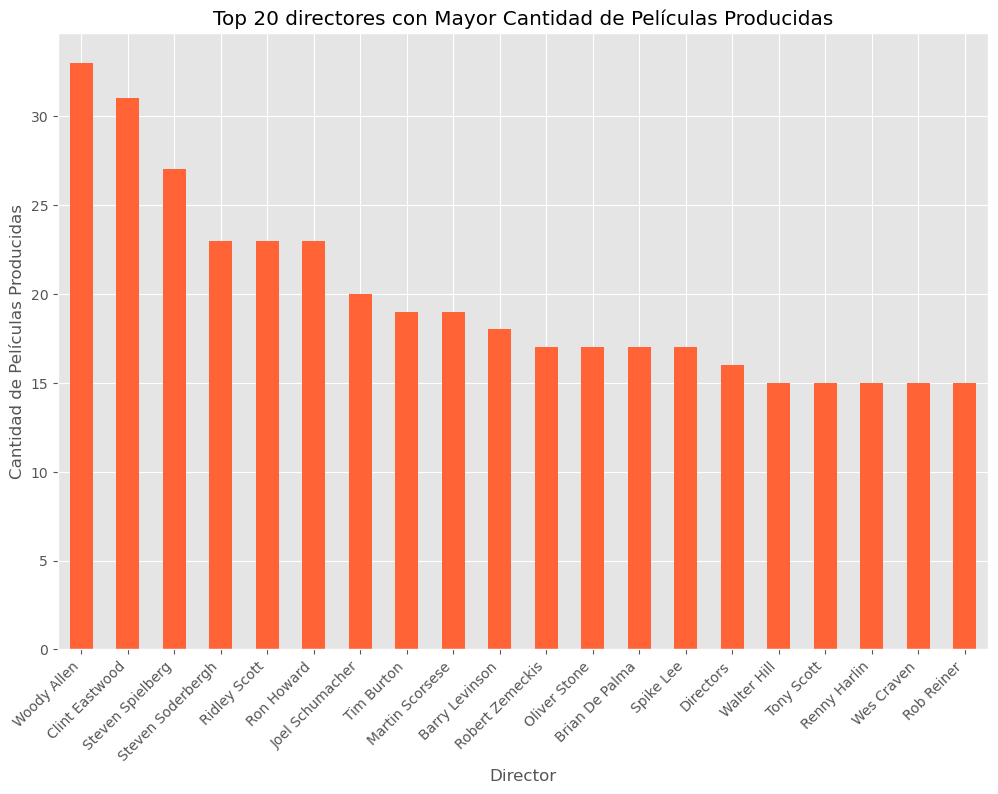

In [68]:
# Directores con mayores producciones realizadas


# Obtener la cantidad de películas producidas por cada compañía
movies_per_director = df['director'].value_counts()

# Obtener los top 20 directores con mayor cantidad de películas producidas
top_20_movie_director = movies_per_director.nlargest(20)

# Crear el gráfico de barras para los top 20 directores con mayor cantidad de películas
plt.figure(figsize=(12, 8))
top_20_movie_director.plot(kind='bar', color='#ff6336')
plt.xlabel('Director')
plt.ylabel('Cantidad de Películas Producidas')
plt.title('Top 20 directores con Mayor Cantidad de Películas Producidas')

plt.xticks(rotation=45, ha='right')
plt.show()

El análisis de los directores con mayor número de películas dirigidas revela una combinación de veteranos y nombres influyentes en la industria del cine. Woody Allen, Clint Eastwood y Steven Spielberg lideran la lista con una notable cantidad de películas en sus carreras. Esta tendencia puede indicar una dedicación continua a la creación cinematográfica y una amplia experiencia  y variedad de géneros en la dirección.

#### 7.4 Directores con mejores valoraciones promedio (score)

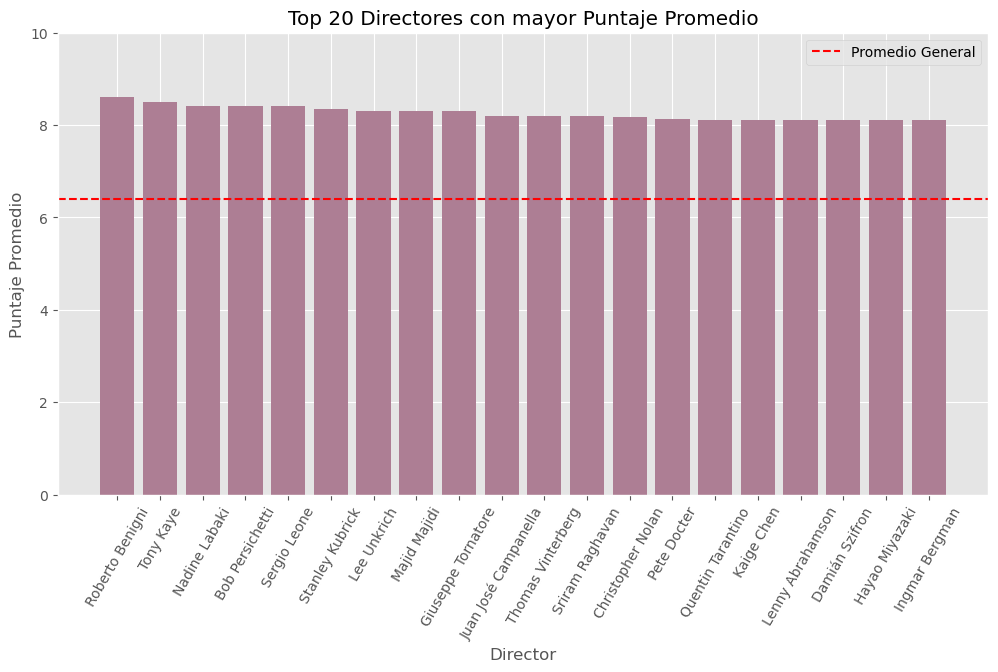

In [69]:
# Ahora veamos los principales directores con valoraciones mas altas en promedio


# Agrupa los datos por director y calcula el promedio del score
directores_score_promedio = df.groupby('director')['score'].mean().reset_index()

# Ordena los directores por su score promedio y selecciona los 20 primeros
top_20_directores_score = directores_score_promedio.sort_values('score', ascending=False).head(20)

#prmedio score
promedio_score_dir= df['score'].mean()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20_directores_score['director'], top_20_directores_score['score'], color='#ad7e94')
plt.axhline(y=promedio_score_dir, color='red', linestyle='--', label='Promedio General')

plt.xlabel('Director')
plt.ylabel('Puntaje Promedio')
plt.title('Top 20 Directores con mayor Puntaje Promedio')
plt.xticks(rotation=90)
plt.ylim(0, 10) 

plt.legend()
plt.xticks(rotation=60)
plt.show()


In [70]:
df['score'].mean()

6.392455266555986

Con un promedio general de score en el dataset de aproximadamente 6.39, los directores destacados en esta lista sobresalen con calificaciones significativamente superiores. Entre los nombres reconocidos se encuentran cineastas aclamados como Stanley Kubrick, Quentin Tarantino y Christopher Nolan, cuyas películas han sido elogiadas tanto por críticos como por audiencias, superando notablemente la puntuación promedio. Esta diferencia en las calificaciones sugiere que sus obras tienen un impacto más profundo y resuenan de manera excepcional con el público. 

Curiosamente, esta lista también presenta una interesante intersección con el análisis previo de indicadores financieros, donde directores exitosos en términos de ingresos netos también obtienen altas valoraciones. Esto subraya la importancia de mantener un equilibrio entre la creatividad artística y el éxito comercial. Además, la presencia de directores internacionales como Hayao Miyazaki e Ingmar Bergman en la lista resalta que la excelencia no conoce fronteras geográficas.

Estos hallazgos sugieren que la calidad cinematográfica, medida por las valoraciones promedio, puede ser un componente clave para el éxito financiero sostenido. Este aspecto, junto con la variabilidad en géneros y estilos de los directores destacados, enfatiza la diversidad y riqueza de la industria cinematográfica. En última instancia, este análisis destaca la importancia de crear películas que no solo sean económicamente exitosas, sino que también generen una conexión profunda y duradera con el público, como lo demuestran las calificaciones sobresalientes de estos directores.

#### 7.5 Directores más votados, en términos acumulados y promedio

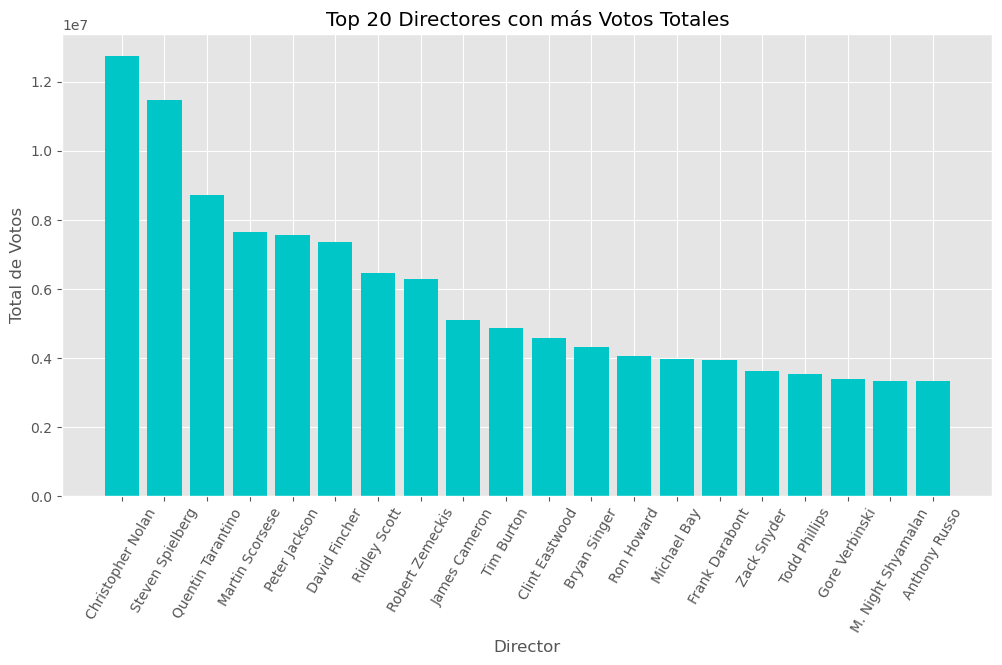

In [71]:
# top directores segun los votos acumulados 


# Agrupa los datos por director y calcula la suma de votos
directores_votos_total = df.groupby('director')['votes'].sum().reset_index()

# Ordena los directores por la cantidad total de votos y selecciona los 20 primeros
top_20_directores_votos_total = directores_votos_total.sort_values('votes', ascending=False).head(20)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20_directores_votos_total['director'], top_20_directores_votos_total['votes'], color='#00c6c7')
plt.xlabel('Director')
plt.ylabel('Total de Votos')
plt.title('Top 20 Directores con más Votos Totales')
plt.xticks(rotation=60)


# Muestra el gráfico
plt.show()



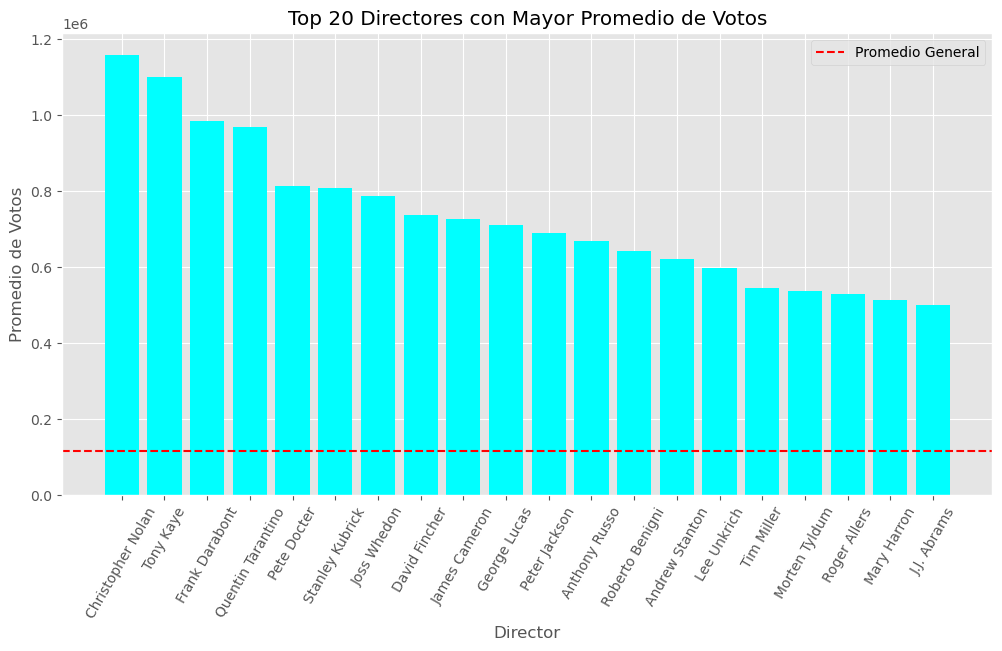

In [72]:
# top directores segun los votos promedio

# Agrupa los datos por director y calcula el promedio de votos
directores_votos_promedio = df.groupby('director')['votes'].mean().reset_index()

# Ordena los directores por el promedio de votos y selecciona los 20 primeros
top_20_directores_votos_promedio = directores_votos_promedio.sort_values('votes', ascending=False).head(20)

#votos promedios
votos_prom_dir= df['votes'].mean()


# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20_directores_votos_promedio['director'], top_20_directores_votos_promedio['votes'], color='#00FFFF')
plt.axhline(y=votos_prom_dir, color='red', linestyle='--', label='Promedio General')
plt.xlabel('Director')
plt.ylabel('Promedio de Votos')
plt.title('Top 20 Directores con Mayor Promedio de Votos')
plt.xticks(rotation=60)

plt.legend()
# Muestra el gráfico
plt.show()


In [73]:
df['votes'].mean()

115066.12912746725

La intersección entre la cantidad de votos y las valoraciones promedio de los directores arroja una luz fascinante sobre cómo la apreciación y el alcance se entrelazan en la industria cinematográfica. Observamos que directores como Christopher Nolan y Quentin Tarantino no solo acumulan una cantidad excepcional de votos, sino que también mantienen valoraciones altas (sección anterior 7.4). Esto sugiere una convergencia entre el reconocimiento masivo y la percepción positiva de su trabajo.

Este fenómeno se destaca aún más cuando consideramos que el promedio general de score para todo el dataset es de 6.39. Ejemplificando esto, Christopher Nolan y Quentin Tarantino, que figuran tanto en la lista de directores más votados como en la de mejor valoración promedio, superan este promedio significativamente. Este paralelismo resalta cómo ciertos directores no solo atraen a una audiencia numerosa, sino que también logran captar su admiración y satisfacción.

#### 7.6 Directores con películas más largas en términos promedio

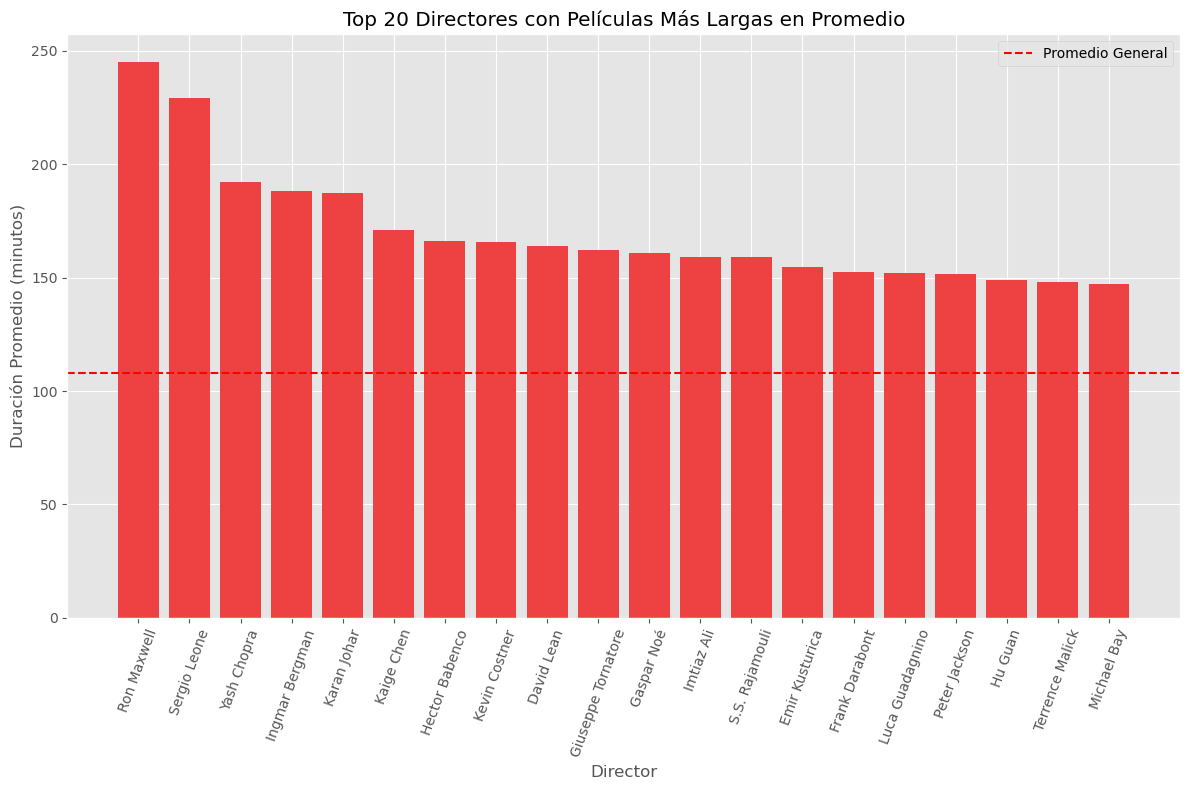

In [74]:
# Directores con peliculas mas largas

# Agrupar los datos por director y calcula el promedio de la duración de las películas (runtime)
director_runtime_promedio = df.groupby('director')['runtime'].mean().reset_index()

# Ordenar los directores por la duración promedio y seleccionar los 20 primeros
top_20_directores_runtime = director_runtime_promedio.nlargest(20, 'runtime')
# Promedio general:
promedio_runtime_general = df['runtime'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_directores_runtime['director'], top_20_directores_runtime['runtime'], color='#ee4242')
plt.axhline(y=promedio_runtime_general, color='red', linestyle='--', label='Promedio General')
plt.xlabel('Director')
plt.ylabel('Duración Promedio (minutos)')
plt.title('Top 20 Directores con Películas Más Largas en Promedio')
plt.xticks(rotation=70)
plt.tight_layout()

plt.legend()
plt.show()


In [75]:
df['runtime'].mean()

108.15273934698395

Los gráficos sobre  la duración promedio de las películas dirigidas por diferentes directores revelan un espectro interesante de enfoques artísticos y narrativos. Al considerar que el promedio general de duración de todas las películas es de 108 minutos, observamos que directores como Ron Maxwell, Sergio Leone y Yash Chopra presentan películas significativamente más largas. Esto sugiere una preferencia por narrativas extensas y complejas que permiten una exploración profunda de los temas y personajes.

Curiosamente, la presencia de directores como Peter Jackson y Michael Bay en esta lista, quienes también se destacan en otros indicadores financieros y de reconocimiento, muestra que su elección por películas de mayor duración no es un obstáculo para el éxito comercial y la apreciación del público. Estos hallazgos señalan cómo la duración de una película puede ser una elección artística que refleja la visión del director y puede resonar con audiencias amplias sin comprometer la calidad.

La variabilidad en la duración también resalta la diversidad de enfoques y géneros dentro de la industria cinematográfica, donde algunos directores optan por la concisión mientras que otros abrazan la amplitud para lograr impacto y profundidad en sus historias.

### 8. Análisis de Categorías 5: Star Actor

En la última sección, exploraremos la categoría de "Star actor" a través de un análisis detallado que incluirá indicadores financieros, valoraciones, votos y duración de las películas en las que los actores principales han participado.

#### 8.1 Actores más rentables, en términos acumulados y promedio

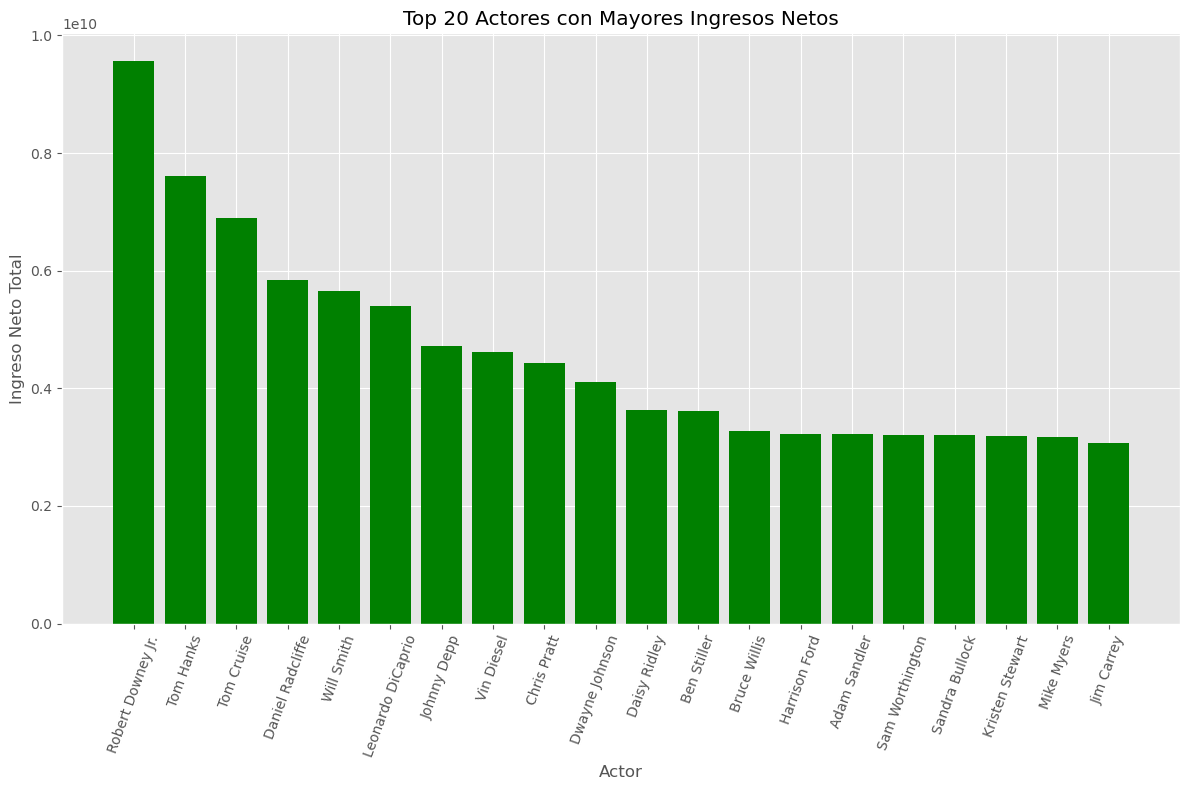

In [76]:
# top principal de actores con mayores ingresos neto Acumulados



# Agrupar los datos por actor y calcula la suma de ingreso neto
actores_ingreso_neto = df.groupby('star')['ingreso_neto'].sum().reset_index()

# Ordenar los actores por el ingreso neto total y seleccionar los 20 primeros
top_20_actores_ingreso = actores_ingreso_neto.nlargest(20, 'ingreso_neto')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_actores_ingreso['star'], top_20_actores_ingreso['ingreso_neto'], color='green')
plt.xlabel('Actor')
plt.ylabel('Ingreso Neto Total')
plt.title('Top 20 Actores con Mayores Ingresos Netos')
plt.xticks(rotation=70)
plt.tight_layout()

plt.show()


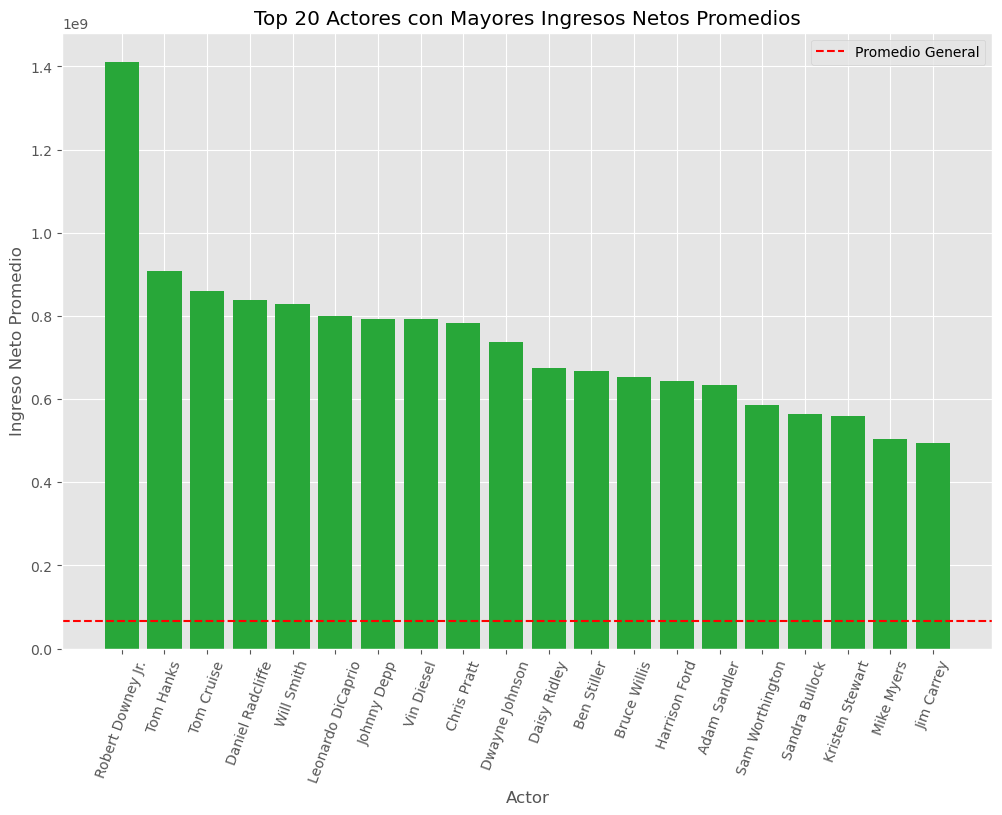

In [77]:
# top principal de actores con mayores ingresos neto Promedio


actores_ingreso_neto_prom = df.groupby('star')['ingreso_neto'].mean().reset_index()

# Ordenar los actores por el ingreso neto total y seleccionar los 20 primeros
top_20_actores_ingreso_prom = actores_ingreso_neto_prom.nlargest(20, 'ingreso_neto')

# promedio general
neto_prom = df['ingreso_neto'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_20_actores_ingreso['star'], top_20_actores_ingreso_prom['ingreso_neto'], color='#28a739')
plt.axhline(y=neto_prom, color='red', linestyle='--', label='Promedio General')
plt.xlabel('Actor')
plt.ylabel('Ingreso Neto Promedio')
plt.title('Top 20 Actores con Mayores Ingresos Netos Promedios')
plt.xticks(rotation=70)
plt.legend()

plt.show()



En esta sección, analizamos a los actores más rentables tanto en términos acumulados como promedio. Destaca la presencia de figuras icónicas como Robert Downey Jr., Tom Hanks y Tom Cruise en las primeras posiciones en ingresos netos acumulados. Sin embargo, al observar el promedio de ingresos, aparecen nombres más recientes como Daisy Ridley, Rami Malek y Tom Holland. Esto sugiere que, si bien algunas estrellas tienen un impacto económico considerable en sus películas, también hay actores emergentes que logran altos ingresos en menos películas.

#### 8.2 Mapa de palabras de actores principales, según el Ingreso Neto

En un esfuerzo por visualizar de manera dinámica y creativa los nombres de los actores más rentables en la industria cinematográfica, se utilizó una "nube de palabras". La siguiente representación gráfica toma los nombres de los actores como base y los dimensiona según sus ingresos netos acumulados. Los resultados son fascinantes, ya que entre más grande sea la letra de los nombres, significa que su contribución a la industría en términos financieros también lo ha sido. 

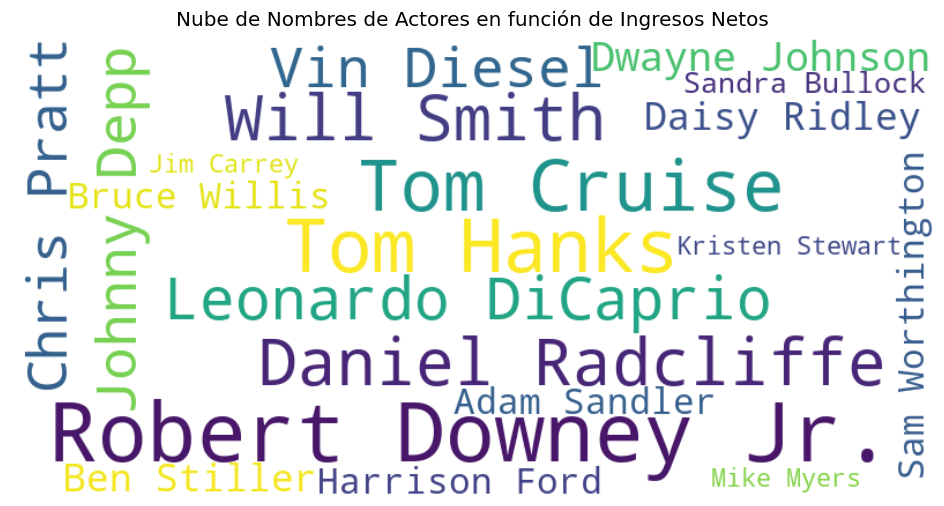

In [78]:
from wordcloud import WordCloud

# Crear un diccionario con nombres de actores y sus ingresos netos
actor_ingresos_dict = dict(zip(top_20_actores_ingreso['star'], top_20_actores_ingreso['ingreso_neto']))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(actor_ingresos_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Nombres de Actores en función de Ingresos Netos')
plt.show()


#### 8.3 Actores con más apariciones en películas 

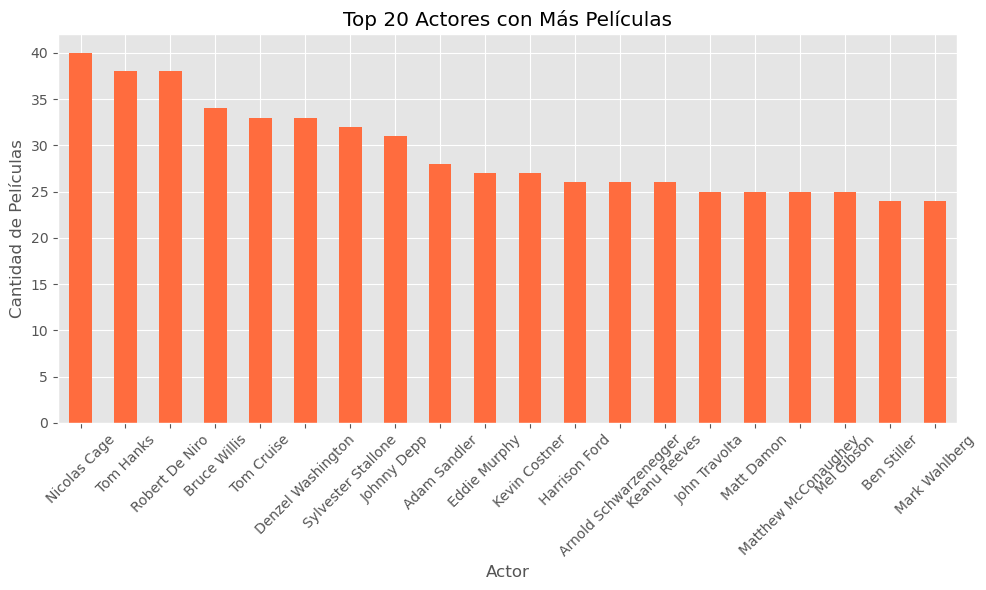

In [79]:
# Actores con mayor participacion en peliculas

actor_counts = df['star'].value_counts()
top_actors = actor_counts.head(20)

plt.figure(figsize=(10, 6))
top_actors.plot(kind='bar', color="#ff6c3e")
plt.title('Top 20 Actores con Más Películas')
plt.xlabel('Actor')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Actores como Nicolas Cage, Tom Hanks y Robert De Niro destacan con un alto número de participaciones en películas, lo que subraya su versatilidad y demanda en la industria. Estos actores no solo han demostrado ser rentables, como vimos en el punto anterior, sino que también han participado en numerosas producciones. Esta combinación sugiere una correlación entre la frecuencia de apariciones y el éxito financiero, lo que podría indicar una fórmula efectiva para mantener la atención del público y asegurar una presencia constante en la gran pantalla.

#### 8.4 Actores con mayor número de votos, en términos acumulados y promedio

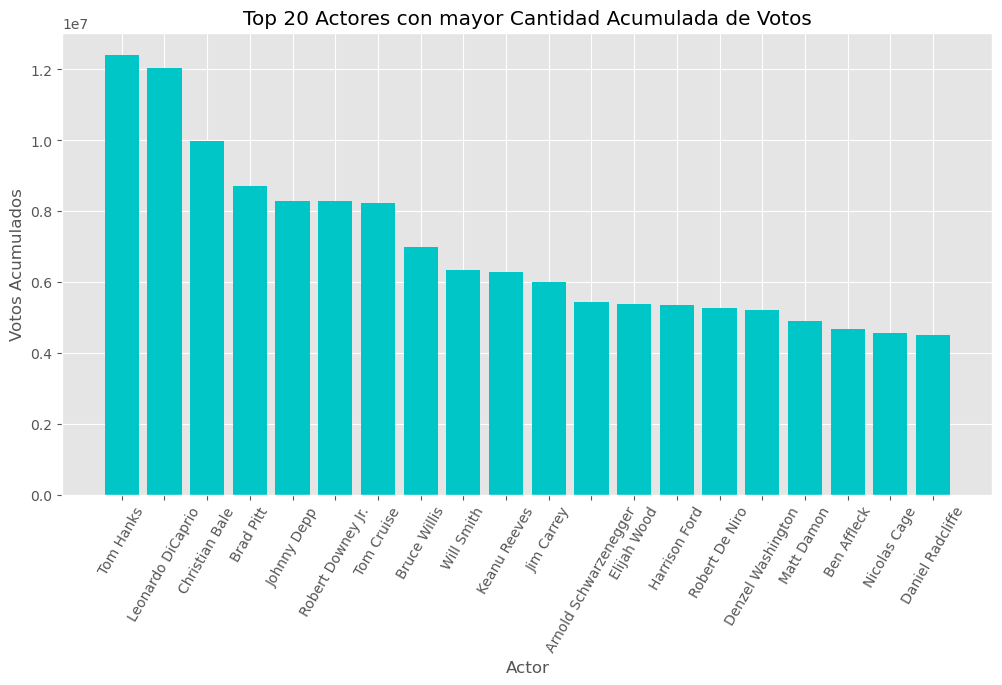

In [80]:
#top principales actores con mayor cantidad de votos acumulados recibidos

# Agrupa los datos por actor y suma la cantidad total de votos
actores_votos_acumulados = df.groupby('star')['votes'].sum().reset_index()

# Ordena los actores por la cantidad acumulada de votos y selecciona los 20 primeros
top_20_actores_votos_acumulados = actores_votos_acumulados.sort_values('votes', ascending=False).head(20)

# Crea el gráfico de barras acumuladas
plt.figure(figsize=(12, 6))
plt.bar(top_20_actores_votos_acumulados['star'], top_20_actores_votos_acumulados['votes'], color='#00c6c7')

plt.xlabel('Actor')
plt.ylabel('Votos Acumulados')
plt.title('Top 20 Actores con mayor Cantidad Acumulada de Votos')
plt.xticks(rotation=90)

plt.xticks(rotation=60)
plt.show()



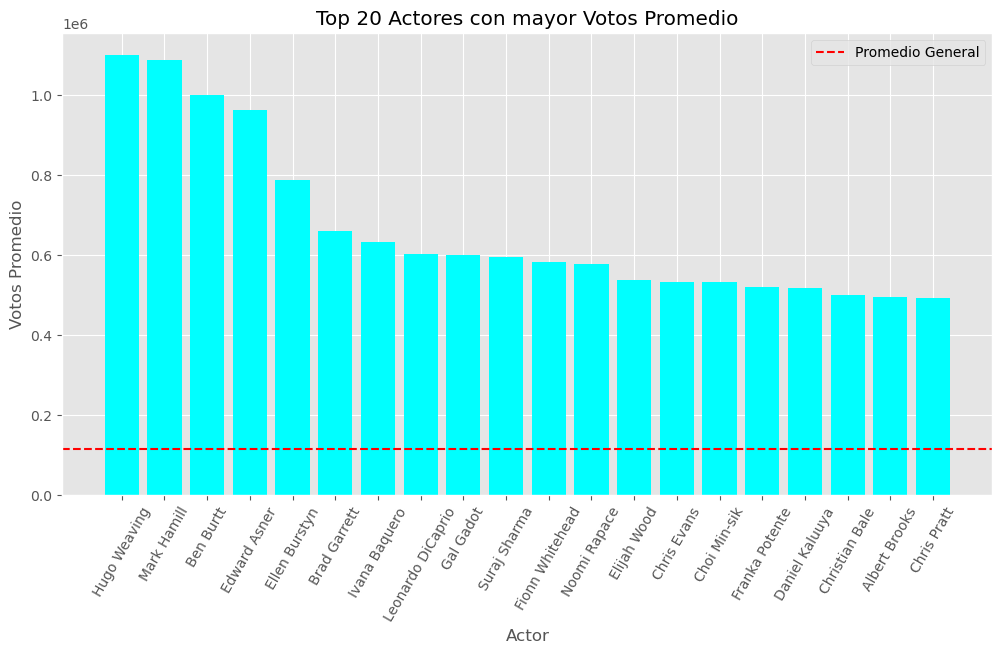

In [81]:
#top principal de actores con mayor cantidad Promeido de votos

# Agrupa los datos por actor y calcula el promedio de votos
actores_votos_promedio = df.groupby('star')['votes'].mean().reset_index()

# Ordena los actores por el promedio de votos y selecciona los 20 primeros
top_20_actores_votos_promedio = actores_votos_promedio.sort_values('votes', ascending=False).head(20)

#promedio general de votos
promedio_votes_actores = df['votes'].mean()

# Crea el gráfico de barras de votos promedio
plt.figure(figsize=(12, 6))
plt.bar(top_20_actores_votos_promedio['star'], top_20_actores_votos_promedio['votes'], color='#00FFFF')
plt.axhline(y=promedio_votes_actores, color='red', linestyle='--', label='Promedio General')
plt.xlabel('Actor')
plt.ylabel('Votos Promedio')
plt.title('Top 20 Actores con mayor Votos Promedio')
plt.xticks(rotation=90)
plt.legend()
plt.xticks(rotation=60)
plt.show()


Al explorar los actores con mayor número de votos en películas, se observa una correlación interesante con el éxito financiero y la presencia en la industria. Actores como Tom Hanks y Leonardo DiCaprio, que tienen un historial sólido de apariciones en películas exitosas, también lideran la tabla en términos de cantidad total de votos acumulados. Esto sugiere que su atractivo para los espectadores no solo se refleja en su rentabilidad financiera, sino también en la cantidad de veces que los espectadores han votado por sus actuaciones.

Por otro lado, al observar los promedios de votos, vemos que actores como Mark Hamill y Leonardo DiCaprio mantienen altos niveles de aprobación por parte del público en sus actuaciones, lo que refuerza aún más la relación entre la calidad de las actuaciones y la respuesta positiva del público. Con el promedio general de votos de aproximadamente 115,066 votos, estos actores destacados superan significativamente este valor.

#### 8.5 Actores con mejores valoraciones promedio (Score) 

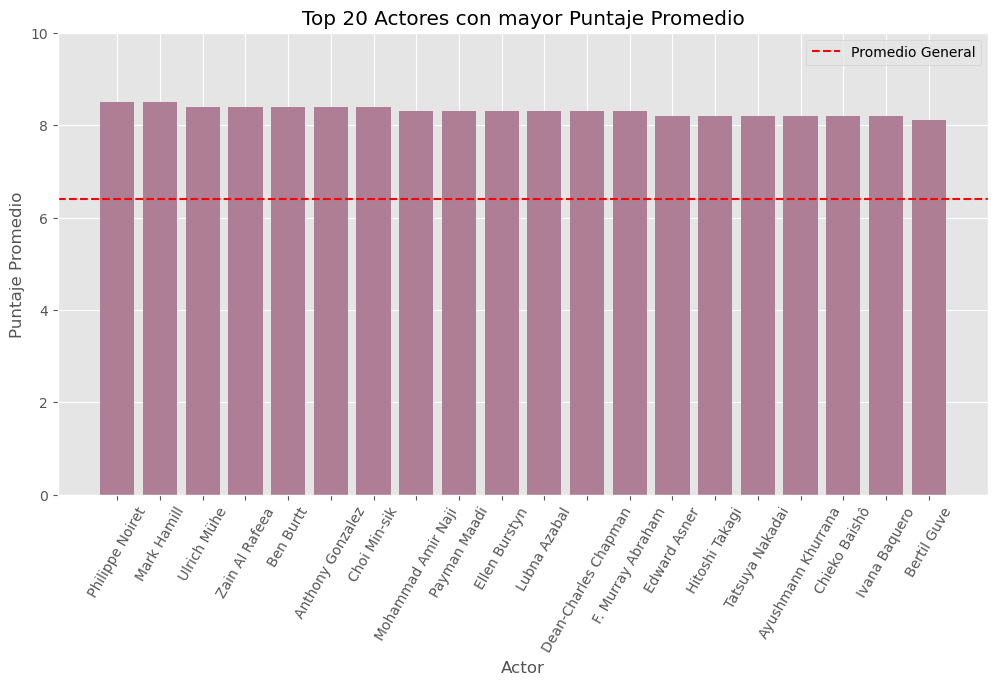

In [82]:
# top actores mejor valorados

# Agrupa los datos por actor y calcula el promedio del score
actores_score_promedio = df.groupby('star')['score'].mean().reset_index()

# Ordena los actores por su score promedio y selecciona los 20 primeros
top_20_actores_score = actores_score_promedio.sort_values('score', ascending=False).head(20)

# Promedio score
promedio_score_actores = df['score'].mean()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20_actores_score['star'], top_20_actores_score['score'], color='#ad7e94')
plt.axhline(y=promedio_score_actores, color='red', linestyle='--', label='Promedio General')

plt.xlabel('Actor')
plt.ylabel('Puntaje Promedio')
plt.title('Top 20 Actores con mayor Puntaje Promedio')
plt.xticks(rotation=90)
plt.ylim(0, 10)

plt.legend()
plt.xticks(rotation=60)
plt.show()


Al examinar las valoraciones promedio de los actores  (Score), surge un contraste interesante al comparar este análisis con el número de películas en las que participan.  Por un lado, algunos actores con una cantidad limitada de películas, como Mark Hamill y Philippe Noiret, logran mantener altos puntajes promedio, lo que sugiere que su calidad interpretativa y su elección de papeles han generado un impacto muy positivo en las audiencias. Esto podría indicar que estos actores han sido selectivos en sus proyectos y han optado por roles que les permitan brillar de manera consistente.

Por otro lado, otros actores que pueden tener más películas en su repertorio pueden enfrentar un desafío mayor para mantener puntajes promedio igualmente altos. La participación en un mayor número de películas podría dar lugar a una variabilidad en la calidad y recepción de sus trabajos, lo que a su vez podría influir en los puntajes promedio. Esta comparación entre actores con diferentes niveles de participación cinematográfica resalta la importancia de la consistencia en la calidad de las películas y cómo esto puede afectar la percepción del público.



#### 8.6 Actores en producciones más largas, en términos promedio 

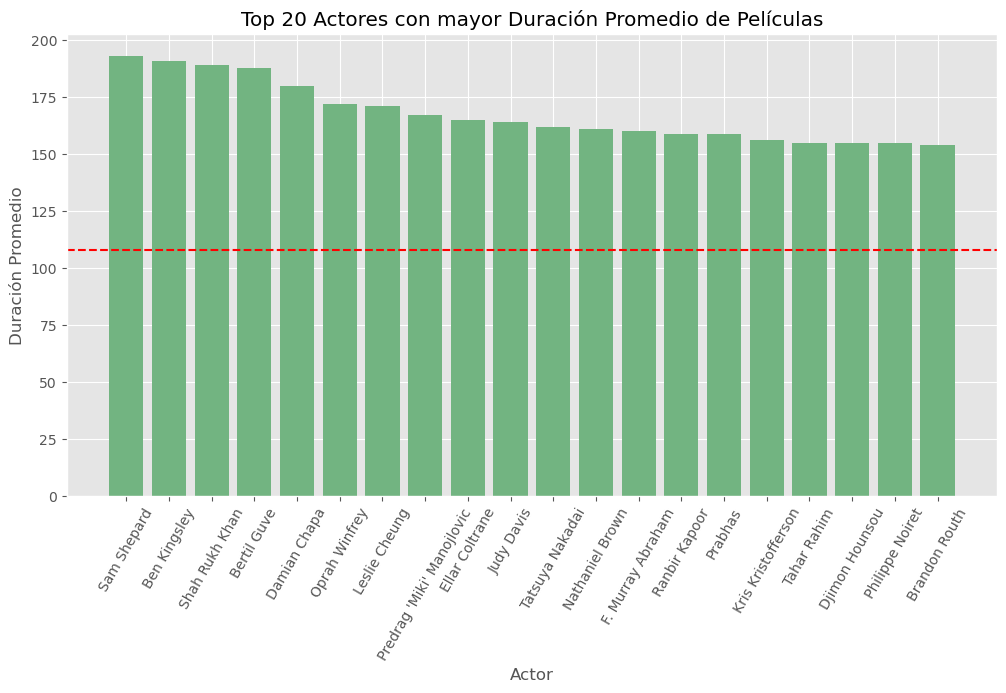

In [83]:
#principales actores con producciones mas largas

# Agrupa los datos por actor y calcula el promedio de la duración de las películas
actores_duracion_promedio = df.groupby('star')['runtime'].mean().reset_index()

# Ordena los actores por el promedio de duración y selecciona los 20 primeros
top_20_actores_duracion_promedio = actores_duracion_promedio.sort_values('runtime', ascending=False).head(20)
#promedio general
promedio_runtime_general = df['runtime'].mean()

# Crea el gráfico de barras de duración promedio
plt.figure(figsize=(12, 6))
plt.bar(top_20_actores_duracion_promedio['star'], top_20_actores_duracion_promedio['runtime'], color='#72b481')
plt.axhline(y=promedio_runtime_general, color='red', linestyle='--', label='Promedio General')
plt.xlabel('Actor')
plt.ylabel('Duración Promedio')
plt.title('Top 20 Actores con mayor Duración Promedio de Películas')
plt.xticks(rotation=90)

plt.xticks(rotation=60)
plt.show()


Se puede decir que algunos actores, como Sam Shepard y Ben Kingsley, han participado en producciones más largas en términos promedio. Esto podría sugerir que estos intérpretes a menudo se involucran en proyectos que requieren una narrativa más detallada y profunda. La dedicación a proyectos más largos podría permitirles desarrollar sus personajes de manera más completa.

Por otro lado, actores con una duración promedio más corta podrían estar involucrados en películas más orientadas a la acción o géneros que no requieren una duración extendida. Esto resalta la diversidad de roles que los actores pueden asumir y cómo esto puede afectar diferentes aspectos de su carrera.


#  Conclusiones Generales
Iluminando la Pantalla: Un Análisis de la Industria Cinematográfica

En este viaje de descubrimiento a través del mundo del cine y los datos, hemos desentrañado patrones y relaciones que dan forma a la fascinante industria cinematográfica. Partiendo de los géneros que llenan nuestras pantallas, hemos descubierto que los límites entre acción y aventura, comedia y drama, no solo dan forma a las historias, sino que también influyen en el éxito financiero. Las elecciones de género son más que etiquetas; son un lenguaje que conecta con las audiencias y determina los ingresos que fluyen a las arcas de los estudios.

Adentrándonos en la dinámica de las compañías productoras, se revela un juego sutil entre los titanes financieros y los artesanos de la animación. Desde Universal Pictures y Warner Bros. hasta DreamWorks Animation y Pixar Animation Studios, las compañías modelan la narrativa financiera. Los éxitos de taquilla emergen de la intersección entre géneros específicos y eficiencia financiera. Sorprendentemente, encontramos que incluso las empresas centradas en la animación pueden impactar en las recaudaciones generales, subrayando el alcance de la animación en la industria.

Los directores, como maestros del arte cinematográfico, ocupan el centro de atención en el espectáculo. Desde el legendario Spielberg hasta los innovadores Russo y Cameron, su capacidad para tejer historias cautivadoras y financieramente exitosas es palpable. Sin embargo, el análisis también revela la habilidad de ciertos directores emergentes para alcanzar altos retornos de inversión, resaltando la conjunción de creatividad y rendimiento económico.


Los actores principales, aquellos que dan vida a los personajes que amamos y odiamos, también tienen su lugar en la narrativa de datos. Hemos descubierto que la presencia en pantalla de actores consolidados como Tom Hanks y Leonardo DiCaprio a menudo se traduce en un equilibrio entre el reconocimiento de la audiencia y el éxito financiero. Pero más allá de las luces brillantes, actores emergentes como Daisy Ridley y Rami Malek también han demostrado su capacidad para generar ingresos significativos en menos películas.

A medida que los datos y las conclusiones se entrelazan, surgen conexiones ocultas. Actores con papeles más extensos no solo amplifican la duración de las películas, sino que también pueden estar conectados a géneros que requieren mayor exploración. Además, la conjunción de una alta votación promedio con un éxito financiero resalta la correlación entre la calidad de las actuaciones y el impacto económico.

En última instancia, estas conclusiones nos revelan que el cine es un ecosistema interdependiente donde el arte, la creatividad y los números convergen en un ballet cautivador. Cada película es una sinfonía de decisiones que se reflejan en las taquillas y en el corazón del público. Detrás de cada obra maestra hay un tejido de estrategias financieras y decisiones artísticas, formando un tapiz que envuelve a la industria cinematográfica.

Así, al finalizar este análisis, no solo cerramos el telón, sino que abrimos la puerta a nuevas exploraciones. El cine sigue siendo un universo infinito de historias por contar, cifras por desentrañar y emociones por evocar. En esta encrucijada de análisis y arte, damos un paso atrás y apreciamos el alma del cine: una experiencia compartida que trasciende las fronteras y conecta a la humanidad en un diálogo sin fin de luces, cámaras y acción.
